In [1]:

import os
import json
import glob
import copy
import numpy as np
import pylab as pl
import seaborn as sns
import pandas as pd


from scipy import stats as spstats

from pipeline.python.classifications import experiment_classes as util
from pipeline.python.utils import natural_keys, label_figure

/home/julianarhee/Repositories/2p-pipeline/pipeline/python/classifications/experiment_classes.py:18: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/home/julianarhee/anaconda2/envs/pipeline/lib/python2.7/runpy.py", line 174, in _run_module_as_main
    "__main__", fname, loader, pkg_name)
  File "/home/julianarhee/anaconda2/envs/pipeline/lib/python2.7/runpy.py", line 72, in _run_code
    exec code in run_globals
  File "/home/julianarhee/anaconda2/envs/pipeline/lib/python2.7/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/home/julianarhee/anaconda2/envs/pipeline/lib/python2.7/site-packages/traitlets/config/application.py", line 658, in launch_instance
   

In [2]:
%matplotlib notebook

# Test blobs

In [3]:
rootdir = '/n/coxfs01/2p-data'
animalid = 'JC084' #'JC059'
session = '20190522' #'20190227'
fov = 'FOV1_zoom2p0x' #'FOV4_zoom4p0x'
traceid = 'traces001' #'traces001'
response_type = 'dff'


# Set responsivity params

In [4]:
responsive_test = 'nstds'
responsive_thr = 10.
n_stds = 2.5


# Get all blob data

In [5]:
from pipeline.python.classifications import get_dataset_stats as gd
import cPickle as pkl

options = ['-t', 'traces001']
optsE = gd.extract_options(options)

rootdir = optsE.rootdir
aggregate_dir = optsE.aggregate_dir
fov_type = optsE.fov_type
traceid = optsE.traceid
response_type = 'dff'
print aggregate_dir

/n/coxfs01/julianarhee/aggregate-visual-areas


/home/julianarhee/Repositories/2p-pipeline/pipeline/python/classifications/get_dataset_stats.py:17: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to u'nbAgg' by the following code:
  File "/home/julianarhee/anaconda2/envs/pipeline/lib/python2.7/runpy.py", line 174, in _run_module_as_main
    "__main__", fname, loader, pkg_name)
  File "/home/julianarhee/anaconda2/envs/pipeline/lib/python2.7/runpy.py", line 72, in _run_code
    exec code in run_globals
  File "/home/julianarhee/anaconda2/envs/pipeline/lib/python2.7/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/home/julianarhee/anaconda2/envs/pipeline/lib/python2.7/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/home/juliana

In [6]:
sdata_fpath = os.path.join(aggregate_dir, 'dataset_info.pkl')
if os.path.exists(sdata_fpath):
    with open(sdata_fpath, 'rb') as f:
        sdata = pkl.load(f)
else:
    sdata = gd.aggregate_session_info(traceid=optsE.traceid, trace_type=optsE.trace_type, 
                                       state=optsE.state, fov_type=optsE.fov_type, 
                                       visual_areas=optsE.visual_areas,
                                       blacklist=optsE.blacklist, 
                                       rootdir=optsE.rootdir)
    with open(sdata_fpath, 'wb') as f:
        pkl.dump(sdata, f, protocol=pkl.HIGHEST_PROTOCOL)

In [7]:
dsets = sdata[sdata['experiment']=='blobs']

In [8]:
stats_desc = util.get_stats_desc(traceid=optsE.traceid,
                                      trace_type= optsE.trace_type,
                                      response_type = response_type,
                                      responsive_test = responsive_test,
                                      responsive_thr = responsive_thr,
                                      n_stds = n_stds)
print(stats_desc)

stats-traces001-corrected-dff-nstds-thr-10.00


# Create output dir for aggregated data

In [9]:
outdir = os.path.join(aggregate_dir, 'blob-tuning', stats_desc)
if not os.path.exists(outdir):
    os.makedirs(outdir)
print(outdir)

/n/coxfs01/julianarhee/aggregate-visual-areas/blob-tuning/stats-traces001-corrected-dff-nstds-thr-10.00


In [10]:
dsets.head()

animalid experiment            fov   session visual_area  exp_no  animal_no
2     JC084      blobs  FOV1_zoom2p0x  20190522          V1       0          4
6     JC084      blobs  FOV1_zoom2p0x  20190525          Lm       0          4
10    JC091      blobs  FOV1_zoom2p0x  20190627          Lm       0          7
14    JC091      blobs  FOV1_zoom2p0x  20190607          Li       0          7
18    JC091      blobs  FOV1_zoom2p0x  20190614          Li       0          7

# Create output dir for all session data

In [11]:
if not os.path.exists(os.path.join(outdir, 'sessions')):
    os.makedirs(os.path.join(outdir, 'sessions'))

# Out of the responsive cells, which are responsive to which condition?

In [12]:
from matplotlib.ticker import FormatStrFormatter


In [13]:
def reformat_morph_values(sdf):
    control_ixs = sdf[sdf['morphlevel']==-1].index.tolist()
    sizevals = np.array([round(s, 1) for s in sdf['size'].unique() if s not in ['None', None] and not np.isnan(s)] )
    sdf.loc[sdf.morphlevel==-1, 'size'] = pd.Series(sizevals, index=control_ixs)
    sdf['size'] = [round(s, 1) for s in sdf['size'].values]

    return sdf


In [366]:
reload(util)

/home/julianarhee/Repositories/2p-pipeline/pipeline/python/classifications/experiment_classes.py:18: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to u'nbAgg' by the following code:
  File "/home/julianarhee/anaconda2/envs/pipeline/lib/python2.7/runpy.py", line 174, in _run_module_as_main
    "__main__", fname, loader, pkg_name)
  File "/home/julianarhee/anaconda2/envs/pipeline/lib/python2.7/runpy.py", line 72, in _run_code
    exec code in run_globals
  File "/home/julianarhee/anaconda2/envs/pipeline/lib/python2.7/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/home/julianarhee/anaconda2/envs/pipeline/lib/python2.7/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/home/julian

<module 'pipeline.python.classifications.experiment_classes' from '/home/julianarhee/Repositories/2p-pipeline/pipeline/python/classifications/experiment_classes.py'>

## 1. Look at "tuning curves"

In [14]:
# Set plotting params
threshold_dff = True
min_dff = 0.03
cmap = 'inferno'
n_sz = 5
n_mp = 10

tune_name='morph'

incorrect_nvalues = []


In [15]:
#del exp

#### Plot tuning curve for each ROI

In [16]:
def plot_roi_tuning(df_mean, df_sem=None, tune_values=None, tune_name='', hue_values=None, hue_name='', hue_colors=None):

    rois_plot = df_mean.index.tolist()
    nrois_plot = len(rois_plot)
    print("N rois to plot: %i" % nrois_plot)
    nrows = int(round(np.sqrt(nrois_plot)))
    ncols = int(np.ceil(nrois_plot/float(nrows)))

    print(nrows, ncols)
    nsubplots = nrows*ncols

    vmin = df_mean.min().min()
    vmax = df_mean.max().max()

    fig, axes = pl.subplots(nrows, ncols, sharex=True, sharey=False, figsize=(20,15))
    fig.patch.set_alpha(1)
    for hv, hcolor in zip(hue_values, hue_colors):
        currcfgs = sdf[sdf[hue_name]==hv].index.tolist() #cols = [c for c in meanr.columns if 'S%i' % sz in c]
        for ax, roi in zip(axes.flat, rois_plot):
            mean_vals = df_mean[currcfgs].loc[roi].values.astype(float)
            ax.plot(np.arange(0, len(tune_values)), mean_vals, color=hcolor) #[roi])
            
            if df_sem is not None:
                sem_vals = df_sem[currcfgs].loc[roi].values.astype(float)
                y1 = mean_vals + sem_vals
                y2 = mean_vals - sem_vals
                ax.fill_between(np.arange(0, len(tune_values)), y1, y2=y2, alpha=0.2, color='k')
                
            ax.set_xticklabels(tune_values)
            ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
            ax.set_title(roi)

    label_figure(fig, data_id)
    for ax in axes.flat[nrois_plot:]:
        ax.axis('off')
    pl.subplots_adjust(wspace=0.8, hspace=0.8)

    return fig

# Look at 1 dataset to test

In [17]:
data_id = '|'.join([animalid, session, fov, traceid, stats_desc])

exp = util.Objects(animalid, session, fov, traceid=traceid, rootdir=rootdir)
# Get stimulus conditions
sdf = exp.get_stimuli()
sdf = reformat_morph_values(sdf)
sizes = np.array(sorted(sdf['size'].unique()))
morphs = np.array(sorted(sdf['morphlevel'].unique()))

n_sizes = len(sdf['size'].unique())
n_morphs = len(sdf['morphlevel'].unique()) 
if n_sizes != n_sz or n_morphs != n_mp:
    incorrect_nvalues.append(skey)
    pass

rstats, rlist, _ = util.get_roi_stats(animalid, session, fov, exp_name=exp.name,
                             response_type=response_type, responsive_test=responsive_test,
                             responsive_thr=responsive_thr, n_stds=n_stds)
rstats = rstats['nframes_above']

# Get metrics for each condition
estats = exp.get_stats(responsive_test=responsive_test, responsive_thr=responsive_thr, n_stds=n_stds)
meanr = pd.concat([pd.Series(estats.gdf.get_group(roi).groupby(['config']).mean()['dff'], name=roi) \
                   for roi in estats.rois], axis=1).T

... [JC084|20190522|FOV1_zoom2p0x] creating blobs object
... getting data paths - name: blobs
... renaming experiment to run name: combined_blobs_static
Getting stimulus info for: combined_blobs_static
... loading ROI stats: nstds
... [combined_blobs_static] Loading roi stats and cell list...
... loading data array


/home/julianarhee/Repositories/2p-pipeline/pipeline/python/classifications/experiment_classes.py:999: RuntimeWarning: invalid value encountered in divide
  F0 = np.nanmean(dset['corrected'][:] / dset['dff'][:] )


... offset: 608.72
... updating self
filtering responsive cells: nstds
... getting responsive cells (test: nstds, thr: 10.00')


In [18]:


# Get ROI list
if threshold_dff:
    rois_plot = meanr[(meanr.max(axis=1) > min_dff)].index.tolist()
else:
    rois_plot = meanr.index.tolist()
print("Plotting %i of %i responsive cells." % (len(rois_plot), len(meanr.index.tolist())))

# df_mean = meanr.loc[rois_plot]
# meanr.head()

Plotting 128 of 180 responsive cells.


# Get M x N matrix:
N = num cells * num trials for 1 conditions
M = num configs

In [19]:
result = pd.concat(estats.gdf.get_group(roi)[[response_type, 'config', 'trial']] for roi in rois_plot)
result.shape
result['cell'] = result.index.tolist()
result = result.reset_index(drop=True)


In [20]:
config_list = sorted(result['config'].unique())

In [21]:
ntrials = list(set([len(g['trial'].unique()) for k, g in result.groupby(['config'])]))
assert len(ntrials) == 1
ntrials = ntrials[0]
print ntrials

30


In [22]:
df_list = [pd.DataFrame(np.vstack(estats.gdf.get_group(roi).groupby(['config'])['dff'].apply(np.array)).T, 
                    index=[roi for _ in range(ntrials)], columns=[config_list]) for roi in rois_plot]

In [23]:
data = pd.concat(df_list)

In [24]:
data.shape

(3840, 50)

In [25]:
data.head()

config001  config002  config003  config004  config005  config006  \
5   0.000844   0.007050  -0.003037   0.003641  -0.022208  -0.022374   
5   0.009728  -0.010104  -0.003322  -0.005749  -0.016870   0.033010   
5   0.005373  -0.035805  -0.021871  -0.012041  -0.029079  -0.008136   
5  -0.006800   0.011246  -0.001341  -0.002636  -0.009697   0.019555   
5  -0.023819  -0.009737  -0.011156   0.012142  -0.018359  -0.009634   

   config007  config008  config009  config010    ...      config041  \
5  -0.026211  -0.026956   0.002149   0.002726    ...       0.065383   
5   0.034031  -0.017172   0.001814  -0.041974    ...       0.029128   
5   0.009520  -0.013139  -0.020856  -0.025824    ...       0.024842   
5   0.013699   0.007747  -0.000928  -0.010668    ...       0.027150   
5  -0.006468  -0.004576  -0.037628  -0.003129    ...       0.012619   

   config042  config043  config044  config045  config046  config047  \
5   0.014464   0.014628  -0.011356   0.020172  -0.004946  -0.011912   
5   0.015922  -0.015507   0.019657  -0.002579   0.071287  -0.002582   
5   0.041579  -0.001895   0.022723   0.007298   0.017096  -0.021604   
5   0.000624   0.008697  -0.011185  -0.009294   0.012078  -0.015374   
5   0.004372   0.014143  -0.004149   0.005042   0.003573  -0.012106   

   config048  config049  config050  
5  -0.000931   0.012209   0.002778  
5  -0.009952   0.077543  -0.006916  
5  -0.003137   0.014282   0.044370  
5   0.031874   0.017034   0.024984  
5   0.016332   0.023583  -0.001836  

[5 rows x 50 columns]

In [26]:
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from sklearn.preprocessing import StandardScaler
#from time import time
import time
import copy

In [27]:
control_cfgs = sdf[sdf['color']!=''].index.tolist()
control_cfgs
image_cfgs = [c for c in sdf.index.tolist() if c not in control_cfgs]

In [28]:
ncells = len(rois_plot)

In [29]:
# curr_roi_list = [17, 54, 39, 43, 56, 59, 61, 67, 69, 80, 91, 93, 82, 99, 100, 106, 118, 119, 121, 123, 125, 129, 
#                 137, 141, 150, 145, 155, 165, 175, 177, 183, 190, 191, 193, 196, 199, 207, 212, 234, 239]

curr_roi_list = copy.copy(rois_plot)

In [30]:
ixs = [i for i in data.index.tolist() if i in curr_roi_list]


In [85]:
param = 'morphlevel'
features_are_cells = False
images_only = False

if images_only:
    X = data[image_cfgs]
else:
    X = data.loc[ixs]
    #X = df.copy()
    
if features_are_cells:
    X = X.T
    labels = [sdf[param][c] for c in X.index.tolist()] # label by config, reduce cell-space
else:
    labels = X.index.tolist() # label cell, reduce config-space

label_types = sorted(np.unique(labels))


In [86]:
X_s = StandardScaler().fit_transform(X)

df = pd.DataFrame(X_s, index=X.index, columns=X.columns)

In [33]:
df.head()

config001  config002  config003  config004  config005  config006  \
5  -0.362719  -0.179482  -0.218540  -0.117649  -0.412157  -0.578049   
5  -0.265221  -0.398715  -0.222520  -0.245286  -0.321260   0.037715   
5  -0.313023  -0.727192  -0.481915  -0.330802  -0.529167  -0.419752   
5  -0.446610  -0.125859  -0.194825  -0.202962  -0.199106  -0.111873   
5  -0.633389  -0.394035  -0.332079  -0.002100  -0.346610  -0.436408   

   config007  config008  config009  config010    ...      config041  \
5  -0.810153  -0.681787  -0.371545  -0.308376    ...       0.312965   
5  -0.055303  -0.576437  -0.375660  -0.890379    ...      -0.076928   
5  -0.362427  -0.533016  -0.654553  -0.680104    ...      -0.123017   
5  -0.310062  -0.308117  -0.409399  -0.482769    ...      -0.098194   
5  -0.562762  -0.440808  -0.860890  -0.384615    ...      -0.254467   

   config042  config043  config044  config045  config046  config047  \
5  -0.092038  -0.021950  -0.227746   0.226323  -0.420442  -0.553725   
5  -0.067922  -0.447428   0.319797  -0.123473   0.413557  -0.427034   
5   0.356503  -0.255234   0.373930   0.028387  -0.179306  -0.685312   
5  -0.320976  -0.105685  -0.224723  -0.226715  -0.234204  -0.600730   
5  -0.258981  -0.028797  -0.100507  -0.006299  -0.327246  -0.556356   

   config048  config049  config050  
5  -0.251010   0.119863   0.093767  
5  -0.403530   1.349284  -0.057812  
5  -0.288308   0.158868   0.744082  
5   0.303665   0.210658   0.440976  
5   0.040883   0.333889   0.021623  

[5 rows x 50 columns]

# PCA / LDA

In [34]:
n_components = 50
lda = LinearDiscriminantAnalysis(n_components=n_components)
pca = PCA(n_components=n_components)
X_pca = pca.fit(X_s, labels).transform(X_s)
X_lda = lda.fit(X_s, labels).transform(X_s)
cvar_pca = np.cumsum(pca.explained_variance_ratio_)
cvar_lda = np.cumsum(lda.explained_variance_ratio_)


In [35]:
print len(cvar_lda)
print len(cvar_pca)

50
50


<IPython.core.display.Javascript object>


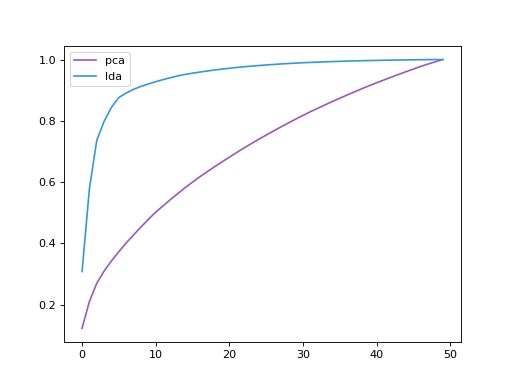

In [36]:
pl.figure()
pl.plot(cvar_pca, label='pca')
pl.plot( cvar_lda, label='lda')
pl.legend()

# DImensionality Reduction

In [40]:
n_components = 20
dimr_type = 'PCA'

if dimr_type == 'LDA':
    dimr = LinearDiscriminantAnalysis(n_components=n_components)
else:
    dimr = PCA(n_components=n_components)
    
X_r = dimr.fit(X_s, labels).transform(X_s)
# Percentage of variance explained for each components
print('Explained variation per principal component: {}'.format(dimr.explained_variance_ratio_))
print('Total explained variance {}: {}'.format( n_components, np.sum(dimr.explained_variance_ratio_)))


Explained variation per principal component: [ 0.12301333  0.08748148  0.05953508  0.03983077  0.03317328  0.03007015
  0.02837478  0.02629837  0.025498    0.02505465  0.02331108  0.02060132
  0.02036076  0.01966646  0.01891672  0.01822429  0.01706656  0.01620617
  0.01594756  0.01541165]
Total explained variance 20: 0.664042476564


In [41]:
print X_r.shape
print df.shape

(115200, 20)
(115200, 50)


In [42]:
# df['pca-1'] = pd.Series(X_r[:, 0], index=df.index.tolist())
# df['pca-2'] = pd.Series(X_r[:, 1], index=df.index.tolist())
#df['pca-1'] = X_r[:, 0]
#df['pca-2'] = X_r[:, 1]
for ni in range(n_components):
    df['pca-%i' % int(ni+1)] = X_r[:, ni]
    


In [43]:
df.head()

config001  config002  config003  config004  config005  config006  \
5  -0.362719  -0.179482  -0.218540  -0.117649  -0.412157  -0.578049   
5  -0.265221  -0.398715  -0.222520  -0.245286  -0.321260   0.037715   
5  -0.313023  -0.727192  -0.481915  -0.330802  -0.529167  -0.419752   
5  -0.446610  -0.125859  -0.194825  -0.202962  -0.199106  -0.111873   
5  -0.633389  -0.394035  -0.332079  -0.002100  -0.346610  -0.436408   

   config007  config008  config009  config010    ...       pca-11    pca-12  \
5  -0.810153  -0.681787  -0.371545  -0.308376    ...    -0.237945  0.218992   
5  -0.055303  -0.576437  -0.375660  -0.890379    ...     0.454709  0.922682   
5  -0.362427  -0.533016  -0.654553  -0.680104    ...    -0.353847  0.584650   
5  -0.310062  -0.308117  -0.409399  -0.482769    ...     0.441124  0.387782   
5  -0.562762  -0.440808  -0.860890  -0.384615    ...    -0.498723  0.293047   

     pca-13    pca-14    pca-15    pca-16    pca-17    pca-18    pca-19  \
5 -0.145072 -0.516194  0.030472  0.166590  0.245085  0.726686 -0.419945   
5 -0.104667 -0.201436  0.032144  0.029586  0.019569 -0.138213 -0.151883   
5 -0.325902  0.217035  0.071291  0.764120 -0.134864 -0.261410 -0.639333   
5 -0.316168 -0.125690  0.276934  0.246741 -0.004954  0.706635 -0.178646   
5  0.300559 -0.313850 -0.270975  0.218814 -0.450066 -0.303142 -0.197960   

     pca-20  
5  0.042407  
5 -0.235770  
5  0.405603  
5  0.016406  
5 -0.023348  

[5 rows x 70 columns]

In [45]:
import seaborn as sns
sns.__version__

'0.9.0'

In [46]:
orig_columns = data.columns.tolist()

In [47]:
df['cell'] = df.index.tolist()

<IPython.core.display.Javascript object>


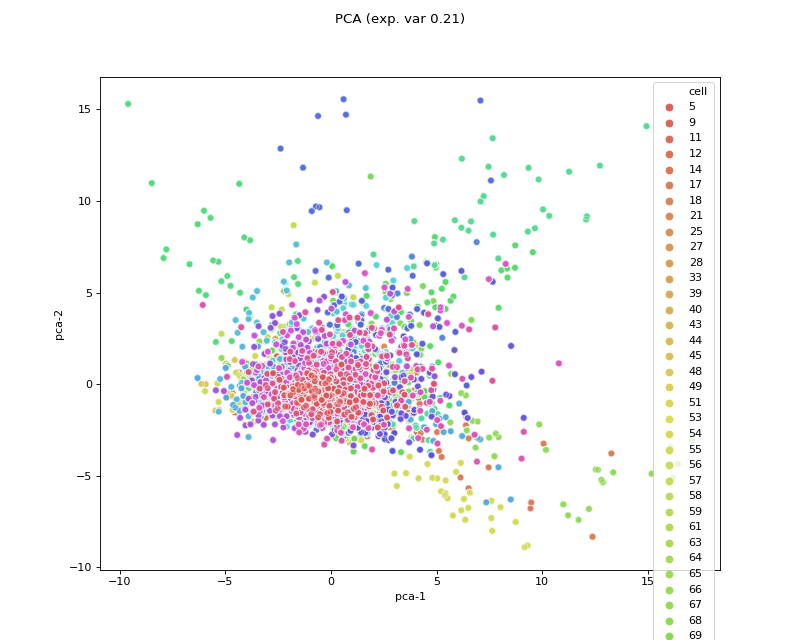

Text(0.5,0.98,u'PCA (exp. var 0.21)')

In [50]:
colors = sns.color_palette("hls", len(label_types))

fig, ax = pl.subplots(figsize=(10,8))
d1 = 1
d2 = 2
sns.scatterplot(
    x="pca-%i" % d1, y="pca-%i" % d2,
    hue="cell",
    palette=colors,
    data=df,
    legend="full",
    alpha=0.3,
    ax=ax, 
)

fig.suptitle('%s (exp. var %.2f)' % (dimr_type, np.sum(dimr.explained_variance_ratio_[0:2])))

<IPython.core.display.Javascript object>


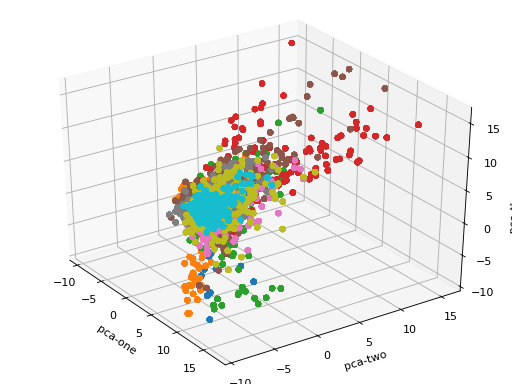

In [59]:
d3=2
#ax = pl.figure(figsize=(16,10)).gca(projection='3d')
fig = pl.figure()
import mpl_toolkits.mplot3d.axes3d as p3
ax = p3.Axes3D(fig)
ax.scatter(
    xs=df["pca-%i" % d1], 
    ys=df["pca-%i" % d2], 
    zs=df["pca-%i" % d3], 
    c=df["cell"], 
    cmap='tab10'
)
ax.set_xlabel('pca-one')
ax.set_ylabel('pca-two')
ax.set_zlabel('pca-three')
pl.show()

# Visualize first few eigenvectors

In [ ]:
dimr.components_.shape

In [ ]:
n_sz = 5
n_mp = 10
sdf['size'].reshape(n_sz, n_mp)

In [ ]:
fig, axes = plt.subplots(3, 8, figsize=(9, 4),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i, ax in enumerate(axes.flat):
    ax.imshow(pca.components_[i].reshape(62, 47), cmap='bone')


# Split up "samples" (i.e., cells) so that can visualize sparsely

<IPython.core.display.Javascript object>


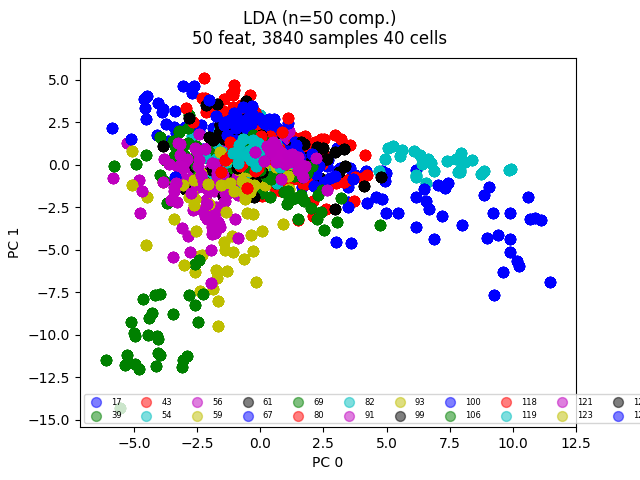

Text(0.5,0.98,u'LDA (n=50 comp.)\n50 feat, 3840 samples 40 cells')

In [614]:
fig, ax = pl.subplots() #.figure()
colors = sns.color_palette('cubehelix', n_colors=len(label_types))
lw = 1
#colors = itertools.cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')

d1 = 0 
d2 = 1
for color, label in zip(colors, label_types):
    ax.scatter(X_r[labels == label, d1], X_r[labels == label, d2], color=color, label=label,
               alpha=.5, lw=lw, s=50, marker='o')
ax.legend(loc='bottom', shadow=False, scatterpoints=1, ncol=len(label_types)/2, fontsize=6)

xlim = ax.get_xlim()
ylim = ax.get_ylim()

ax.set_xlabel('PC %i' % d1)
ax.set_ylabel('PC %i' % d2)
fig.suptitle('%s (n=%i comp.)\n%i feat, %i samples %i cells' % (dimr_type, n_components, n_features, n_samples, len(curr_roi_list)))


In [575]:
np.linspace(0, len(rois_plot), 8)

array([   0.        ,   18.28571429,   36.57142857,   54.85714286,
         73.14285714,   91.42857143,  109.71428571,  128.        ])

<IPython.core.display.Javascript object>


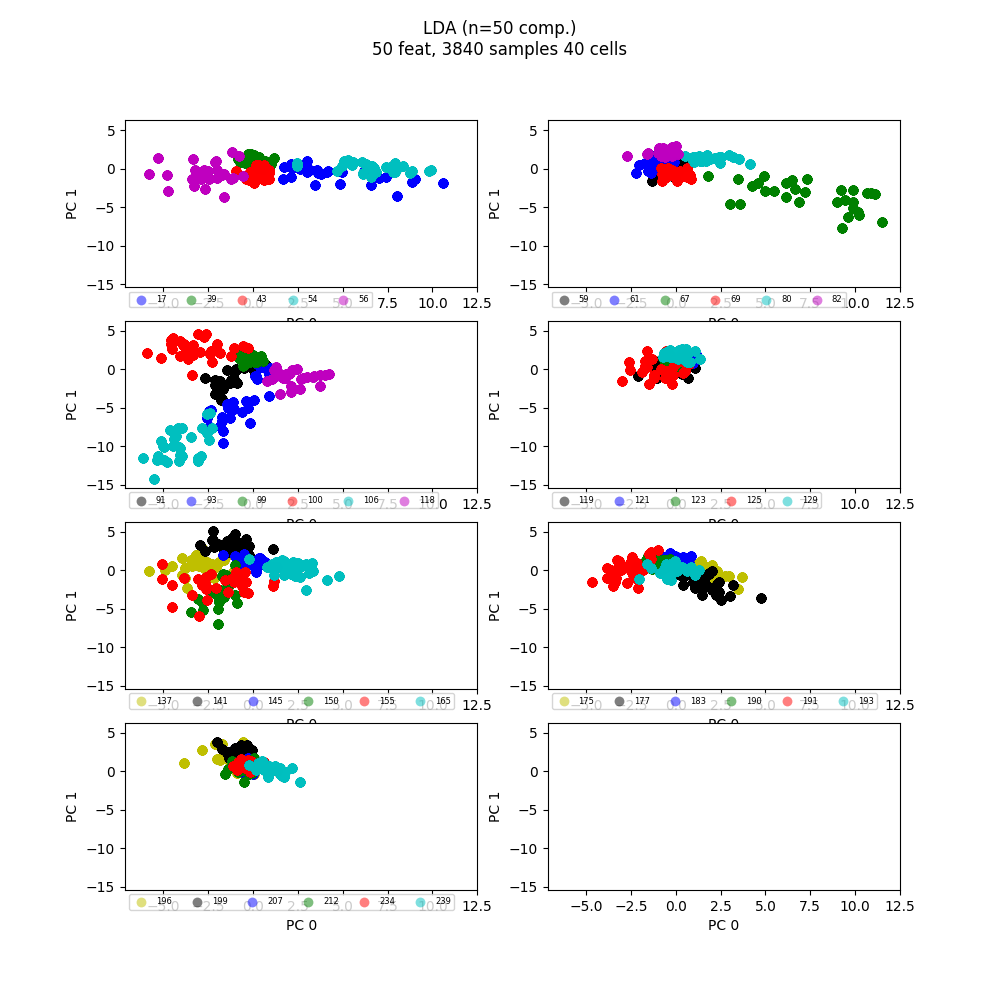

0 0.0
1 5.71428571429
2 11.4285714286
3 17.1428571429
4 22.8571428571
5 28.5714285714
6 34.2857142857
7 40.0


In [615]:
fig, axes = pl.subplots(4, 2, figsize=(10,10)) #.figure()
colors = sns.color_palette('cubehelix', n_colors=len(label_types))
lw = 0.5
colors = itertools.cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')

fig.suptitle('%s (n=%i comp.)\n%i feat, %i samples %i cells' % (dimr_type, n_components, n_features, n_samples, len(curr_roi_list)))

roi_start_ixs = np.linspace(0, len(label_types), 8)

for i, (ax, ri) in enumerate(zip(axes.flat, roi_start_ixs)):
    print i, ri
    s_ix = int(ri)
    if i == len(roi_start_ixs)-1:
        e_ix = -1
    else:
        e_ix = int(roi_start_ixs[i+1])
    for color, label in zip(colors, label_types[s_ix:e_ix]):
        ax.scatter(X_r[labels == label, 0], X_r[labels == label, 1], color=color, label=label,
                   alpha=.5, lw=0, s=50, marker='o')
        
    ax.legend(loc='upper left', shadow=False, scatterpoints=1, 
              ncol=len(label_types)/2, fontsize=6,  bbox_to_anchor= (0, 0))
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

    ax.set_xlabel('PC %i' % d1)
    ax.set_ylabel('PC %i' % d2)


# t-SNE

In [52]:

from matplotlib.ticker import NullFormatter
from sklearn import manifold, datasets
import time

In [61]:
mdf = meanr.loc[rois_plot]
mdf.shape


(128, 50)

In [72]:
Xm = StandardScaler().fit_transform(mdf)

dfm = pd.DataFrame(Xm, index=mdf.index, columns=mdf.columns)

In [73]:
dfm.head()

config  config001  config002  config003  config004  config005  config006  \
5       -0.431411  -0.071801   0.140662   0.245632   0.199499  -0.118033   
9        0.191242   0.340446   0.536931   0.485794   0.803152   0.340307   
11      -0.163182  -0.226383  -0.071030  -0.518061   0.123285  -0.340707   
12       0.068303   0.044746  -0.399758  -0.668536  -0.146581  -0.096390   
14      -0.780249  -0.523896  -0.580332  -0.669661  -0.452952  -0.807546   

config  config007  config008  config009  config010    ...      config041  \
5       -0.872907  -0.944681  -1.211917  -1.028969    ...      -0.054421   
9       -0.023188  -0.207747  -0.374260  -0.030608    ...       0.588250   
11      -0.381538  -0.607363  -0.852357  -1.261981    ...       0.413011   
12      -0.551956  -0.650337  -0.013157  -0.389247    ...      -0.162323   
14      -0.186815  -0.541912  -0.493854  -0.145518    ...      -0.871332   

config  config042  config043  config044  config045  config046  config047  \
5       -0.262492  -0.311043   0.084610  -0.054895  -0.072695  -0.334629   
9       -0.356334  -0.711780  -0.319917  -0.494508   0.364743  -0.247822   
11      -0.180588  -0.122273  -0.120554  -0.524921   0.100241   0.314008   
12      -0.918212  -1.659560  -1.179077  -0.904460  -0.030935  -0.940411   
14       0.528144   0.725635   1.342414   0.875649  -0.703920   0.673879   

config  config048  config049  config050  
5       -0.334166   0.377903   0.072676  
9       -0.478904  -0.380741  -0.001849  
11      -0.072312  -0.002139  -0.585394  
12      -0.932777  -1.055979  -0.574343  
14       0.948788   1.367007   0.995261  

[5 rows x 50 columns]

In [64]:
time_start = time.time()
tsne = manifold.TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(dfm)
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))


[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 128 samples in 0.000s...
[t-SNE] Computed neighbors for 128 samples in 0.002s...
[t-SNE] Computed conditional probabilities for sample 128 / 128
[t-SNE] Mean sigma: 2.491244
[t-SNE] KL divergence after 250 iterations with early exaggeration: 54.291122
[t-SNE] Error after 300 iterations: 0.461049
t-SNE done! Time elapsed: 0.427944898605 seconds


In [69]:
dfm['tsne-1'] = tsne_results[:,0]
dfm['tsne-2'] = tsne_results[:,1]
dfm['cell'] = mdf.index.tolist()

In [70]:
colors = sns.color_palette("hls", len(label_types))


<IPython.core.display.Javascript object>


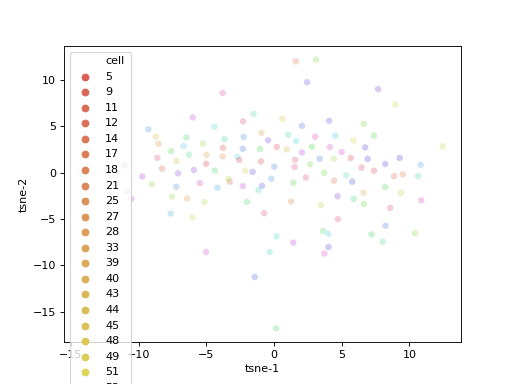

In [71]:
fig, ax = pl.subplots()

sns.scatterplot(
    x="tsne-1", y="tsne-2",
    hue="cell",
    palette=colors,
    data=dfm,
    legend="full",
    alpha=0.3
)

# PCA + t-SNE

In [88]:
n_components = 20
dimr_type = 'PCA'

if dimr_type == 'LDA':
    dimr = LinearDiscriminantAnalysis(n_components=n_components)
else:
    dimr = PCA(n_components=n_components)
    
X_r = dimr.fit(X_s, labels).transform(X_s)
# Percentage of variance explained for each components
print('Explained variation per principal component: {}'.format(dimr.explained_variance_ratio_))
print('Total explained variance {}: {}'.format( n_components, np.sum(dimr.explained_variance_ratio_)))


Explained variation per principal component: [ 0.12301333  0.08748148  0.05953511  0.03983165  0.0331737   0.03007421
  0.02837705  0.02629798  0.02548929  0.02505266  0.02329668  0.02068075
  0.02021532  0.01954691  0.01897744  0.0182239   0.01734023  0.01629776
  0.0155617   0.0154332 ]
Total explained variance 20: 0.663900340665


In [102]:
time_start = time.time()
tsne = manifold.TSNE(n_components=2, verbose=1, perplexity=1000, n_iter=300)
tsne_results = tsne.fit_transform(X_r)
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))


[t-SNE] Computing 3001 nearest neighbors...
[t-SNE] Indexed 115200 samples in 0.170s...


MemoryError: 

In [98]:
df.shape

(115200, 53)

In [99]:
tsne_results.shape

(115200, 2)

In [100]:
df = pd.DataFrame(X_s, index=X.index, columns=X.columns)
df['tsne-1'] = tsne_results[:,0]
df['tsne-2'] = tsne_results[:,1]
df['cell'] = df.index.tolist()

<IPython.core.display.Javascript object>


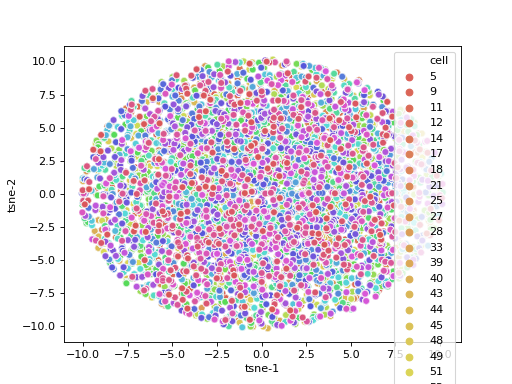

In [101]:
fig, ax = pl.subplots()

sns.scatterplot(
    x="tsne-1", y="tsne-2",
    hue="cell",
    palette=colors,
    data=df,
    legend="full",
    alpha=0.3
)

In [81]:
n_components = 2
(fig, subplots) = pl.subplots(1, 5, figsize=(15, 8))
perplexities = [5, 30, 50, 100]


for i, perplexity in enumerate(perplexities):
    ax = subplots[i]

    t0 = time.time()
    tsne = manifold.TSNE(n_components=n_components, init='random',
                         random_state=0, perplexity=perplexity)
    Y = tsne.fit_transform(X_r)
    t1 = time.time()
    print("uniform grid, perplexity=%d in %.2g sec" % (perplexity, t1 - t0))

    ax.set_title("Perplexity=%d" % perplexity)
    ax.scatter(Y[:, 0], Y[:, 1], c=colors)
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_major_formatter(NullFormatter())
    ax.axis('tight')

<IPython.core.display.Javascript object>

KeyboardInterrupt: 

# Cluster: k-means

In [391]:
from sklearn import metrics

n_samples, n_features = X_s.shape
print("N samples: %i, N features: %i" % (n_samples, n_features))
n_clusters = 3 #len(np.unique(labels))

sample_size = 300

print("n_digits: %d, \t n_samples %d, \t n_features %d"
      % (n_digits, n_samples, n_features))


print(82 * '_')
print('init\t\ttime\tinertia\thomo\tcompl\tv-meas\tARI\tAMI\tsilhouette')


def bench_k_means(estimator, name, data):
    t0 = time()
    estimator.fit(data)
    print('%-9s\t%.2fs\t%i\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f'
          % (name, (time() - t0), estimator.inertia_,
             metrics.homogeneity_score(labels, estimator.labels_),
             metrics.completeness_score(labels, estimator.labels_),
             metrics.v_measure_score(labels, estimator.labels_),
             metrics.adjusted_rand_score(labels, estimator.labels_),
             metrics.adjusted_mutual_info_score(labels,  estimator.labels_),
                                                #average_method='arithmetic'),
             metrics.silhouette_score(data, estimator.labels_,
                                      metric='euclidean',
                                      sample_size=sample_size)))

bench_k_means(KMeans(init='k-means++', n_clusters=n_clusters, n_init=10),
              name="k-means++", data=X_s)

bench_k_means(KMeans(init='random', n_clusters=n_clusters, n_init=10),
              name="random", data=X_s)
# in this case the seeding of the centers is deterministic, hence we run the
# kmeans algorithm only once with n_init=1
pca = PCA(n_components=n_clusters).fit(X_s)
bench_k_means(KMeans(init=pca.components_, n_clusters=n_clusters, n_init=1),
              name="PCA-based",
              data=X_s)
print(82 * '_')


N samples: 3840, N features: 50
n_digits: 10, 	 n_samples 3840, 	 n_features 50
__________________________________________________________________________________
init		time	inertia	homo	compl	v-meas	ARI	AMI	silhouette
k-means++	0.25s	171864	0.073	0.585	0.131	0.004	0.066	0.205
random   	0.24s	171865	0.072	0.578	0.128	0.004	0.065	0.203
PCA-based	0.02s	171884	0.079	0.574	0.139	0.004	0.072	0.231
__________________________________________________________________________________


In [392]:
from sklearn.cluster import KMeans


In [578]:
n_clusters = 10
km = KMeans(init='k-means++', n_clusters=n_clusters, n_init=10)
km.fit(X_r)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=10, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [579]:

# Step size of the mesh. Decrease to increase the quality of the VQ.
h = .02     # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = X_r[:, 0].min() - 1, X_r[:, 0].max() + 1
y_min, y_max = X_r[:, 1].min() - 1, X_r[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = km.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)


<IPython.core.display.Javascript object>


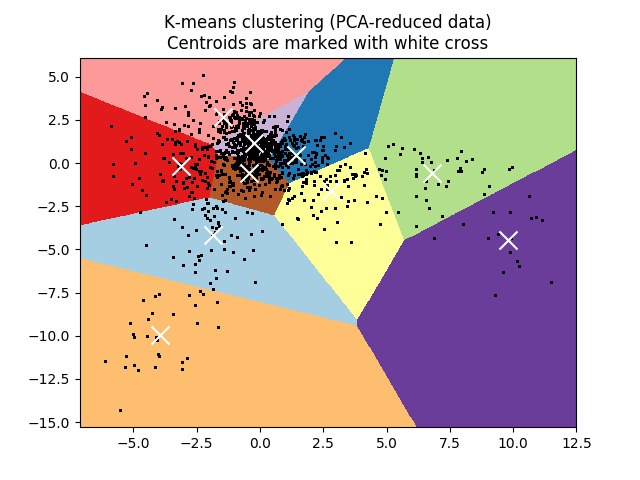

(-15.294832014023354, 6.1096120003474113)

In [580]:
pl.figure()
pl.clf()
pl.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=pl.cm.Paired,
           aspect='auto', origin='lower')


pl.plot(X_r[:, 0], X_r[:, 1], 'k.', markersize=2)
# Plot the centroids as a white X
centroids = km.cluster_centers_
pl.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)
pl.title('K-means clustering (%s-reduced data)\n'
          'Centroids are marked with white cross' % dimr_type)
pl.xlim(x_min, x_max)
pl.ylim(y_min, y_max)

In [408]:
df2 = meanr.loc[rois_plot]
df2.head()

config  config001  config002  config003  config004  config005  config006  \
5        0.011371   0.018404   0.017156   0.019427   0.007100   0.025149   
9        0.043880   0.033851   0.030019   0.026400   0.022550   0.042501   
11       0.025375   0.012611   0.010285  -0.002744   0.005150   0.016719   
12       0.037461   0.022771  -0.000385  -0.007113  -0.001757   0.025968   
14      -0.006842   0.001463  -0.006247  -0.007146  -0.009597  -0.000955   

config  config007  config008  config009  config010    ...      config041  \
5       -0.003903  -0.000157  -0.011274  -0.009563    ...       0.033823   
9        0.037319   0.028331   0.018878   0.025341    ...       0.062850   
11       0.019935   0.012883   0.001668  -0.017710    ...       0.054935   
12       0.011667   0.011221   0.031876   0.012802    ...       0.028950   
14       0.029381   0.015413   0.014573   0.021324    ...      -0.003073   

config  config042  config043  config044  config045  config046  config047  \
5        0.012127   0.007013   0.004041   0.003624   0.029589   0.015487   
9        0.009303  -0.004800  -0.007900  -0.011014   0.053034   0.018959   
11       0.014593   0.012578  -0.002015  -0.012027   0.038858   0.041427   
12      -0.007608  -0.032738  -0.033261  -0.024665   0.031827  -0.008739   
14       0.035923   0.037573   0.041169   0.034609  -0.004242   0.055818   

config  config048  config049  config050  
5        0.003578   0.015953  -0.000303  
9       -0.000899  -0.004351  -0.003293  
11       0.011678   0.005782  -0.026702  
12      -0.014939  -0.022422  -0.026258  
14       0.043263   0.042425   0.036706  

[5 rows x 50 columns]

In [409]:
labels_true = df2.index.tolist()
label_types = sorted(np.unique(labels))

Xs = StandardScaler().fit_transform(df2)


In [423]:
Xs.shape

(128, 50)

In [426]:
X_r.shape

(3840, 2)

In [427]:
len(labels)

3840

In [428]:
from sklearn.cluster import AffinityPropagation
import itertools
import copy

In [432]:
# Compute Affinity Propagation
X = copy.copy(X_r)

af = AffinityPropagation(preference=None).fit(X)
labels_true = copy.copy(labels)
cluster_centers_indices = af.cluster_centers_indices_
labels_pred = af.labels_

n_clusters_ = len(cluster_centers_indices)

print('Estimated number of clusters: %d' % n_clusters_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels_pred))
print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels_pred))
print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels_pred))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(labels_true, labels_pred))
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(labels_true, labels_pred))#,
                                           #average_method='arithmetic'))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels_pred, metric='sqeuclidean'))


Estimated number of clusters: 1174
Homogeneity: 0.653
Completeness: 0.515
V-measure: 0.576
Adjusted Rand Index: 0.038
Adjusted Mutual Information: 0.104
Silhouette Coefficient: 0.227


<IPython.core.display.Javascript object>


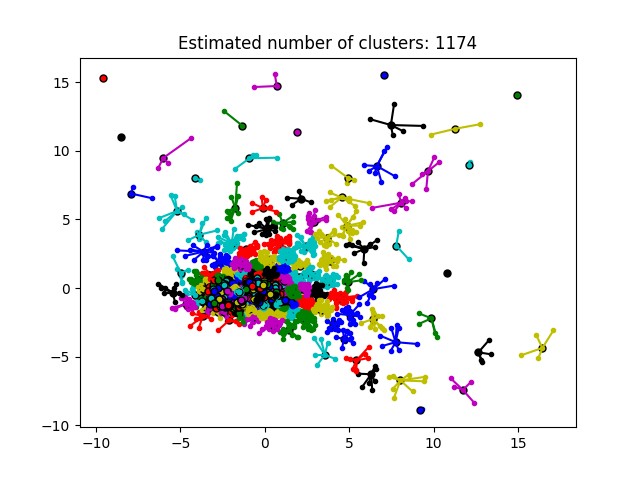

In [433]:

pl.figure()

colors = itertools.cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
#colors = sns.color_palette('cubehelix', n_colors=n_clusters)
for k, col in zip(range(n_clusters_), colors):
    class_members = labels_pred == k
    cluster_center = X[cluster_centers_indices[k]]
    pl.plot(X[class_members, 0], X[class_members, 1], col + '.')
    pl.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=5)
    for x in X[class_members]:
        pl.plot([cluster_center[0], x[0]], [cluster_center[1], x[1]], col)

pl.title('Estimated number of clusters: %d' % n_clusters_)
pl.show()

In [440]:
from sklearn.cluster import AgglomerativeClustering
import mpl_toolkits.mplot3d.axes3d as p3
import time


In [461]:
Xd = StandardScaler().fit_transform(df)

X = copy.copy(Xd)


In [462]:
X.shape

(3840, 50)

Compute unstructured hierarchical clustering...
Elapsed time: 0.52s
Number of points: 3840


<IPython.core.display.Javascript object>


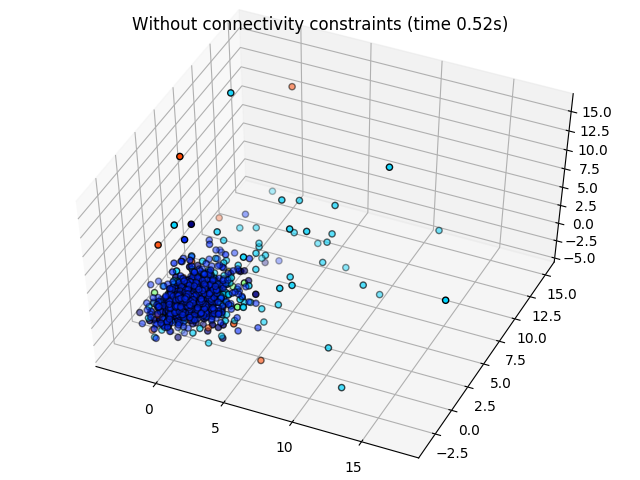

Text(0.5,0.92,u'Without connectivity constraints (time 0.52s)')

In [473]:
# #############################################################################
# Compute clustering
print("Compute unstructured hierarchical clustering...")
st = time.time()
ward = AgglomerativeClustering(n_clusters=6, linkage='ward').fit(X)
elapsed_time = time.time() - st
label = ward.labels_
print("Elapsed time: %.2fs" % elapsed_time)
print("Number of points: %i" % label.size)

# #############################################################################
# Plot result
fig = pl.figure()

ax = p3.Axes3D(fig)
ax.view_init(7, -80)
for l in np.unique(label):
    ax.scatter(X[label == l, 0], X[label == l, 1], X[label == l, 2],
               color=pl.cm.jet(np.float(l) / np.max(label + 1)),
               s=20, edgecolor='k')
pl.title('Without connectivity constraints (time %.2fs)' % elapsed_time)



In [464]:
# #############################################################################
# Define the structure A of the data. Here a 10 nearest neighbors
from sklearn.neighbors import kneighbors_graph
connectivity = kneighbors_graph(X, n_neighbors=10, include_self=False)


Compute structured hierarchical clustering...
Elapsed time: 13.26s
Number of points: 3840


<IPython.core.display.Javascript object>


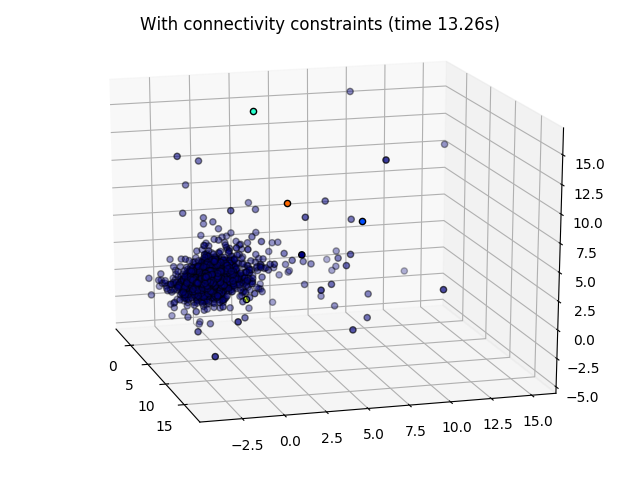

In [471]:
# #############################################################################
# Compute clustering
print("Compute structured hierarchical clustering...")
st = time.time()
ward = AgglomerativeClustering(n_clusters=5, connectivity=connectivity,
                               #distance_threshold=10,
                               affinity='l2',
                               linkage='complete').fit(X)
elapsed_time = time.time() - st
label = ward.labels_
print("Elapsed time: %.2fs" % elapsed_time)
print("Number of points: %i" % label.size)


# #############################################################################
# Plot result
fig = pl.figure()
ax = p3.Axes3D(fig)
ax.view_init(7, -80)
for l in np.unique(label):
    ax.scatter(X[label == l, 0], X[label == l, 1], X[label == l, 2],
               color=pl.cm.jet(float(l) / np.max(label + 1)),
               s=20, edgecolor='k')
pl.title('With connectivity constraints (time %.2fs)' % elapsed_time)

pl.show()


In [48]:
data_id = '|'.join([animalid, session, fov, traceid, stats_desc])

exp = util.Objects(animalid, session, fov, traceid=traceid, rootdir=rootdir)
# Get stimulus conditions
sdf = exp.get_stimuli()
sdf = reformat_morph_values(sdf)
sizes = np.array(sorted(sdf['size'].unique()))
morphs = np.array(sorted(sdf['morphlevel'].unique()))

n_sizes = len(sdf['size'].unique())
n_morphs = len(sdf['morphlevel'].unique()) 
if n_sizes != n_sz or n_morphs != n_mp:
    incorrect_nvalues.append(skey)
    pass

rstats, rlist, _ = util.get_roi_stats(animalid, session, fov, exp_name=exp.name,
                             response_type=response_type, responsive_test=responsive_test,
                             responsive_thr=responsive_thr, n_stds=n_stds)
rstats = rstats['nframes_above']

# Get metrics for each condition
estats = exp.get_stats(responsive_test=responsive_test, responsive_thr=responsive_thr, n_stds=n_stds)
meanr = pd.concat([pd.Series(estats.gdf.get_group(roi).groupby(['config']).mean()['dff'], name=roi) \
                   for roi in estats.rois], axis=1).T
assert len(np.where(np.isnan(meanr))[0])==0
semr = pd.concat([pd.Series(estats.gdf.get_group(roi).groupby(['config']).sem()['dff'], name=roi) \
                   for roi in estats.rois], axis=1).T


# Get ROI list
if threshold_dff:
    rois_plot = meanr[(meanr.max(axis=1) > min_dff)].index.tolist()
else:
    rois_plot = meanr.index.tolist()
print("Plotting %i of %i responsive cells." % (len(rois_plot), len(meanr.index.tolist())))

df_mean = meanr.loc[rois_plot]
df_sem = semr.loc[rois_plot]

hue_name = 'size' if tune_name=='morph' else 'morph'
tune_values = morphs.copy() if tune_name=='morph' else sizes.copy()
hue_values = sizes.copy() if tune_name=='morph' else morphs.copy()
hcolors = sns.color_palette('gray_r', n_colors=n_sz) if tune_name=='morph' else sns.color_palette('gray_r', n_colors=n_mp) 


... [JC090|20190605|FOV1_zoom2p0x] creating blobs object
... getting data paths - name: blobs
... renaming experiment to run name: combined_blobs_static
Getting stimulus info for: combined_blobs_static
... loading ROI stats: nstds
... [combined_blobs_static] Loading roi stats and cell list...
... loading data array
... offset: 385.58
... adjusting for equal reps / condn...
... updating self
filtering responsive cells: nstds
... getting responsive cells (test: nstds, thr: 10.00')
Plotting 141 of 161 responsive cells.


N rois to plot: 141
(12, 12)


<IPython.core.display.Javascript object>


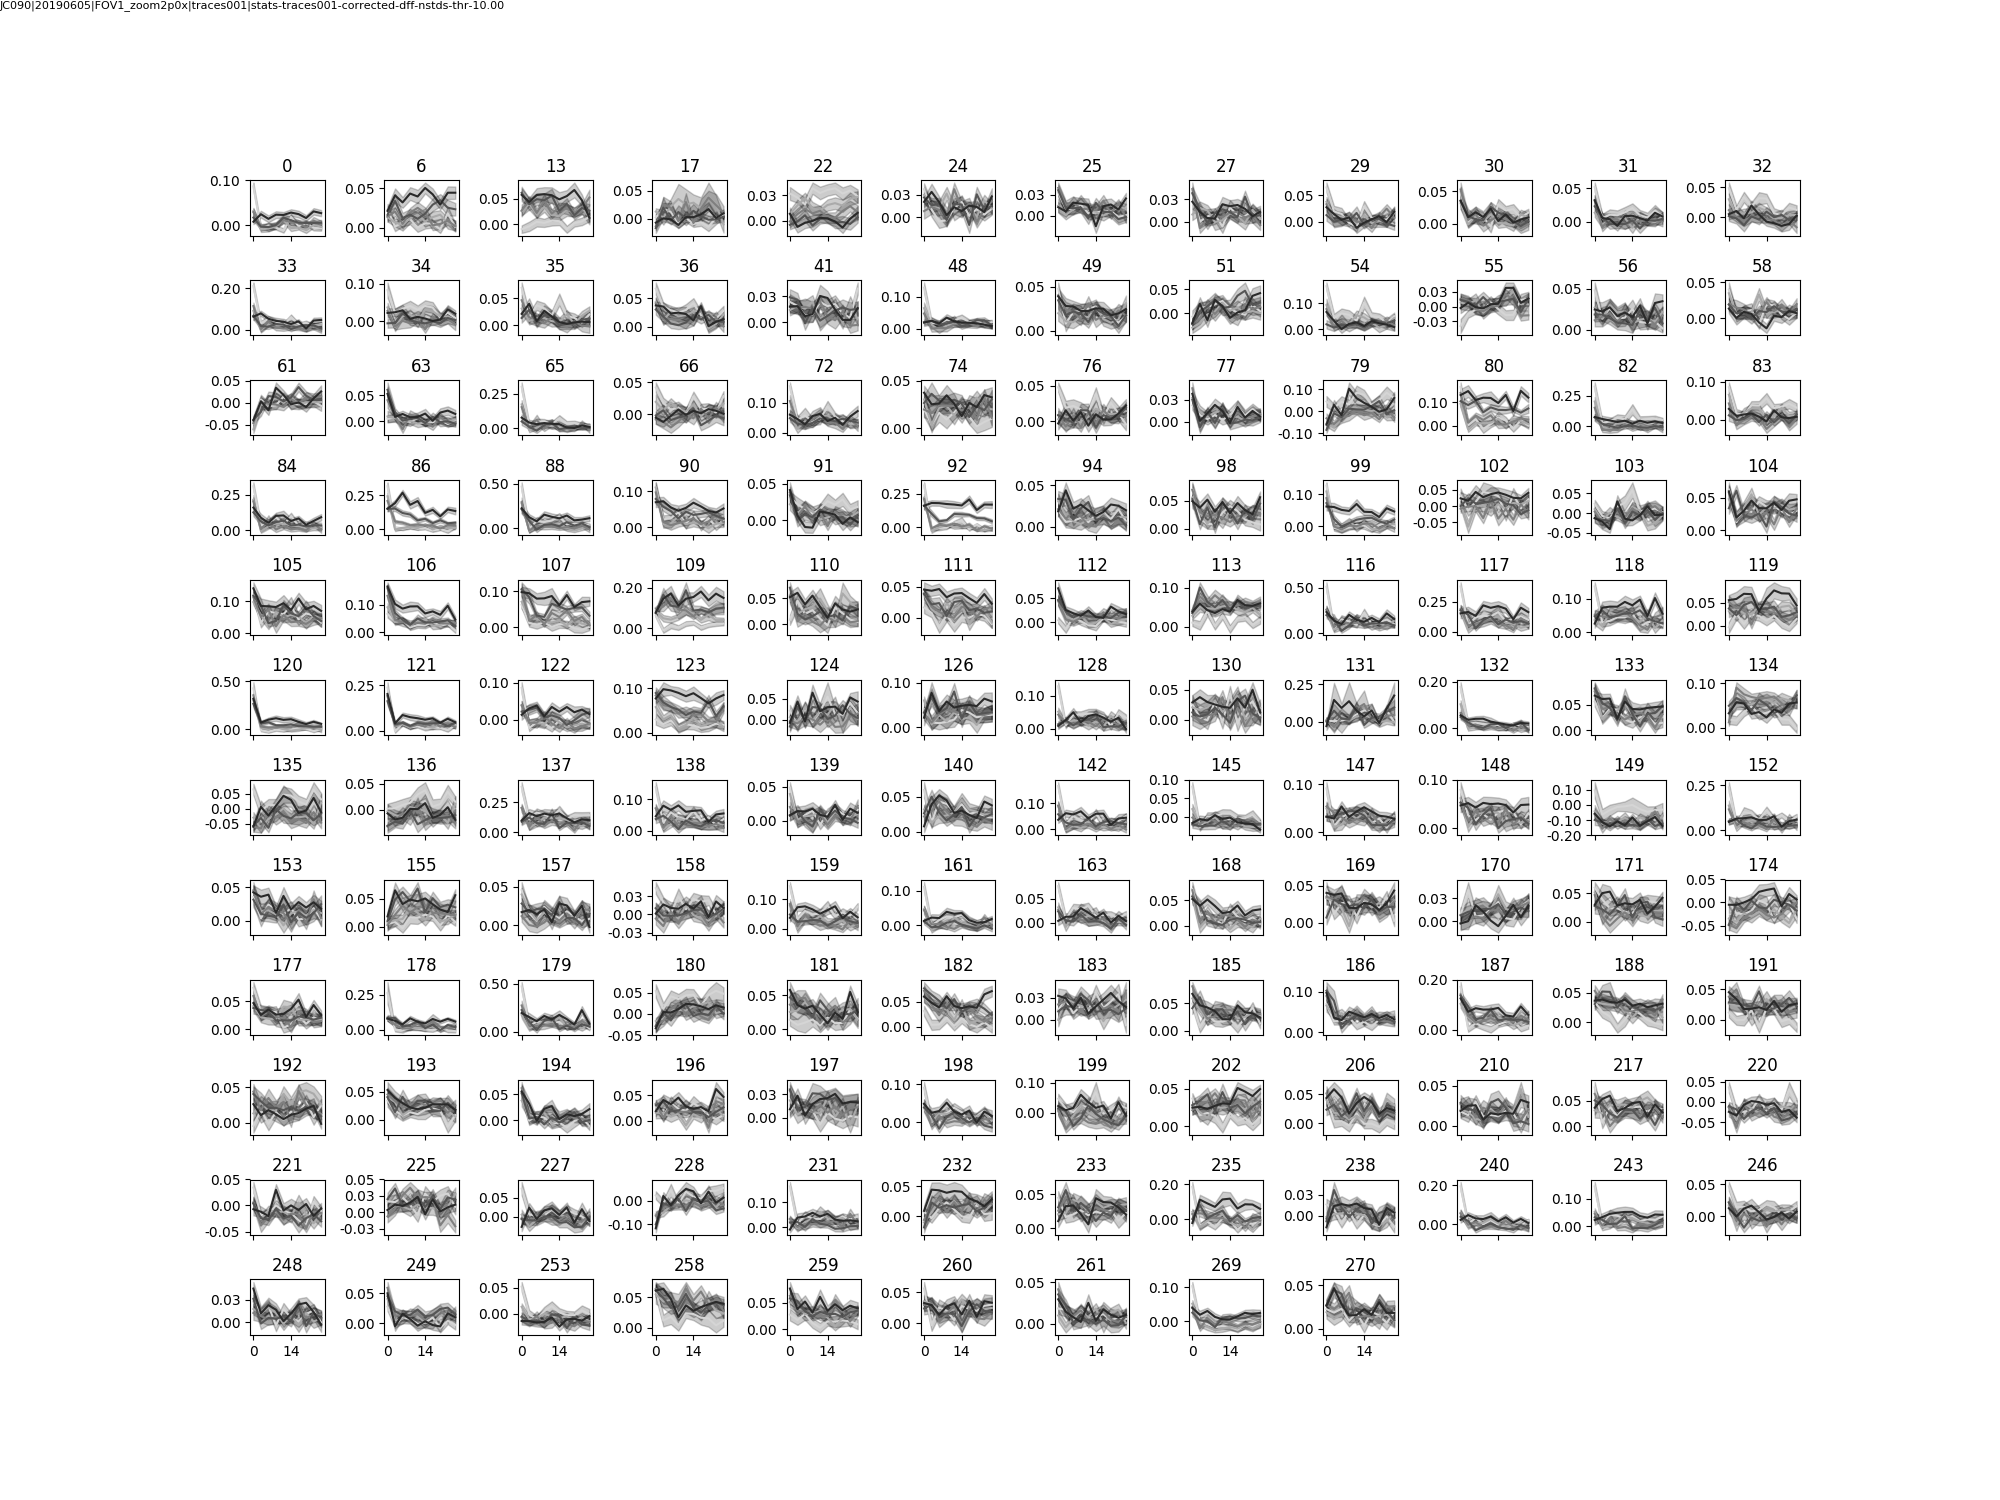

In [51]:

fig = plot_roi_tuning(df_mean, df_sem=df_sem, tune_values=tune_values, tune_name=tune_name,
                     hue_values=hue_values, hue_name=hue_name, hue_colors=hcolors)
if threshold_dff:
    figname = '%s-tuning_%s__%s_thr-dff-%.2f_%irois' % (tune_name, visual_area, data_id.replace('|', '_'), min_dff, len(rois_plot))
else:
    figname = '%s-tuning_%s__%s_all-resp_%irois' % (tune_namevisual_area, data_id.replace('|', '_'), len(rois_plot))


In [60]:
data_id

'JC076|20190422|FOV1_zoom2p0x|traces001|stats-traces001-corrected-dff-nstds-thr-10.00'

In [61]:
len(glob.glob(os.path.join(outdir, 'sessions', 'morph-tuning_%s__%s*.png' % (visual_area, data_id.replace('|', '_')))))

1

... [JC076|20190422|FOV1_zoom2p0x] creating blobs object
... getting data paths - name: blobs
... renaming experiment to run name: combined_blobs_static
Getting stimulus info for: combined_blobs_static
... [JC076|20190502|FOV1_zoom2p0x] creating blobs object
... getting data paths - name: blobs
... renaming experiment to run name: combined_blobs_static
Getting stimulus info for: combined_blobs_static
... [JC090|20190605|FOV1_zoom2p0x] creating blobs object
... getting data paths - name: blobs
... renaming experiment to run name: combined_blobs_static
Getting stimulus info for: combined_blobs_static
... [JC091|20190602|FOV1_zoom2p0x] creating blobs object
... getting data paths - name: blobs
... renaming experiment to run name: combined_blobs_static
Getting stimulus info for: combined_blobs_static
... [JC091|20190606|FOV1_zoom2p0x] creating blobs object
... getting data paths - name: blobs
... renaming experiment to run name: combined_blobs_static
Getting stimulus info for: combined_blo

<IPython.core.display.Javascript object>


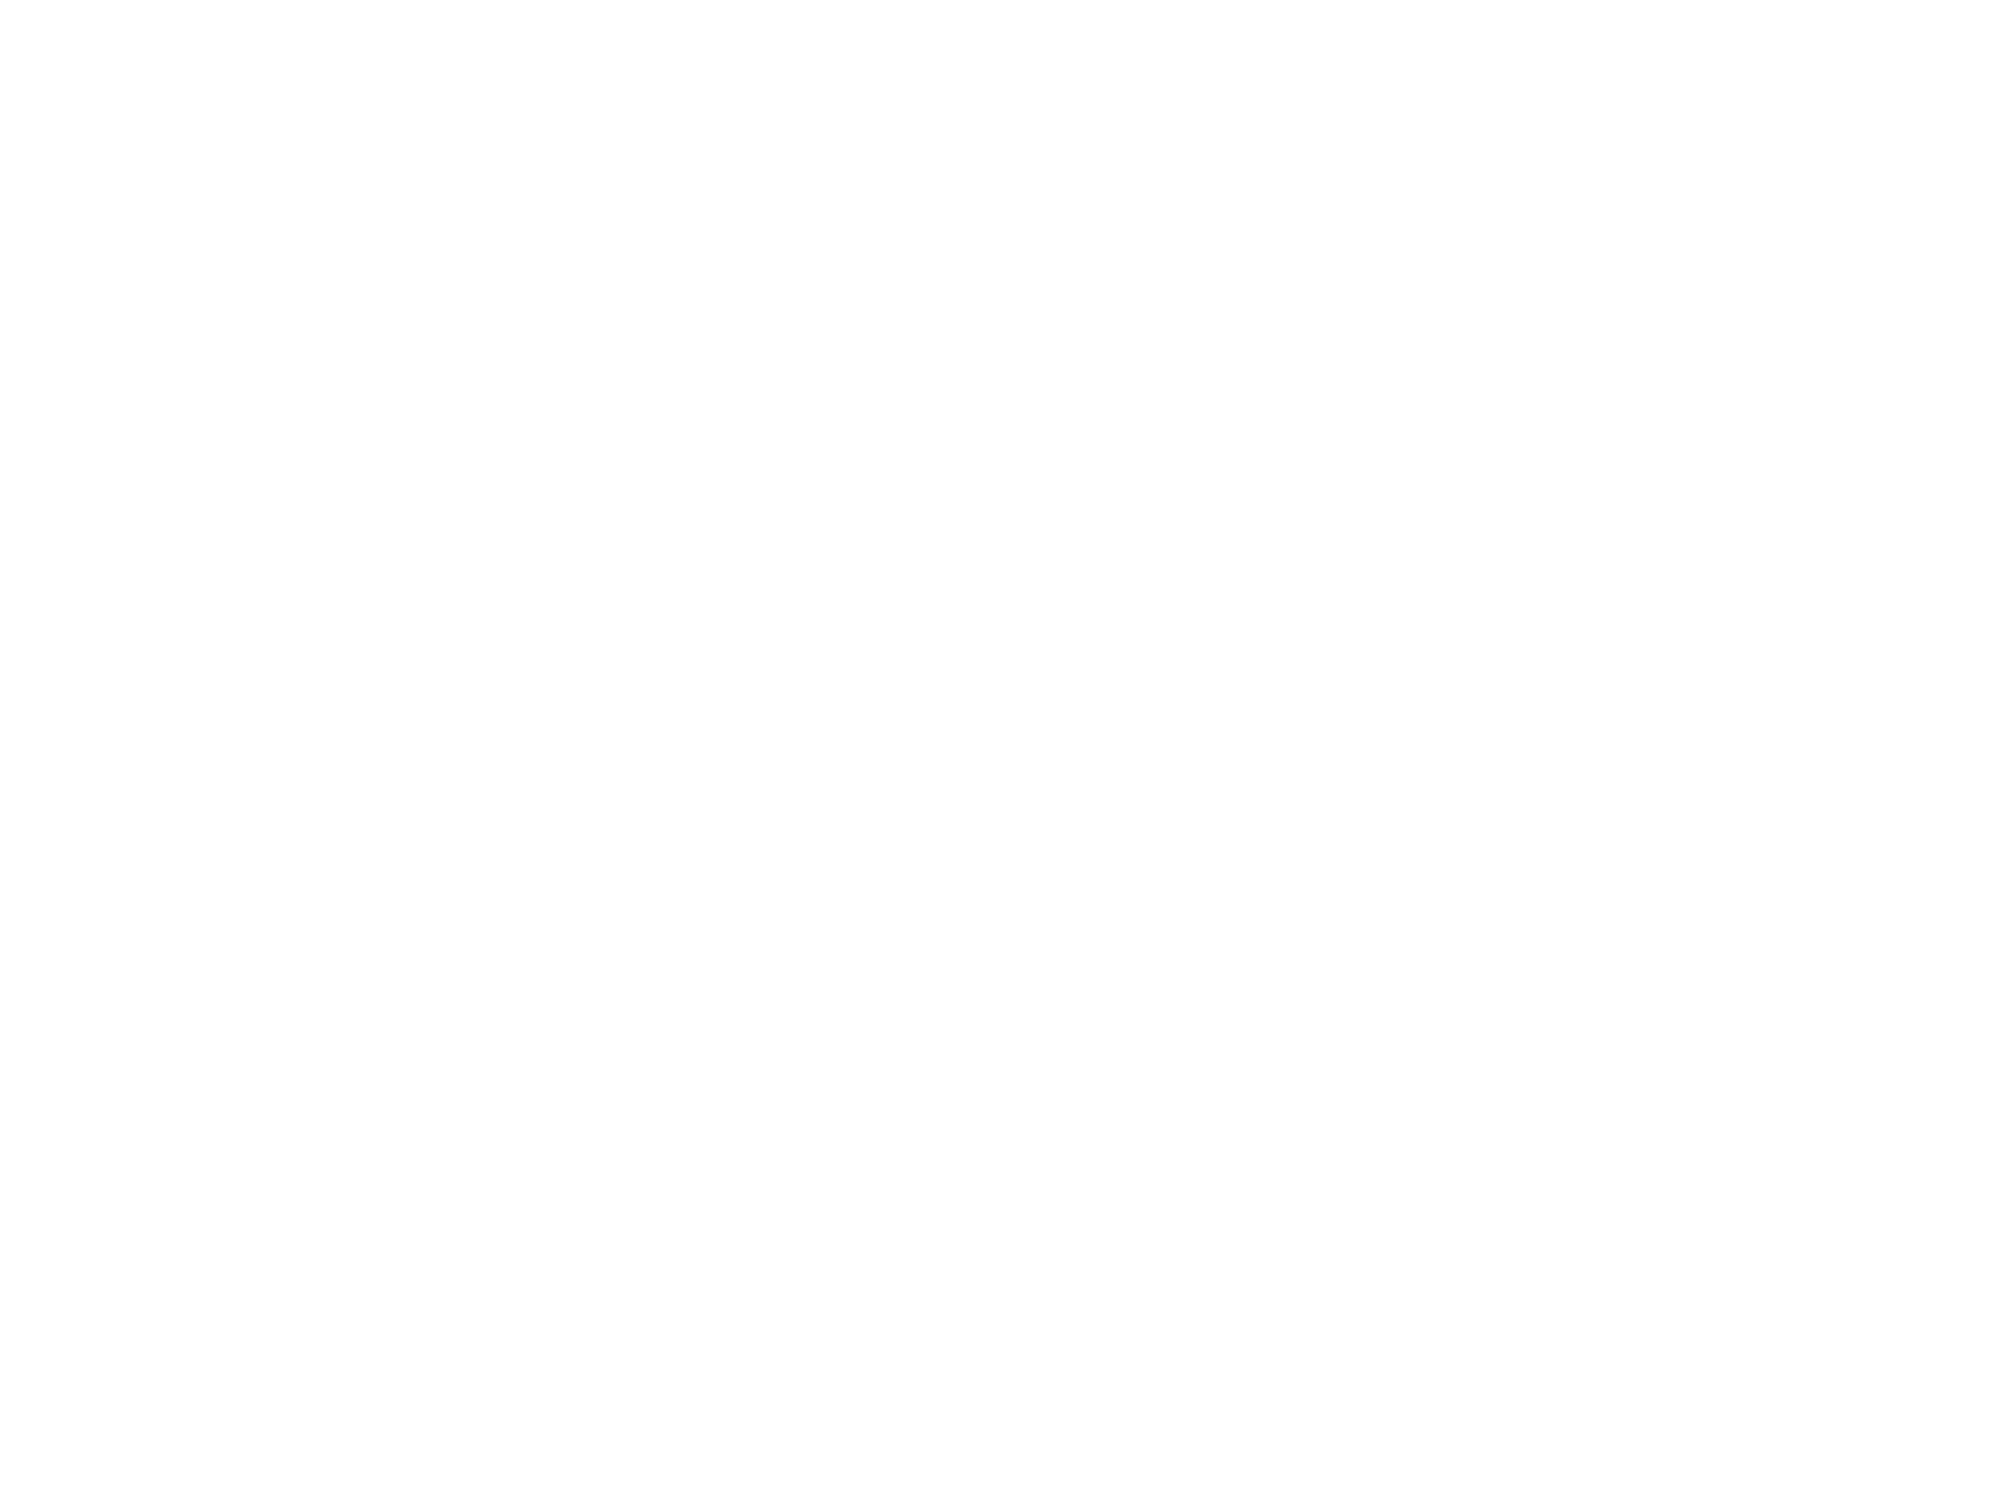

morph-tuning_Lm__JC078_20190430_FOV1_zoom2p0x_traces001_stats-traces001-corrected-dff-nstds-thr-10.00_thr-dff-0.03_152-of-185rois
... [JC078|20190504|FOV1_zoom2p0x] creating blobs object
... getting data paths - name: blobs
... renaming experiment to run name: combined_blobs_static
Getting stimulus info for: combined_blobs_static
... loading ROI stats: nstds
... [combined_blobs_static] Loading roi stats and cell list...
... loading data array
... offset: 368.74
... updating self
filtering responsive cells: nstds
... getting responsive cells (test: nstds, thr: 10.00')
Plotting 155 of 188 responsive cells.
N rois to plot: 155
(12, 13)


<IPython.core.display.Javascript object>


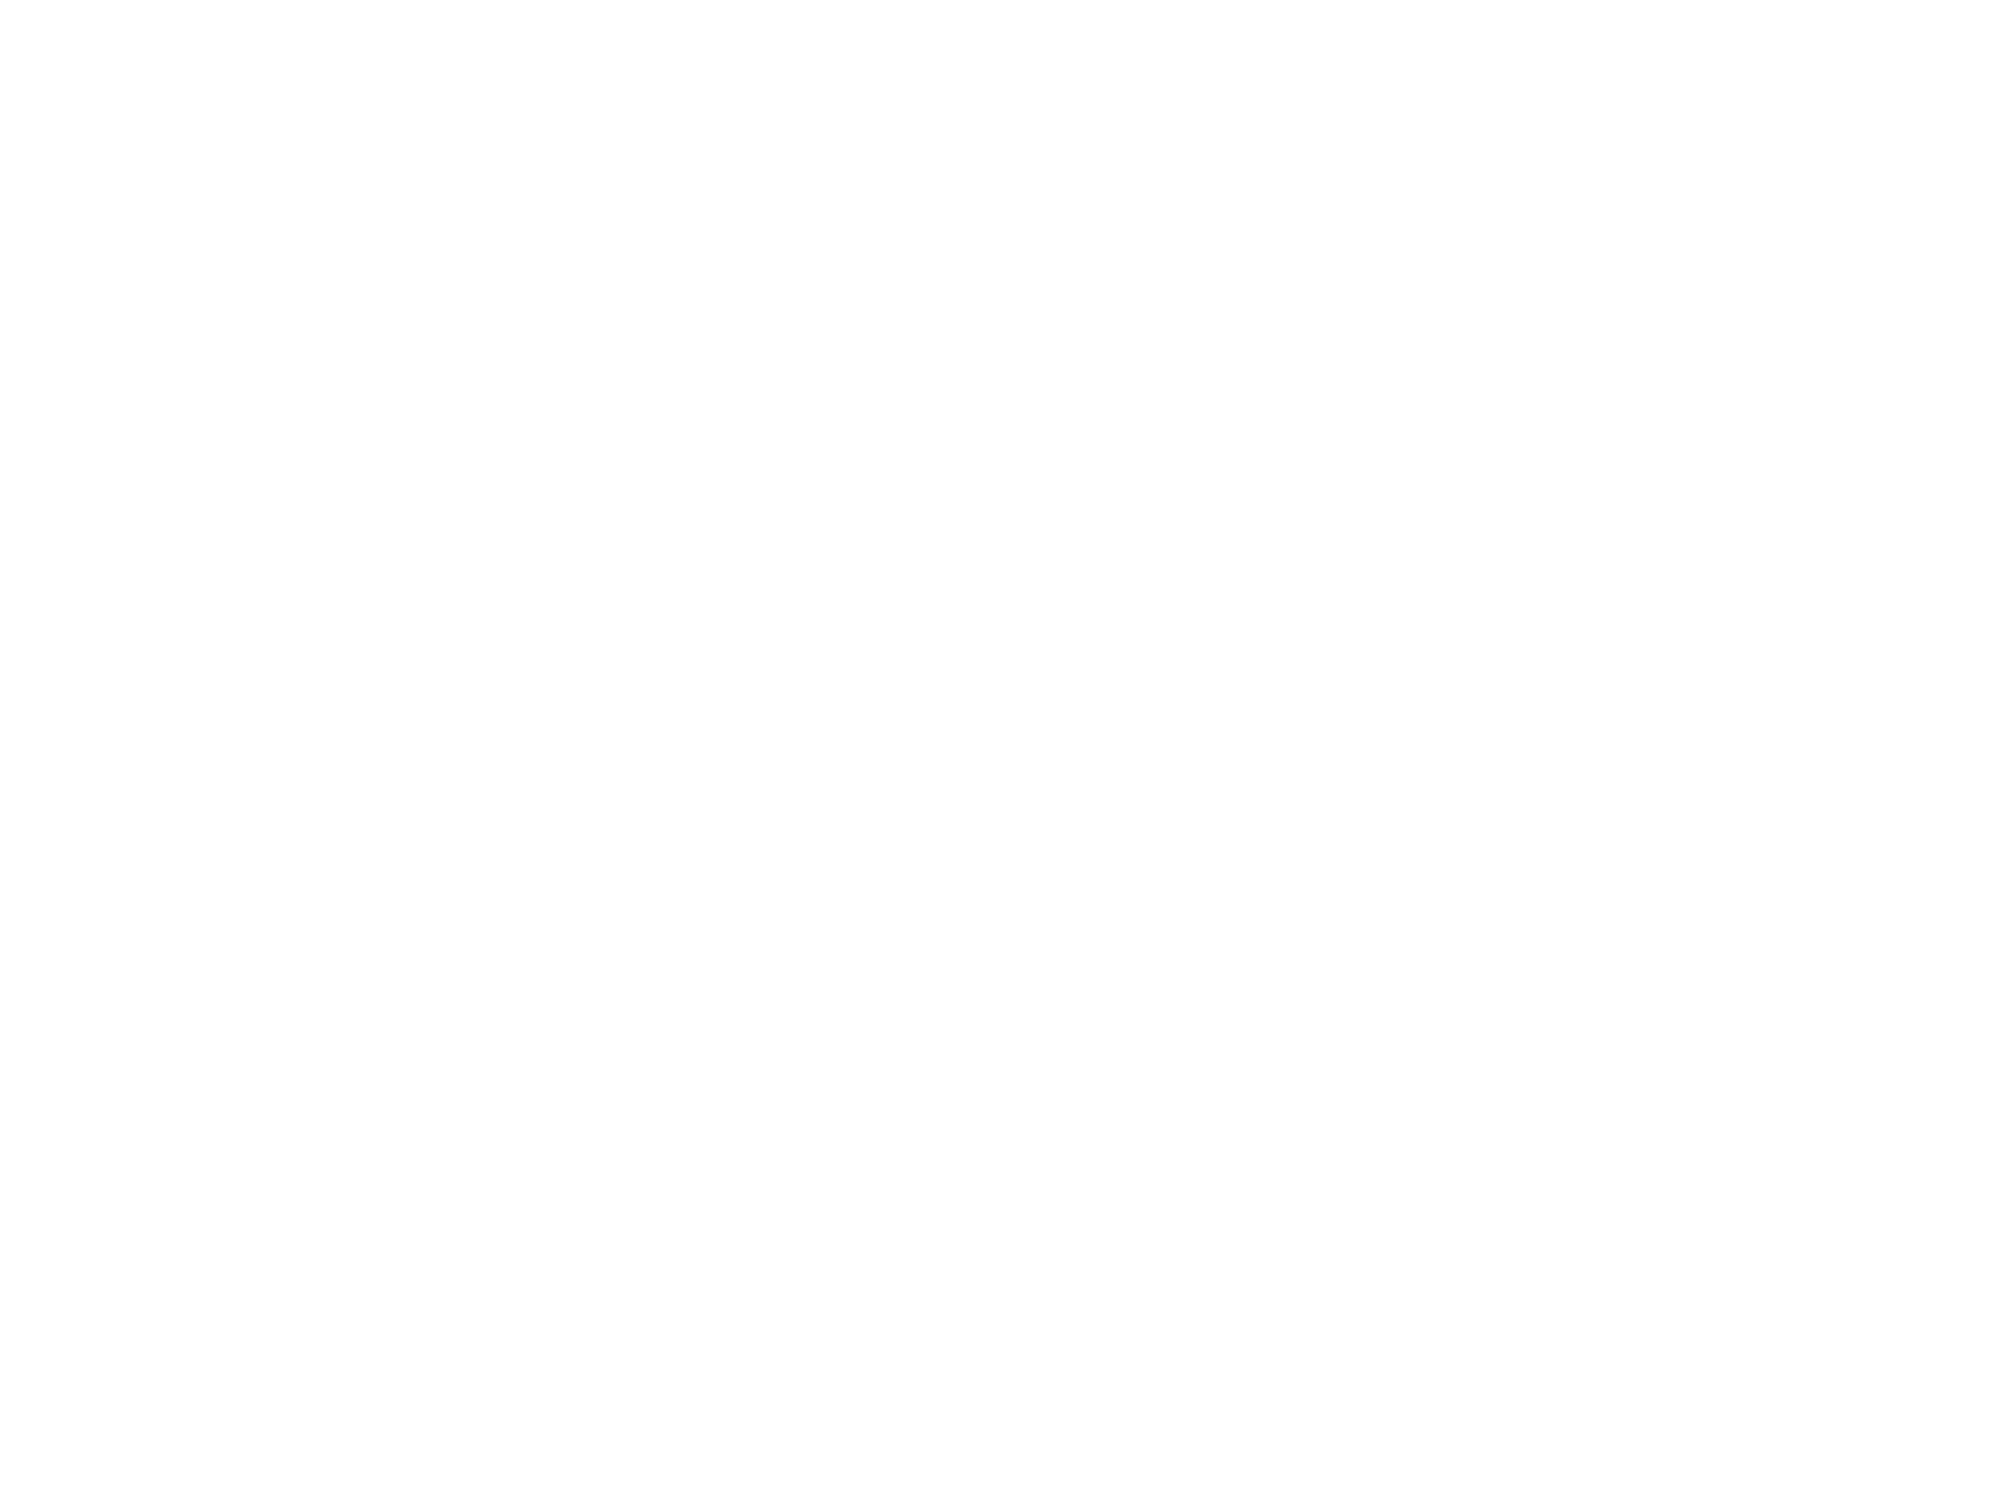

morph-tuning_Lm__JC078_20190504_FOV1_zoom2p0x_traces001_stats-traces001-corrected-dff-nstds-thr-10.00_thr-dff-0.03_155-of-188rois
... [JC078|20190509|FOV1_zoom2p0x] creating blobs object
... getting data paths - name: blobs
... renaming experiment to run name: combined_blobs_static
Getting stimulus info for: combined_blobs_static
... loading ROI stats: nstds
... [combined_blobs_static] Loading roi stats and cell list...
... loading data array
... offset: 329.04
... updating self
filtering responsive cells: nstds
... getting responsive cells (test: nstds, thr: 10.00')
Plotting 123 of 165 responsive cells.
N rois to plot: 123
(11, 12)


<IPython.core.display.Javascript object>


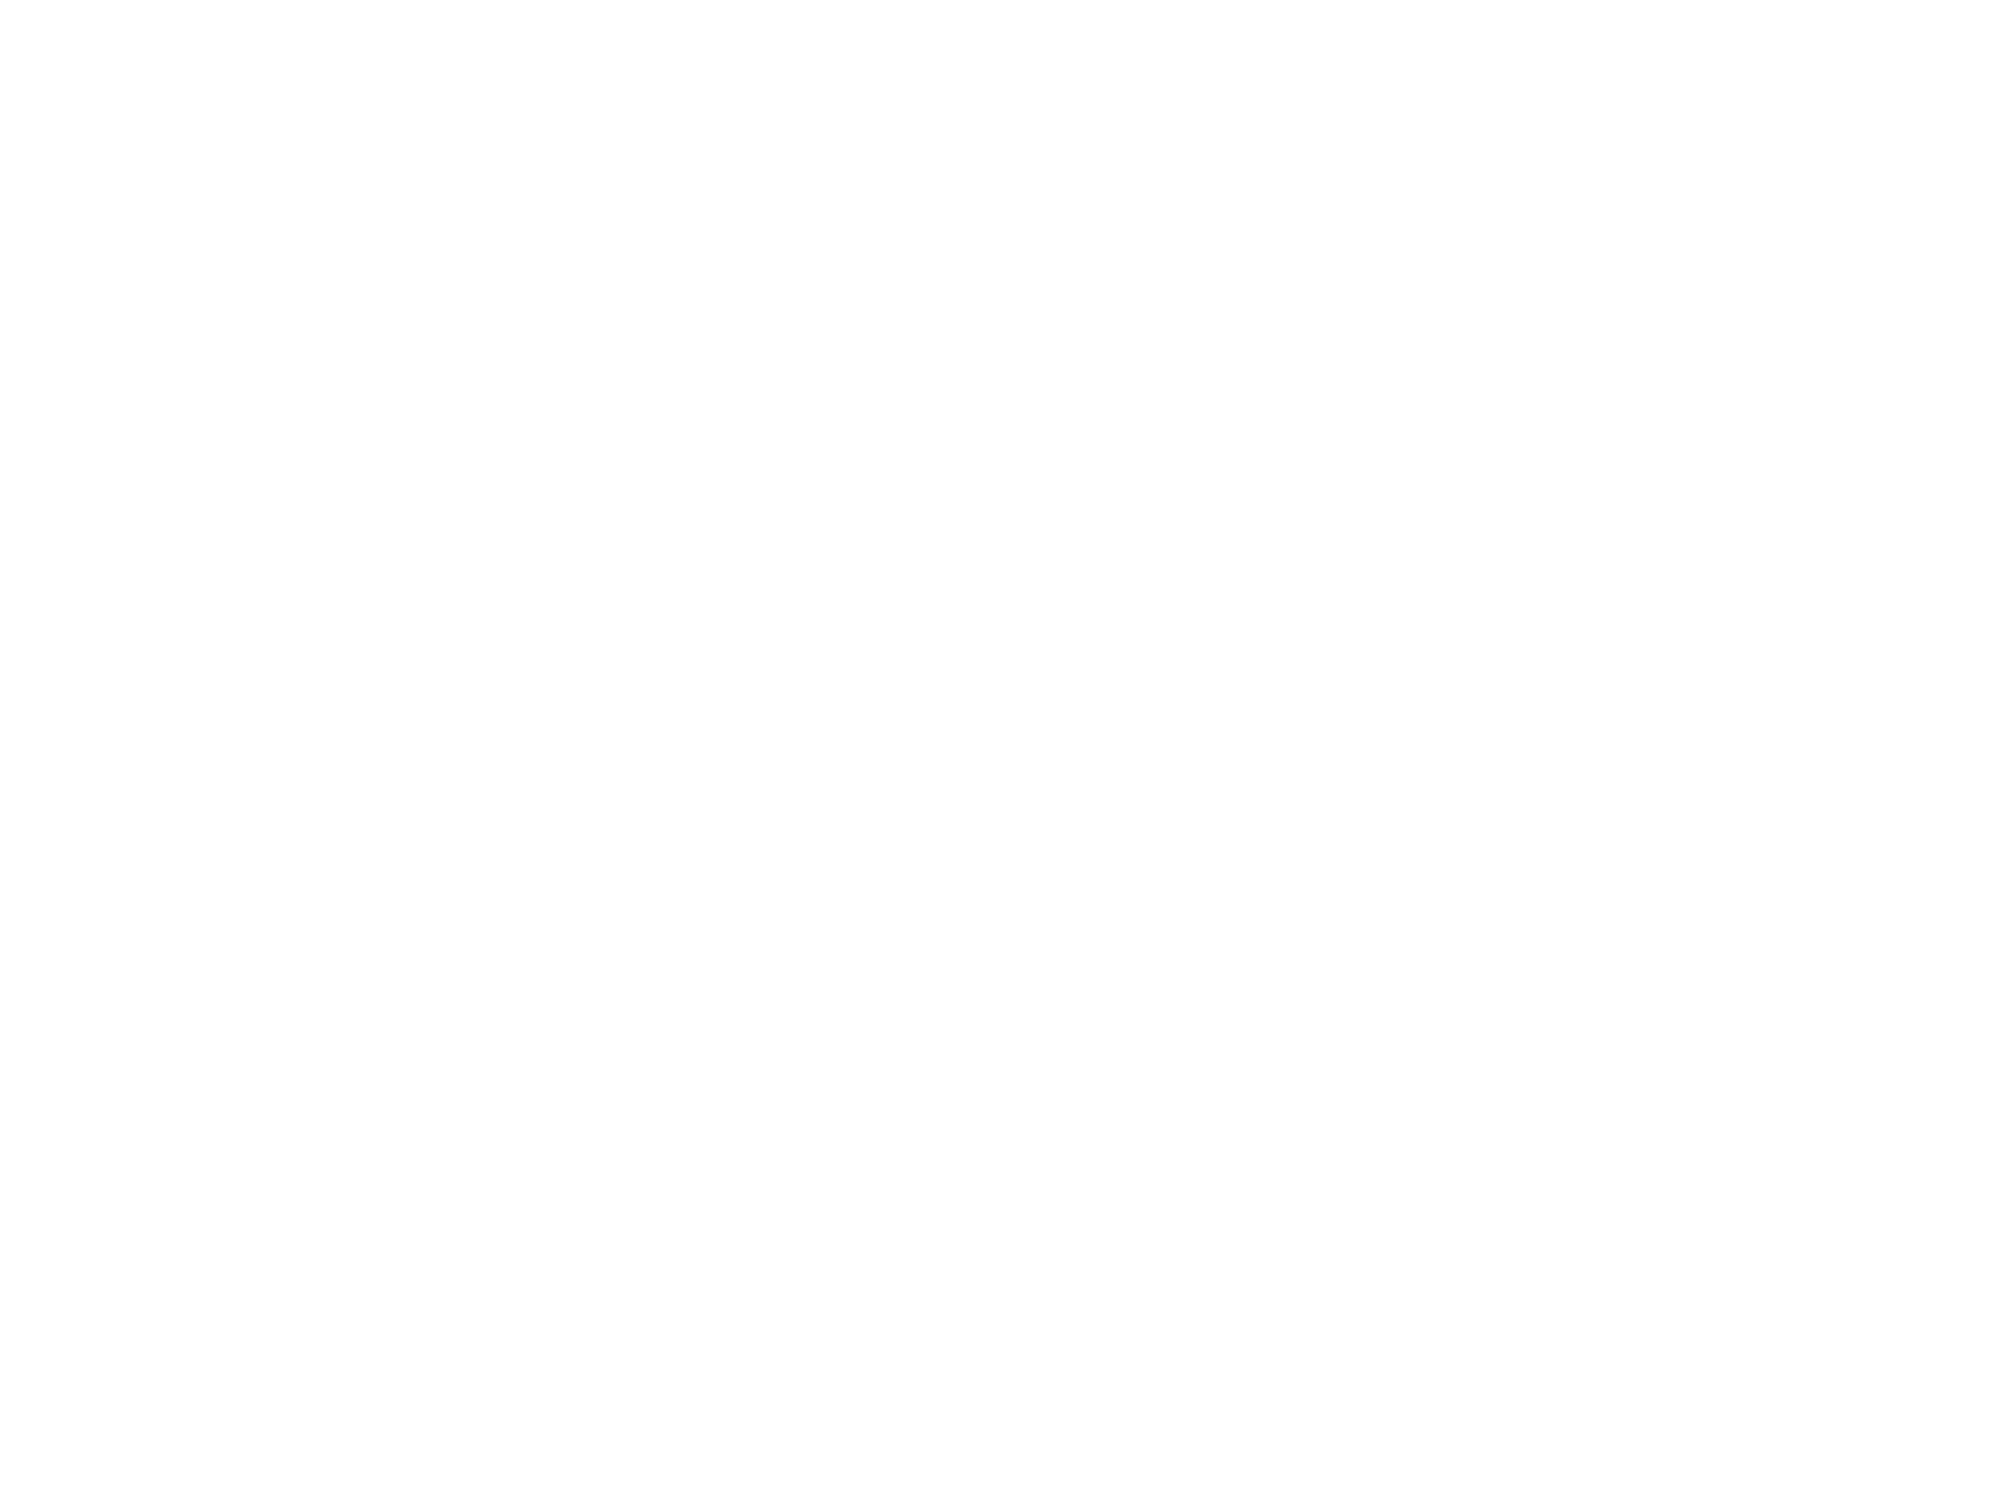

morph-tuning_Lm__JC078_20190509_FOV1_zoom2p0x_traces001_stats-traces001-corrected-dff-nstds-thr-10.00_thr-dff-0.03_123-of-165rois
... [JC078|20190513|FOV1_zoom2p0x] creating blobs object
... getting data paths - name: blobs
... renaming experiment to run name: combined_blobs_static
Getting stimulus info for: combined_blobs_static
... loading ROI stats: nstds
... [combined_blobs_static] Loading roi stats and cell list...
... loading data array
... offset: 422.91
... adjusting for equal reps / condn...
... updating self
filtering responsive cells: nstds
... getting responsive cells (test: nstds, thr: 10.00')
Plotting 138 of 177 responsive cells.
N rois to plot: 138
(12, 12)


<IPython.core.display.Javascript object>


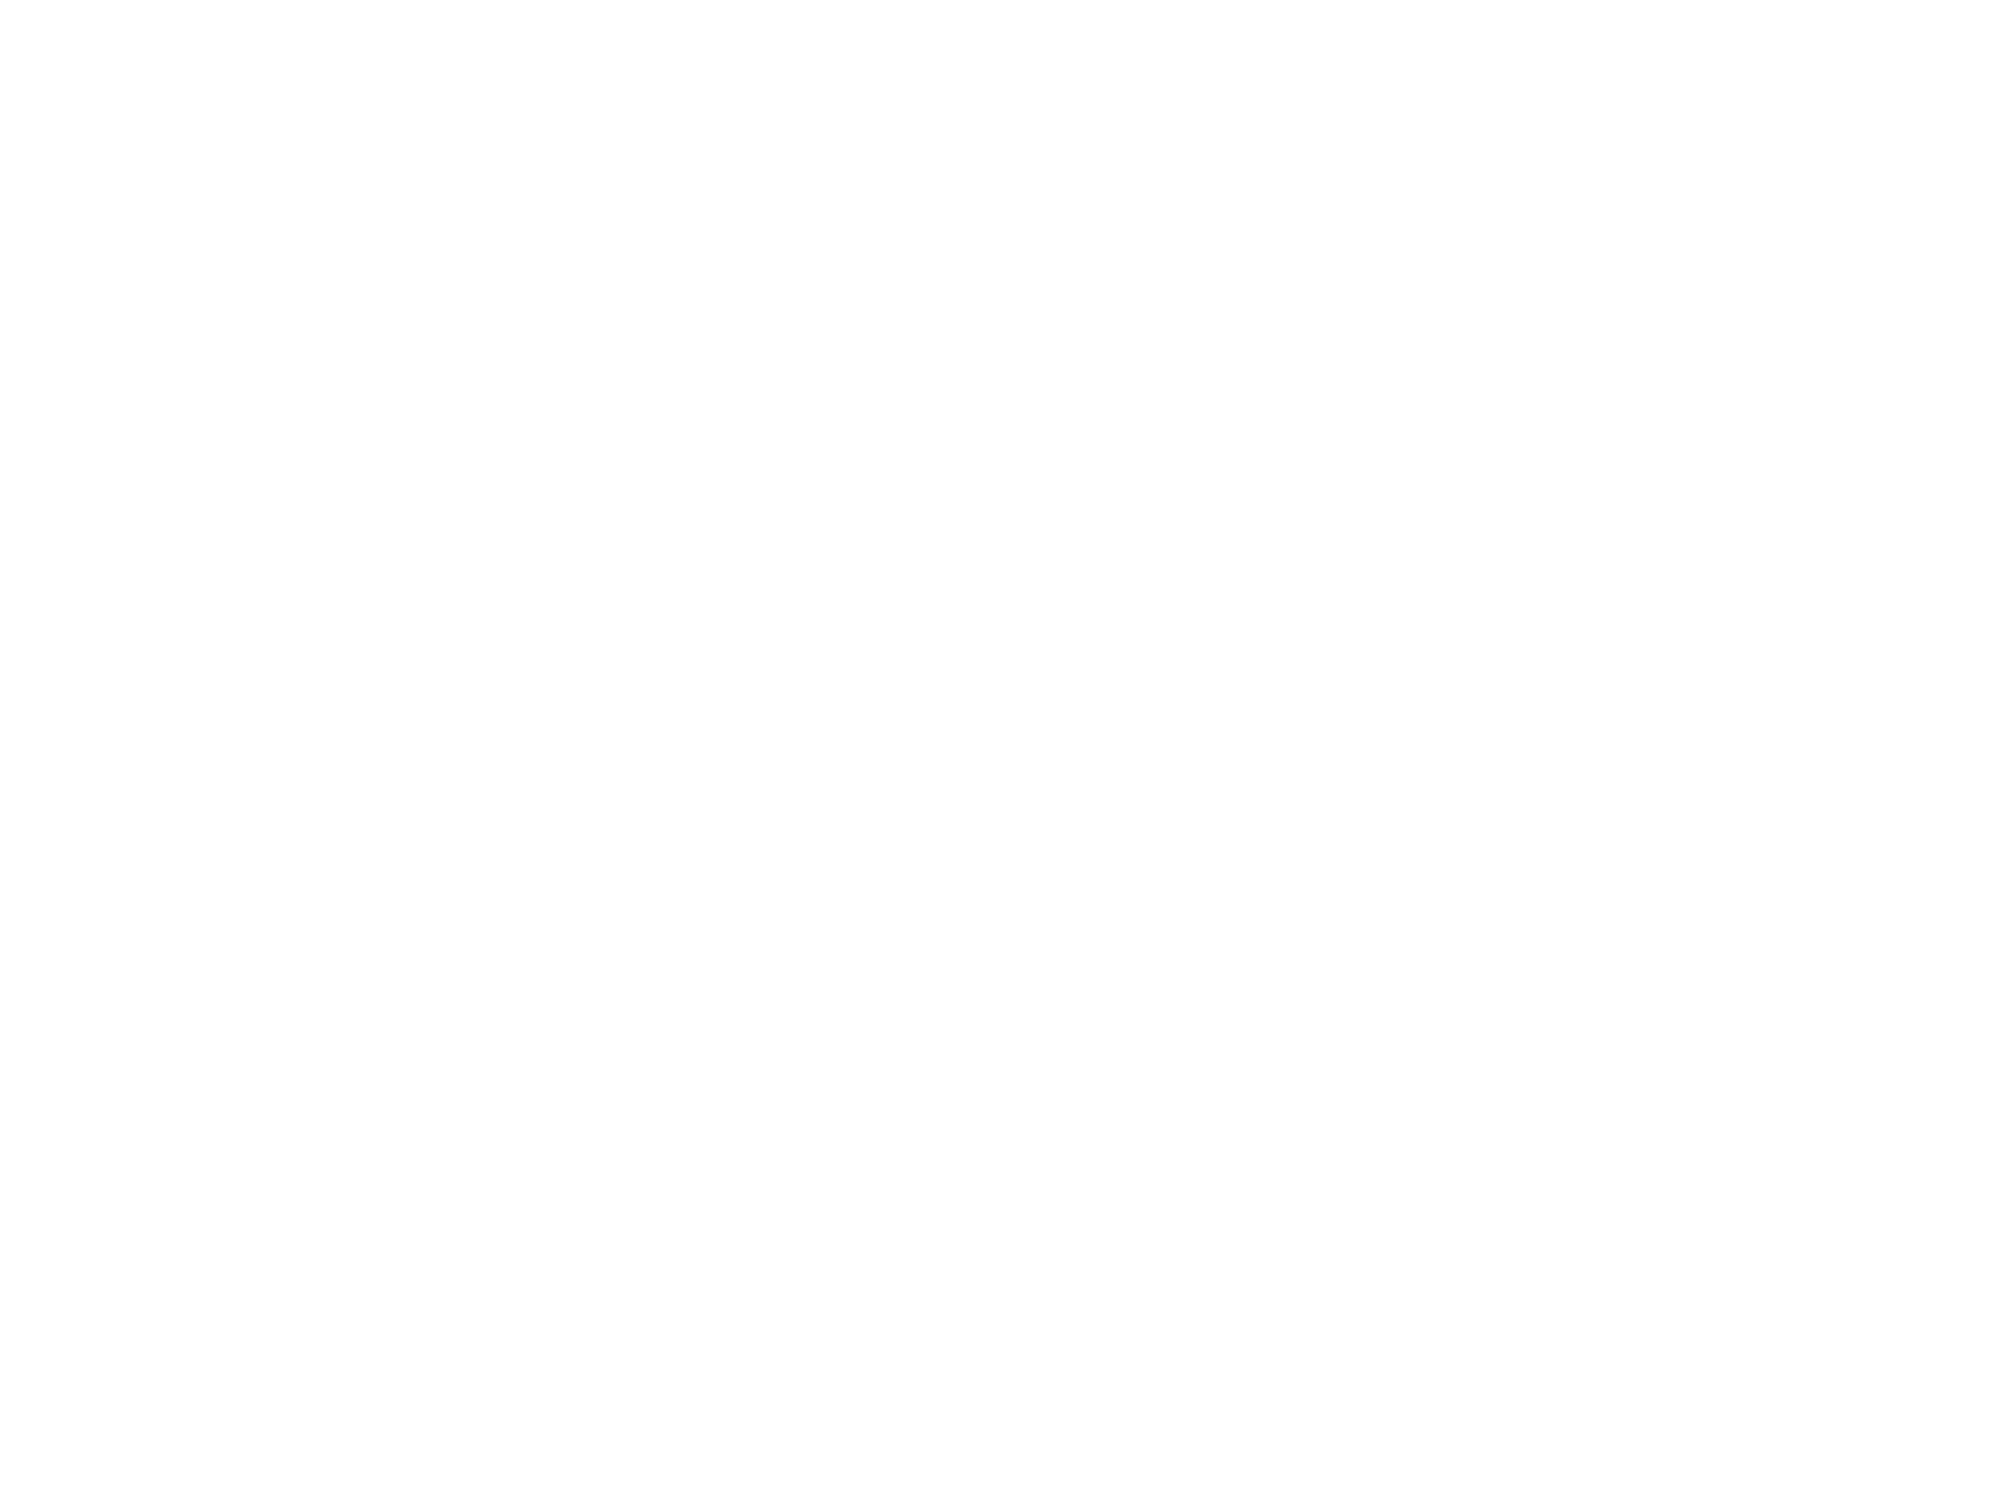

morph-tuning_Lm__JC078_20190513_FOV1_zoom2p0x_traces001_stats-traces001-corrected-dff-nstds-thr-10.00_thr-dff-0.03_138-of-177rois
... [JC080|20190506|FOV1_zoom2p0x] creating blobs object
... getting data paths - name: blobs
... renaming experiment to run name: combined_blobs_static
Getting stimulus info for: combined_blobs_static
... loading ROI stats: nstds
... [combined_blobs_static] Loading roi stats and cell list...
... loading data array
... offset: 423.89
... updating self
filtering responsive cells: nstds
... getting responsive cells (test: nstds, thr: 10.00')
Plotting 196 of 225 responsive cells.
N rois to plot: 196
(14, 14)


<IPython.core.display.Javascript object>


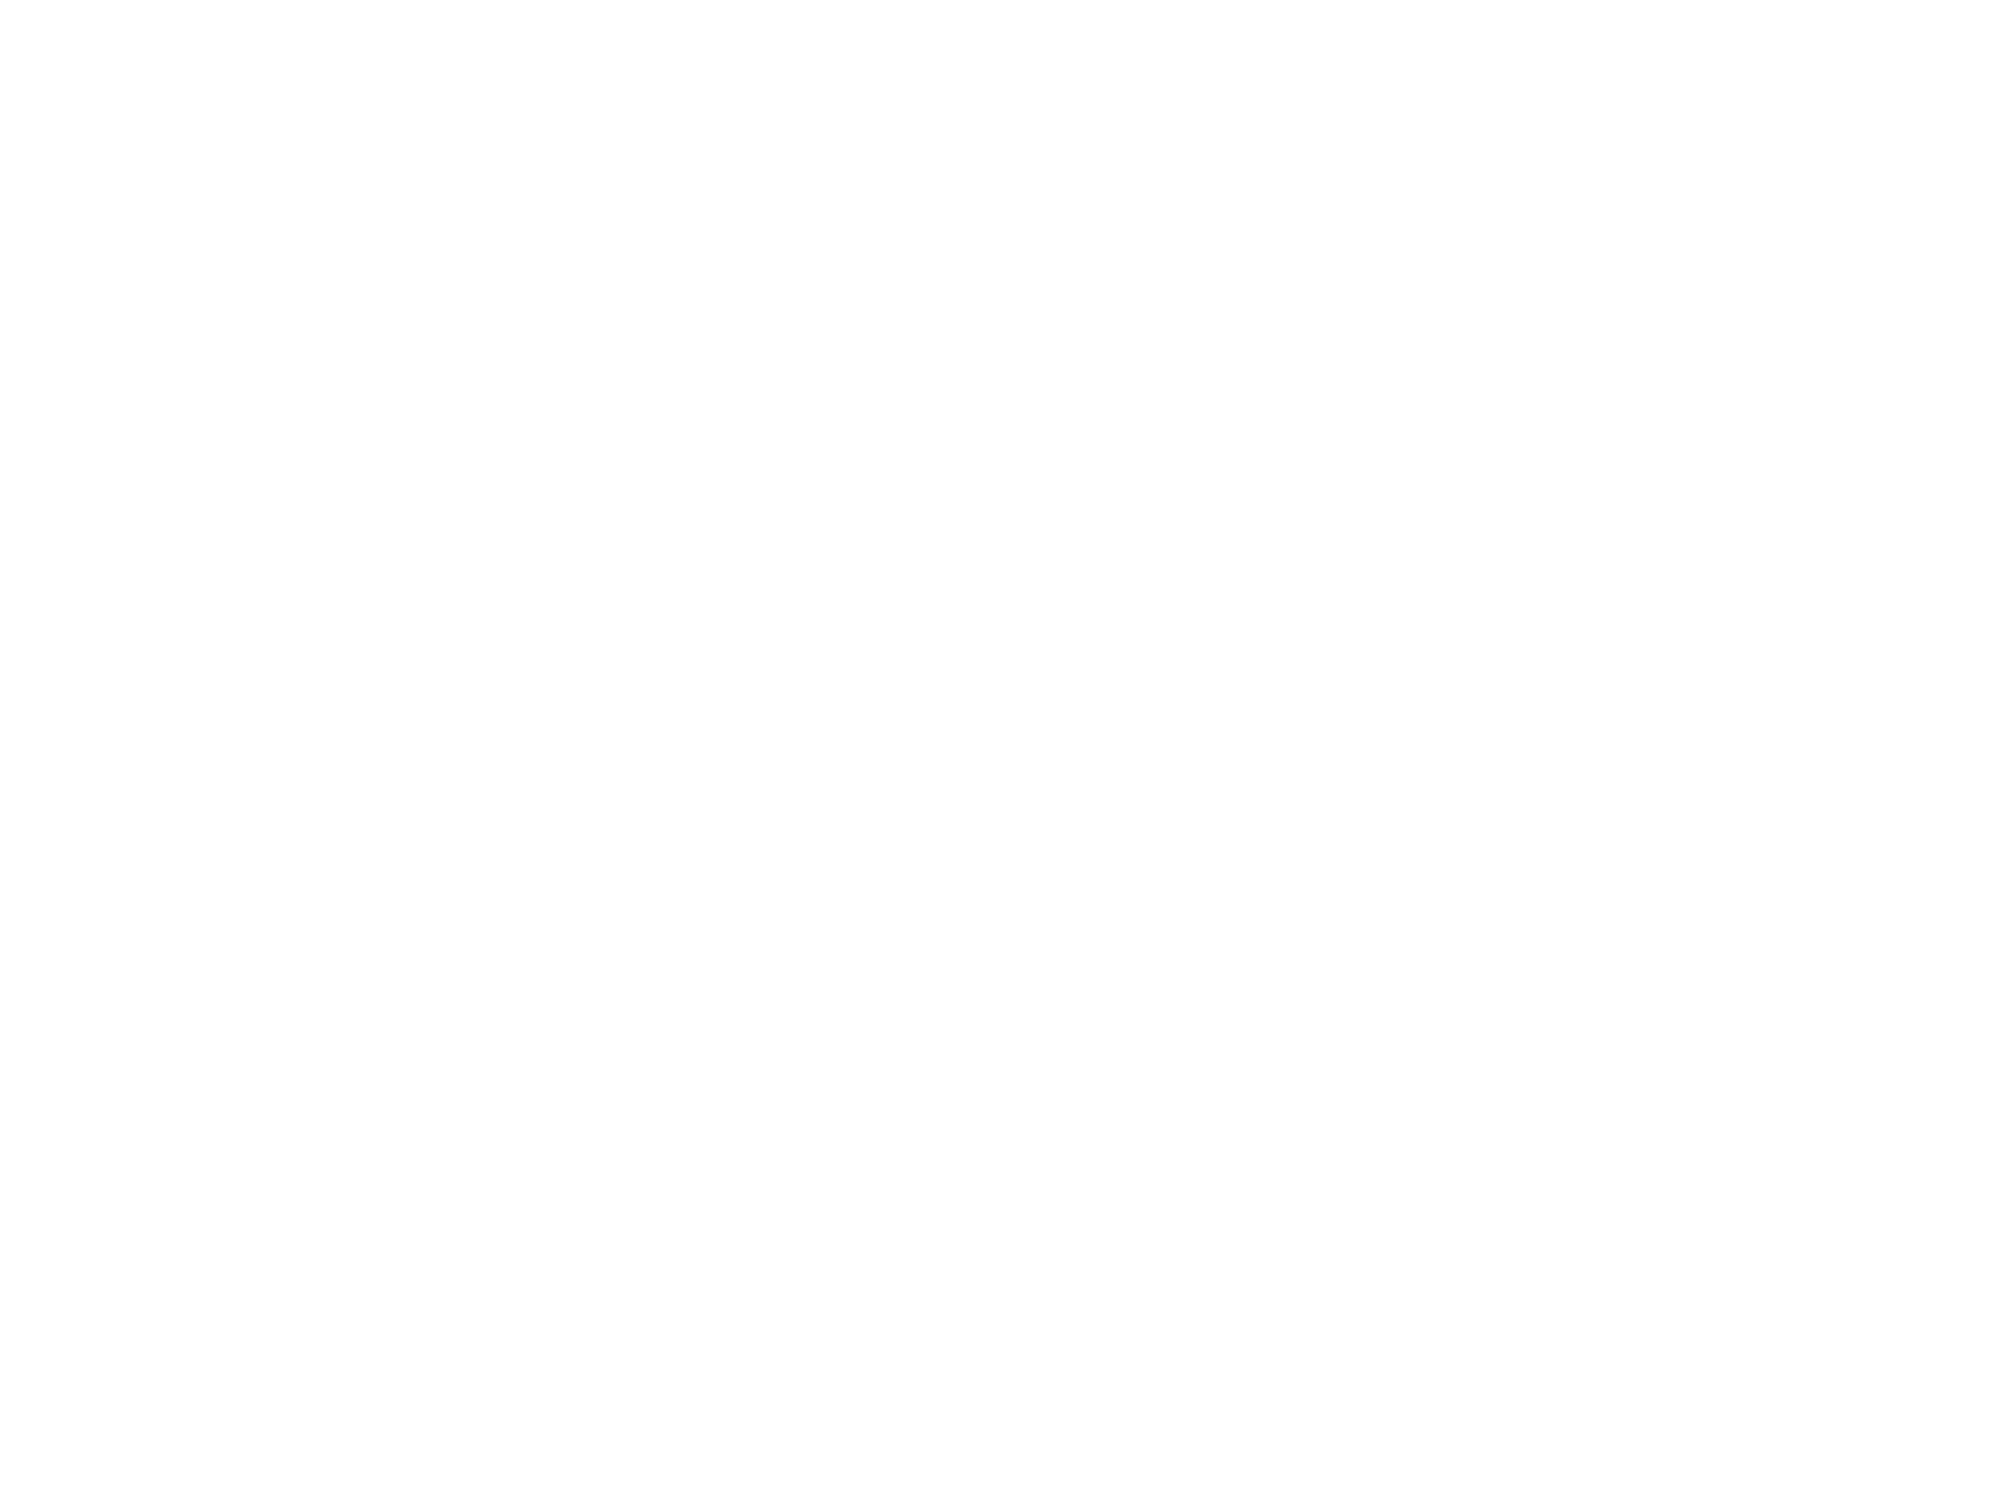

morph-tuning_Lm__JC080_20190506_FOV1_zoom2p0x_traces001_stats-traces001-corrected-dff-nstds-thr-10.00_thr-dff-0.03_196-of-225rois
... [JC080|20190603|FOV1_zoom2p0x] creating blobs object
... getting data paths - name: blobs
... renaming experiment to run name: combined_blobs_static
Getting stimulus info for: combined_blobs_static
... loading ROI stats: nstds
... [combined_blobs_static] Loading roi stats and cell list...
... loading data array
... offset: 573.12
... updating self
filtering responsive cells: nstds
... getting responsive cells (test: nstds, thr: 10.00')
Plotting 167 of 226 responsive cells.
N rois to plot: 167
(13, 13)


<IPython.core.display.Javascript object>


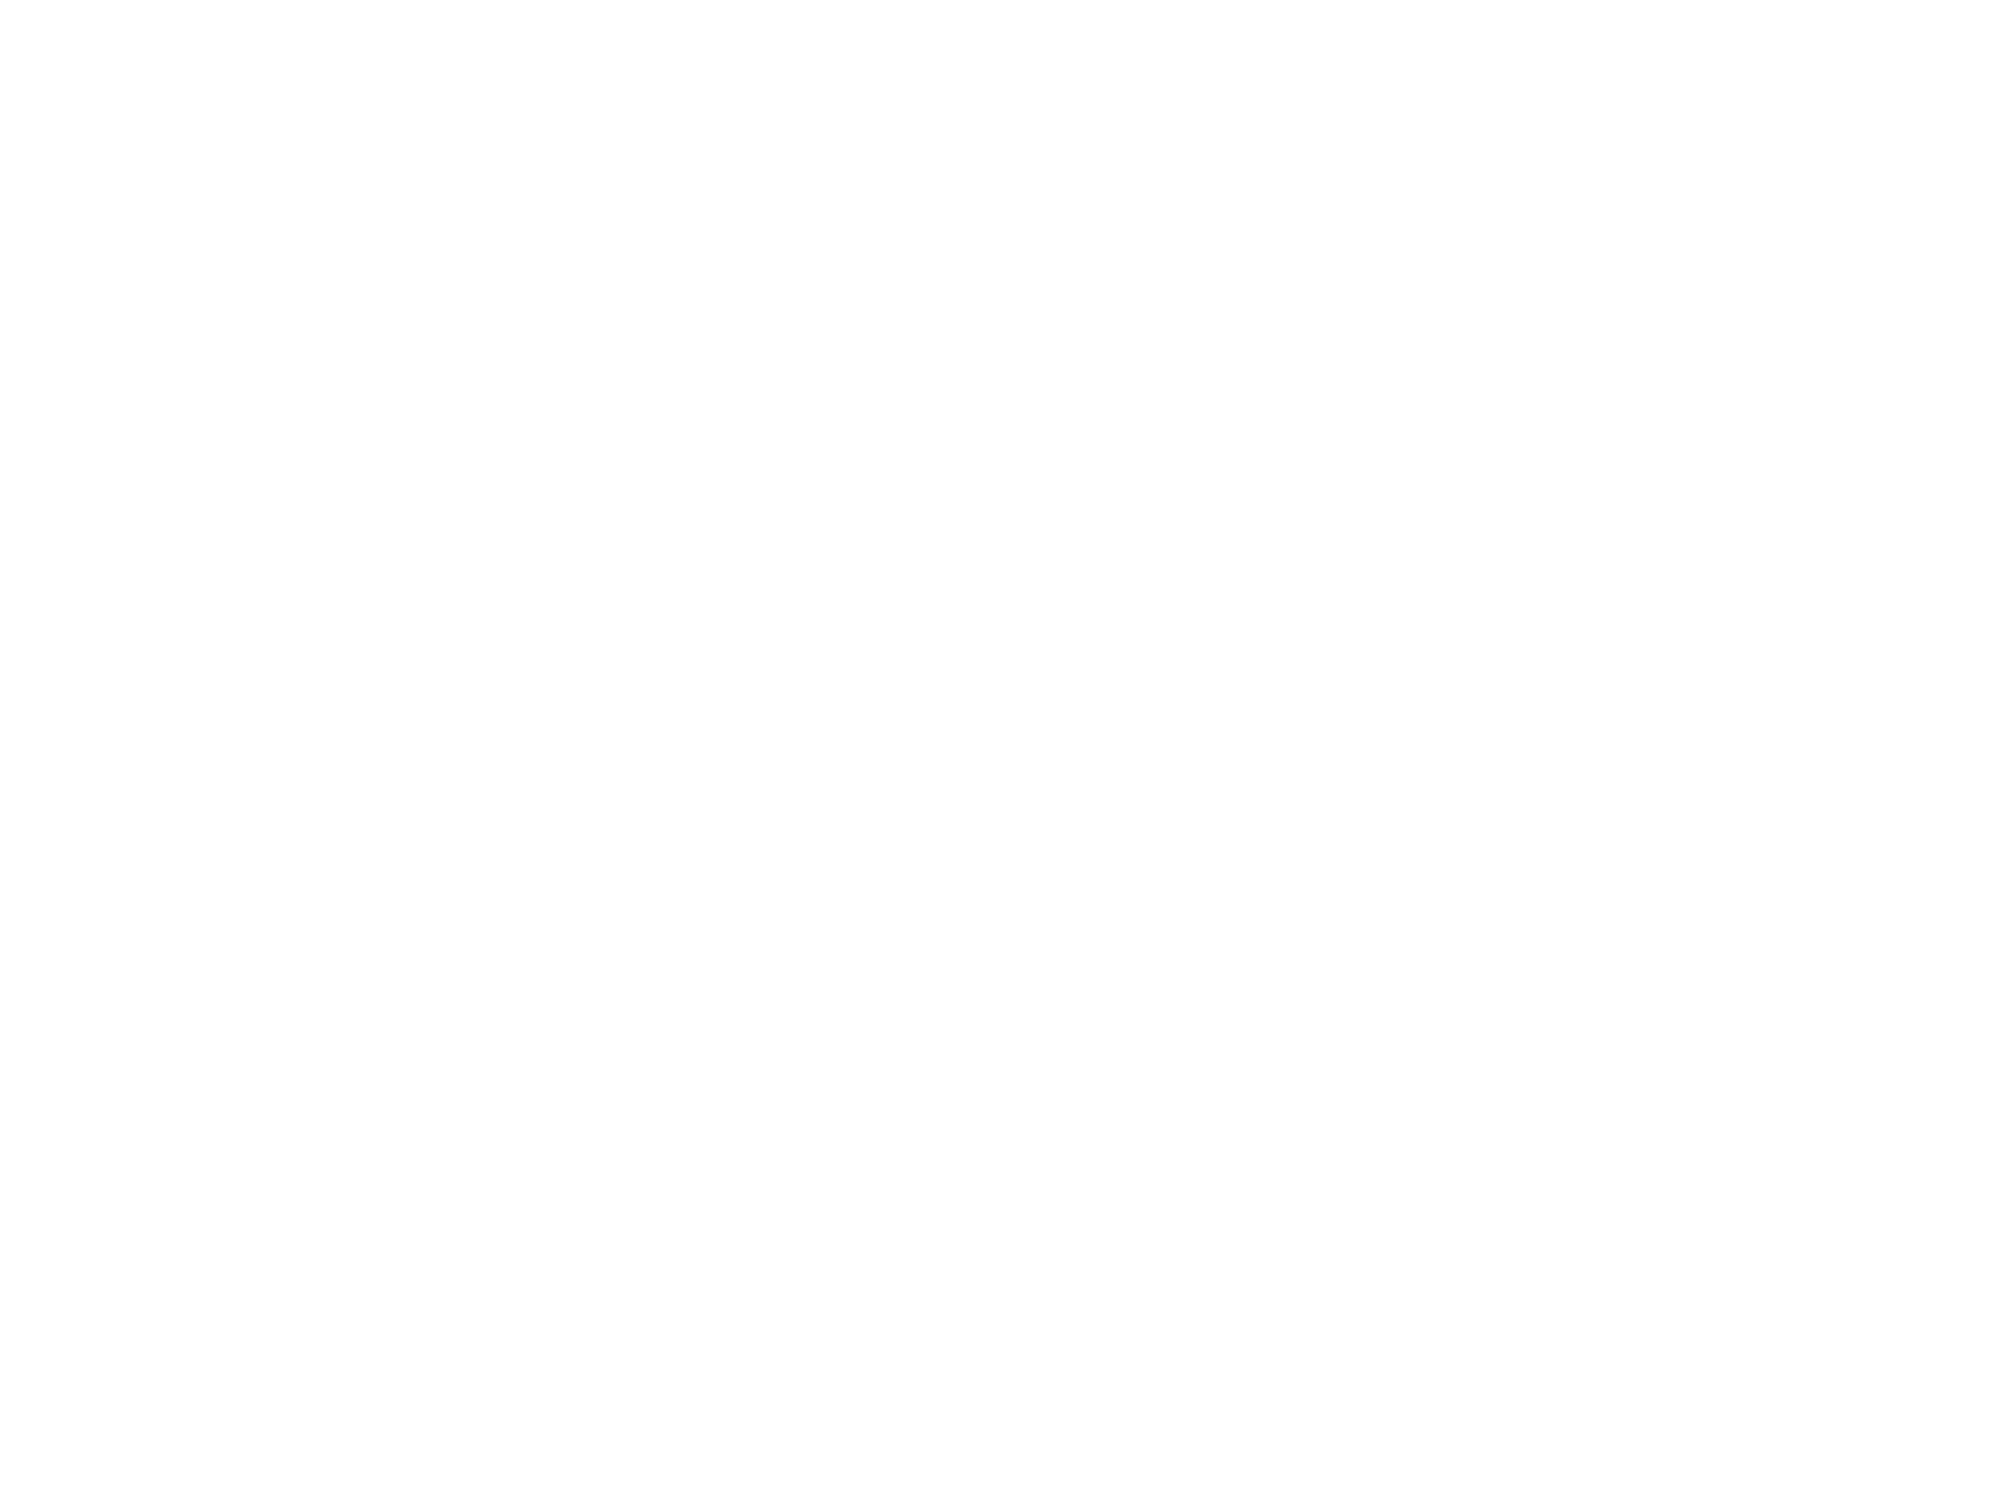

morph-tuning_Lm__JC080_20190603_FOV1_zoom2p0x_traces001_stats-traces001-corrected-dff-nstds-thr-10.00_thr-dff-0.03_167-of-226rois
... [JC083|20190508|FOV1_zoom2p0x] creating blobs object
... getting data paths - name: blobs
... renaming experiment to run name: combined_blobs_static
Getting stimulus info for: combined_blobs_static
... loading ROI stats: nstds
... [combined_blobs_static] Loading roi stats and cell list...
... loading data array
... offset: 516.48
... adjusting for equal reps / condn...
... updating self
filtering responsive cells: nstds
... getting responsive cells (test: nstds, thr: 10.00')
Plotting 129 of 171 responsive cells.
N rois to plot: 129
(11, 12)


<IPython.core.display.Javascript object>


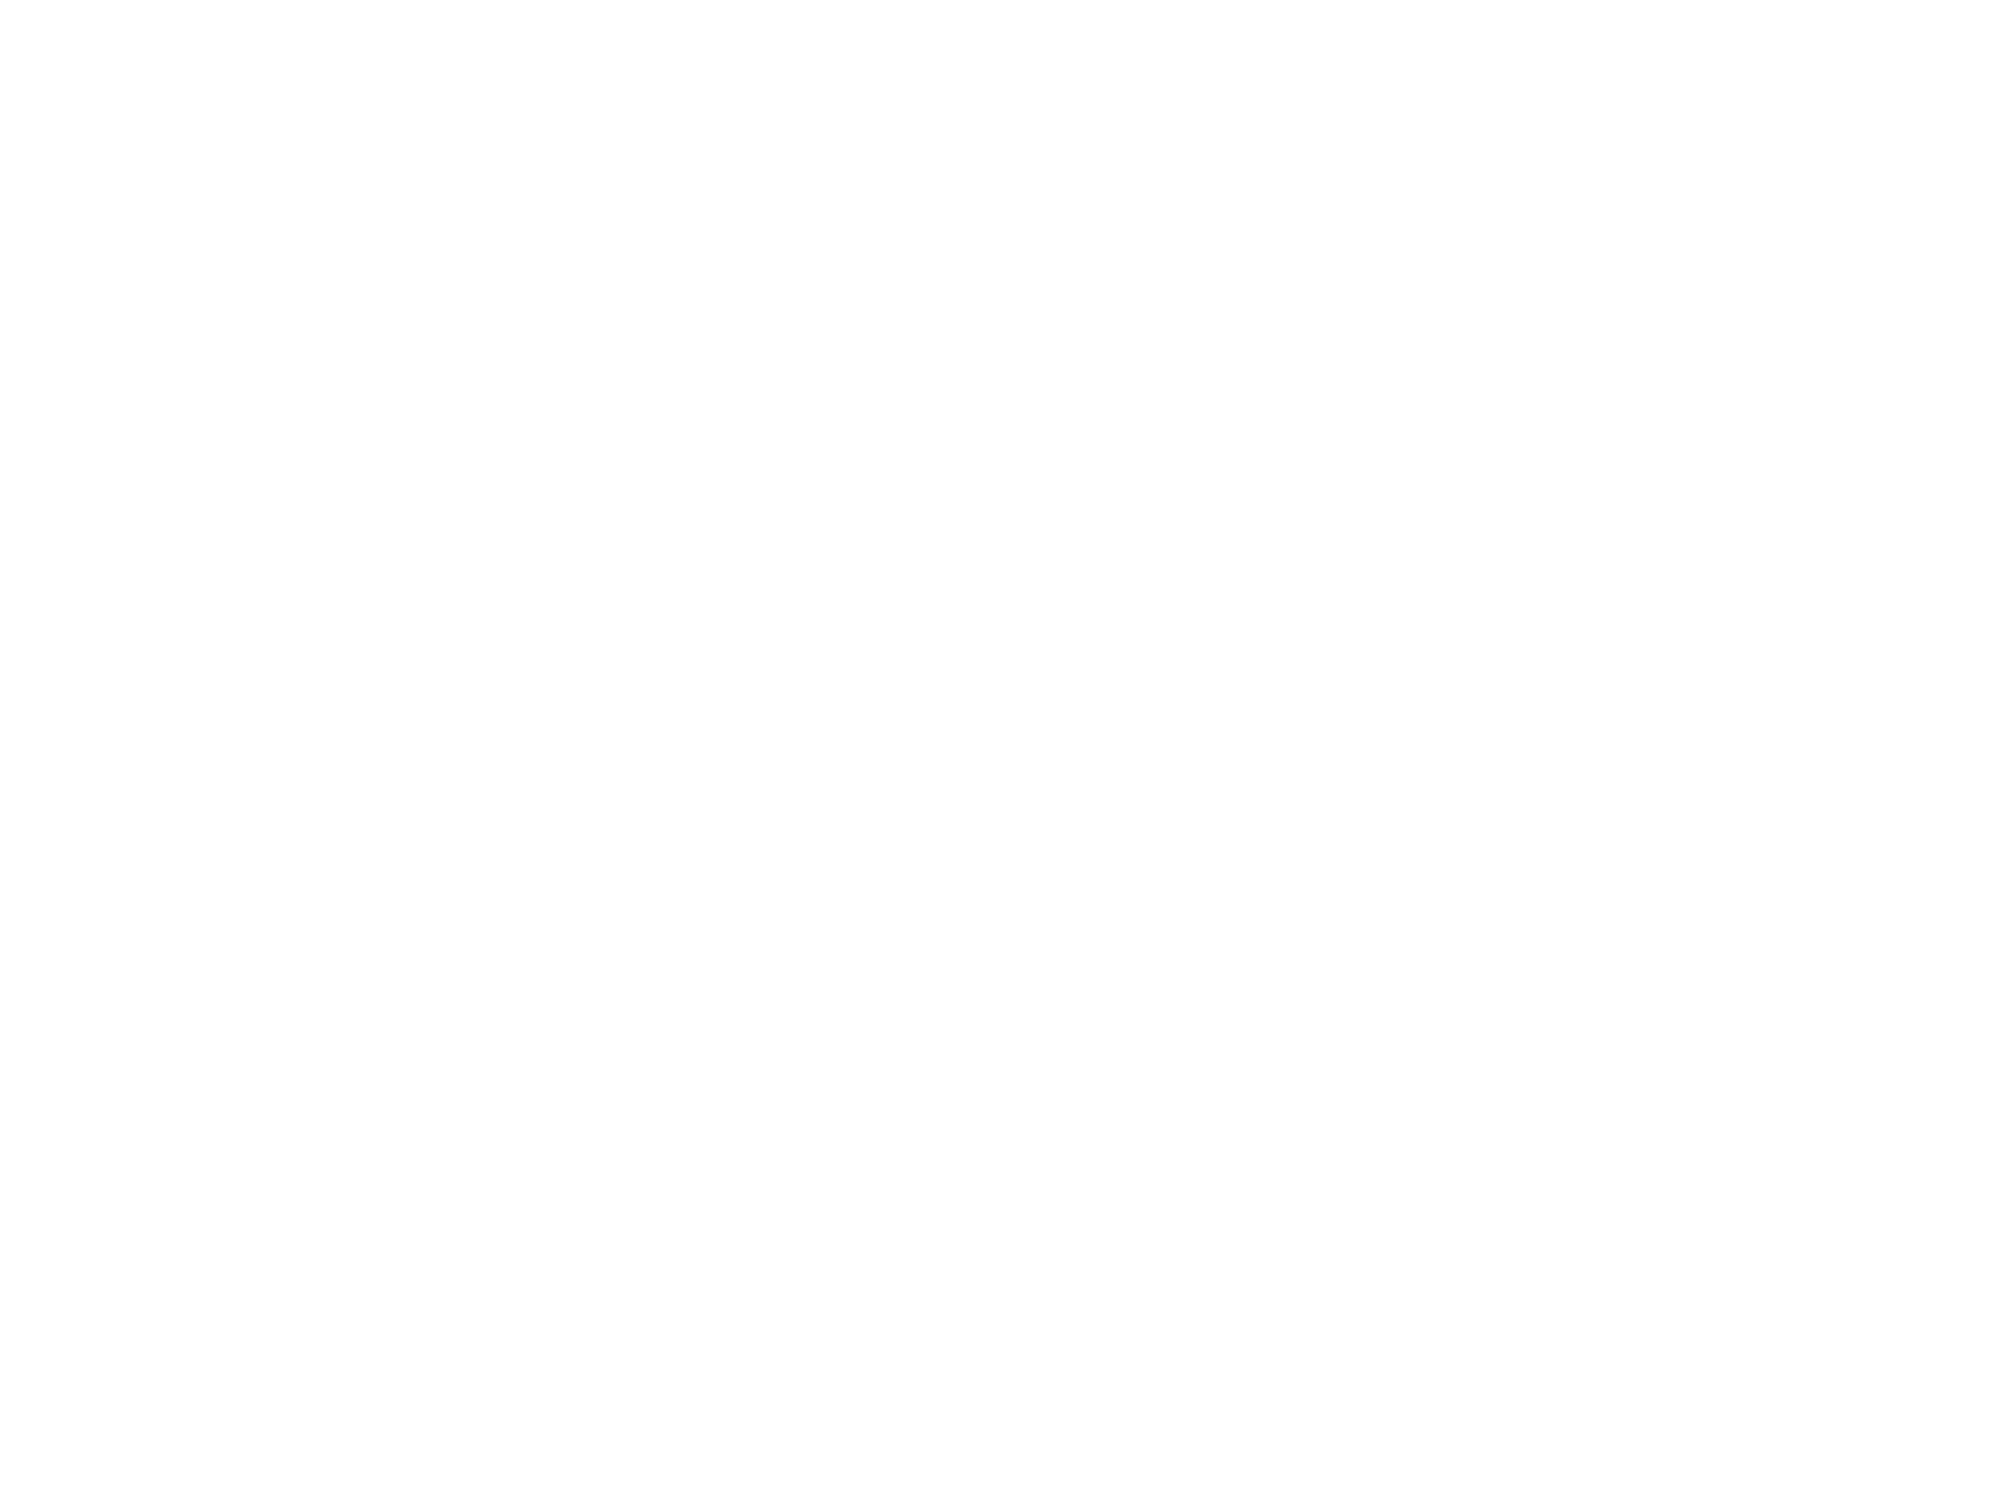

morph-tuning_Lm__JC083_20190508_FOV1_zoom2p0x_traces001_stats-traces001-corrected-dff-nstds-thr-10.00_thr-dff-0.03_129-of-171rois
... [JC083|20190512|FOV1_zoom2p0x] creating blobs object
... getting data paths - name: blobs
... renaming experiment to run name: combined_blobs_static
Getting stimulus info for: combined_blobs_static
... loading ROI stats: nstds
... [combined_blobs_static] Loading roi stats and cell list...
... loading data array
... offset: 582.17
... adjusting for equal reps / condn...
... updating self
filtering responsive cells: nstds
... getting responsive cells (test: nstds, thr: 10.00')
Plotting 142 of 266 responsive cells.
N rois to plot: 142
(12, 12)


<IPython.core.display.Javascript object>


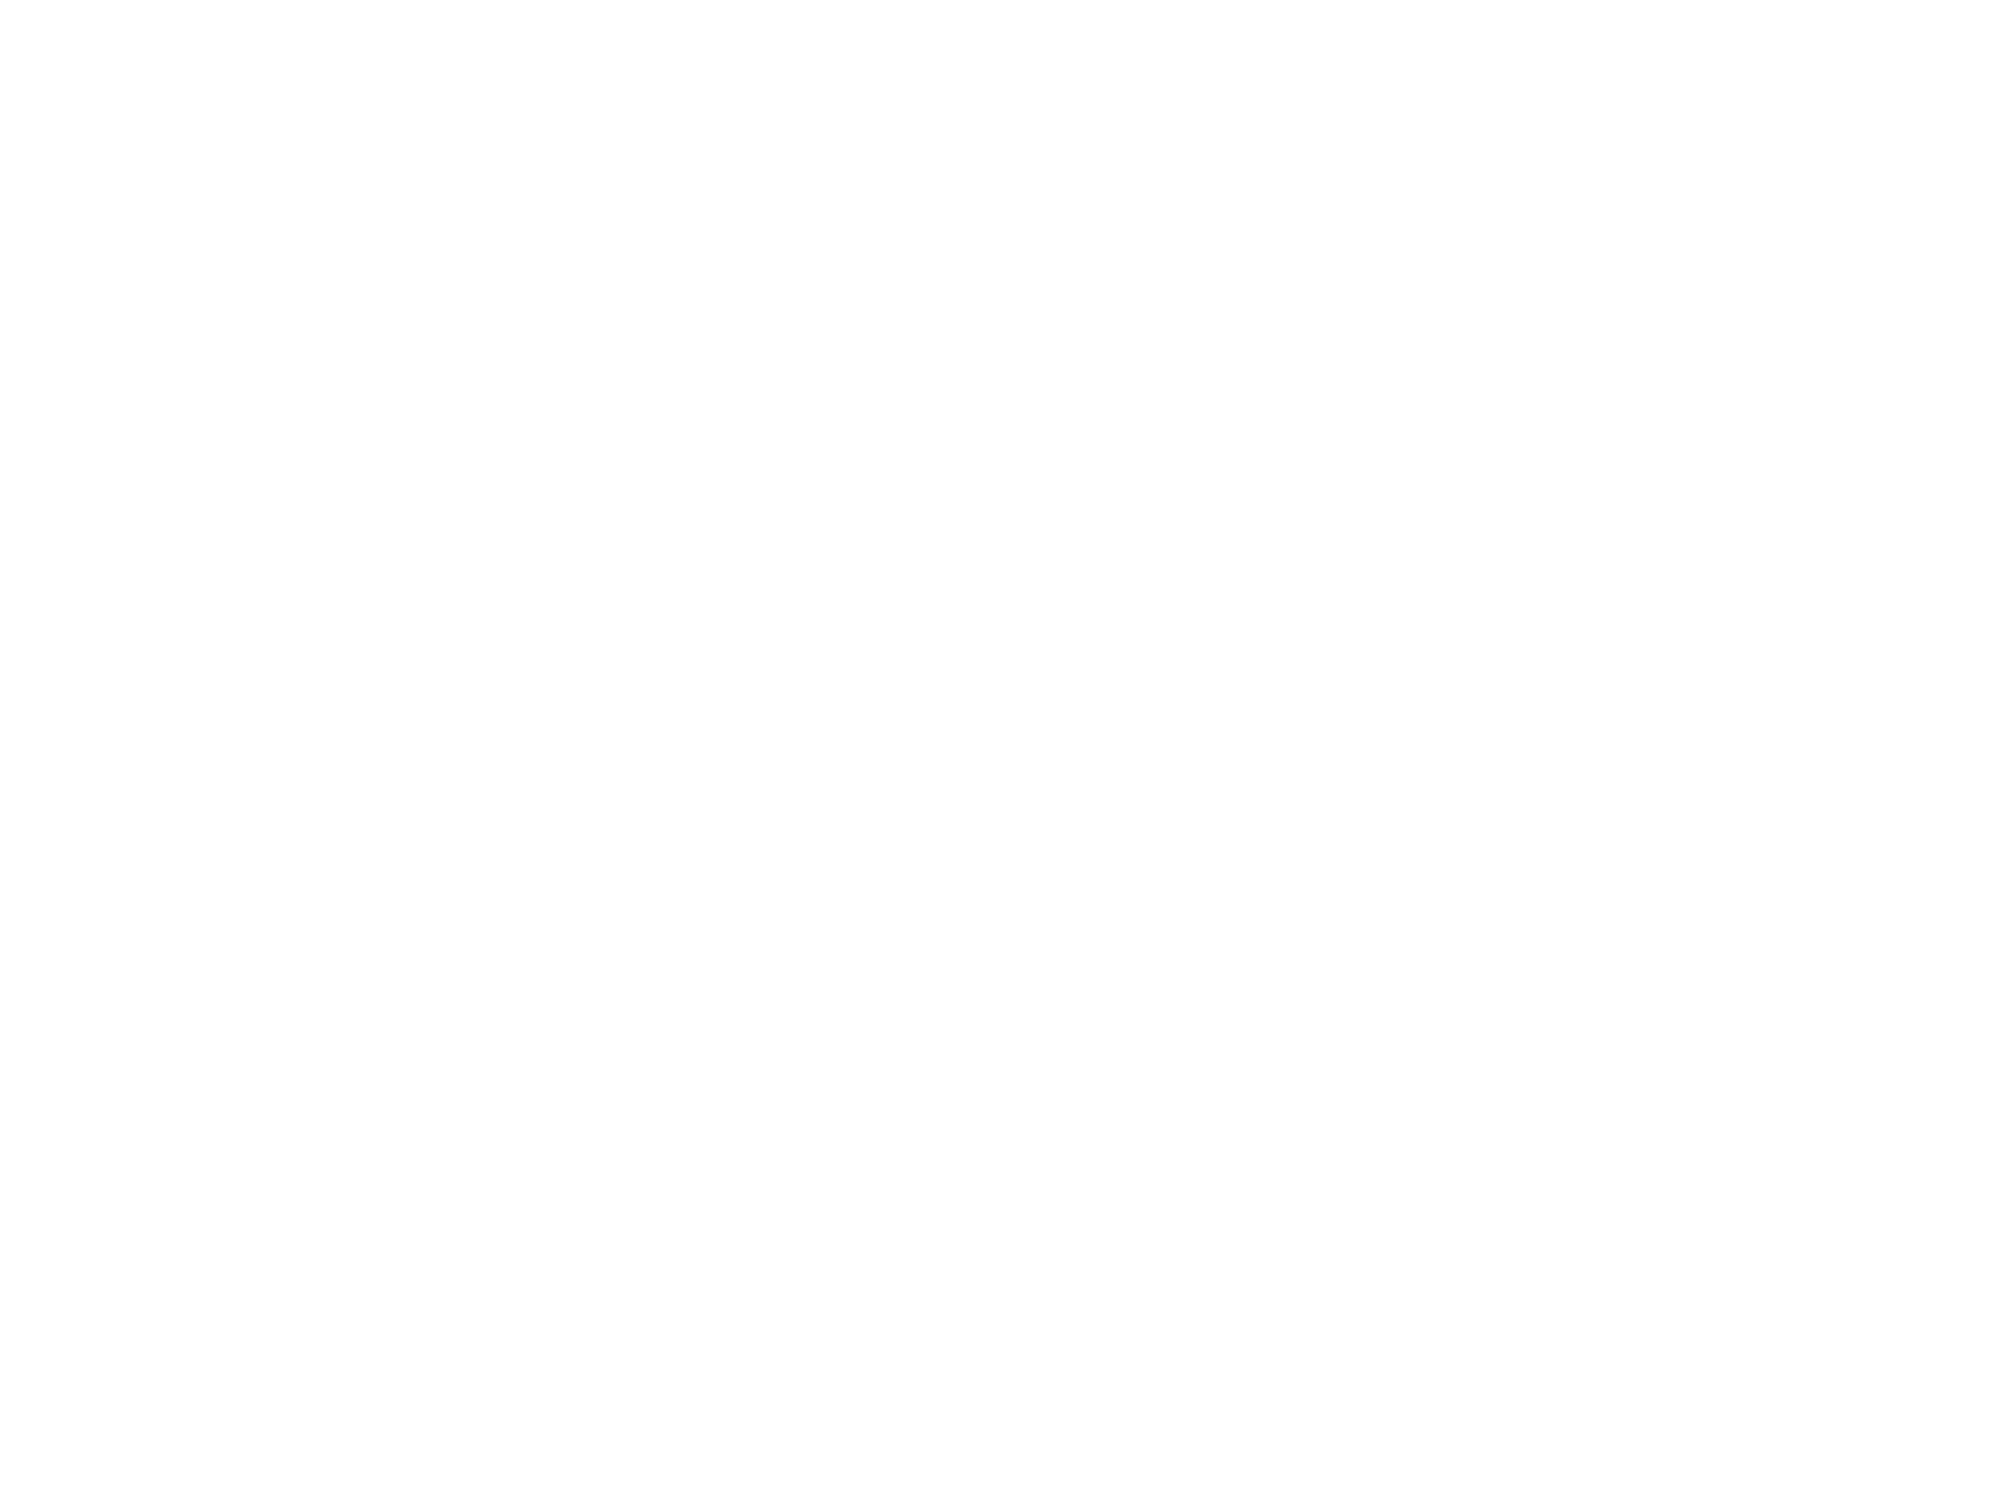

morph-tuning_Lm__JC083_20190512_FOV1_zoom2p0x_traces001_stats-traces001-corrected-dff-nstds-thr-10.00_thr-dff-0.03_142-of-266rois
... [JC083|20190517|FOV1_zoom2p0x] creating blobs object
... getting data paths - name: blobs
... renaming experiment to run name: combined_blobs_static
Getting stimulus info for: combined_blobs_static
... loading ROI stats: nstds
... [combined_blobs_static] Loading roi stats and cell list...
... loading data array
... offset: 501.39
... updating self
filtering responsive cells: nstds
... getting responsive cells (test: nstds, thr: 10.00')
Plotting 111 of 133 responsive cells.
N rois to plot: 111
(11, 11)


<IPython.core.display.Javascript object>


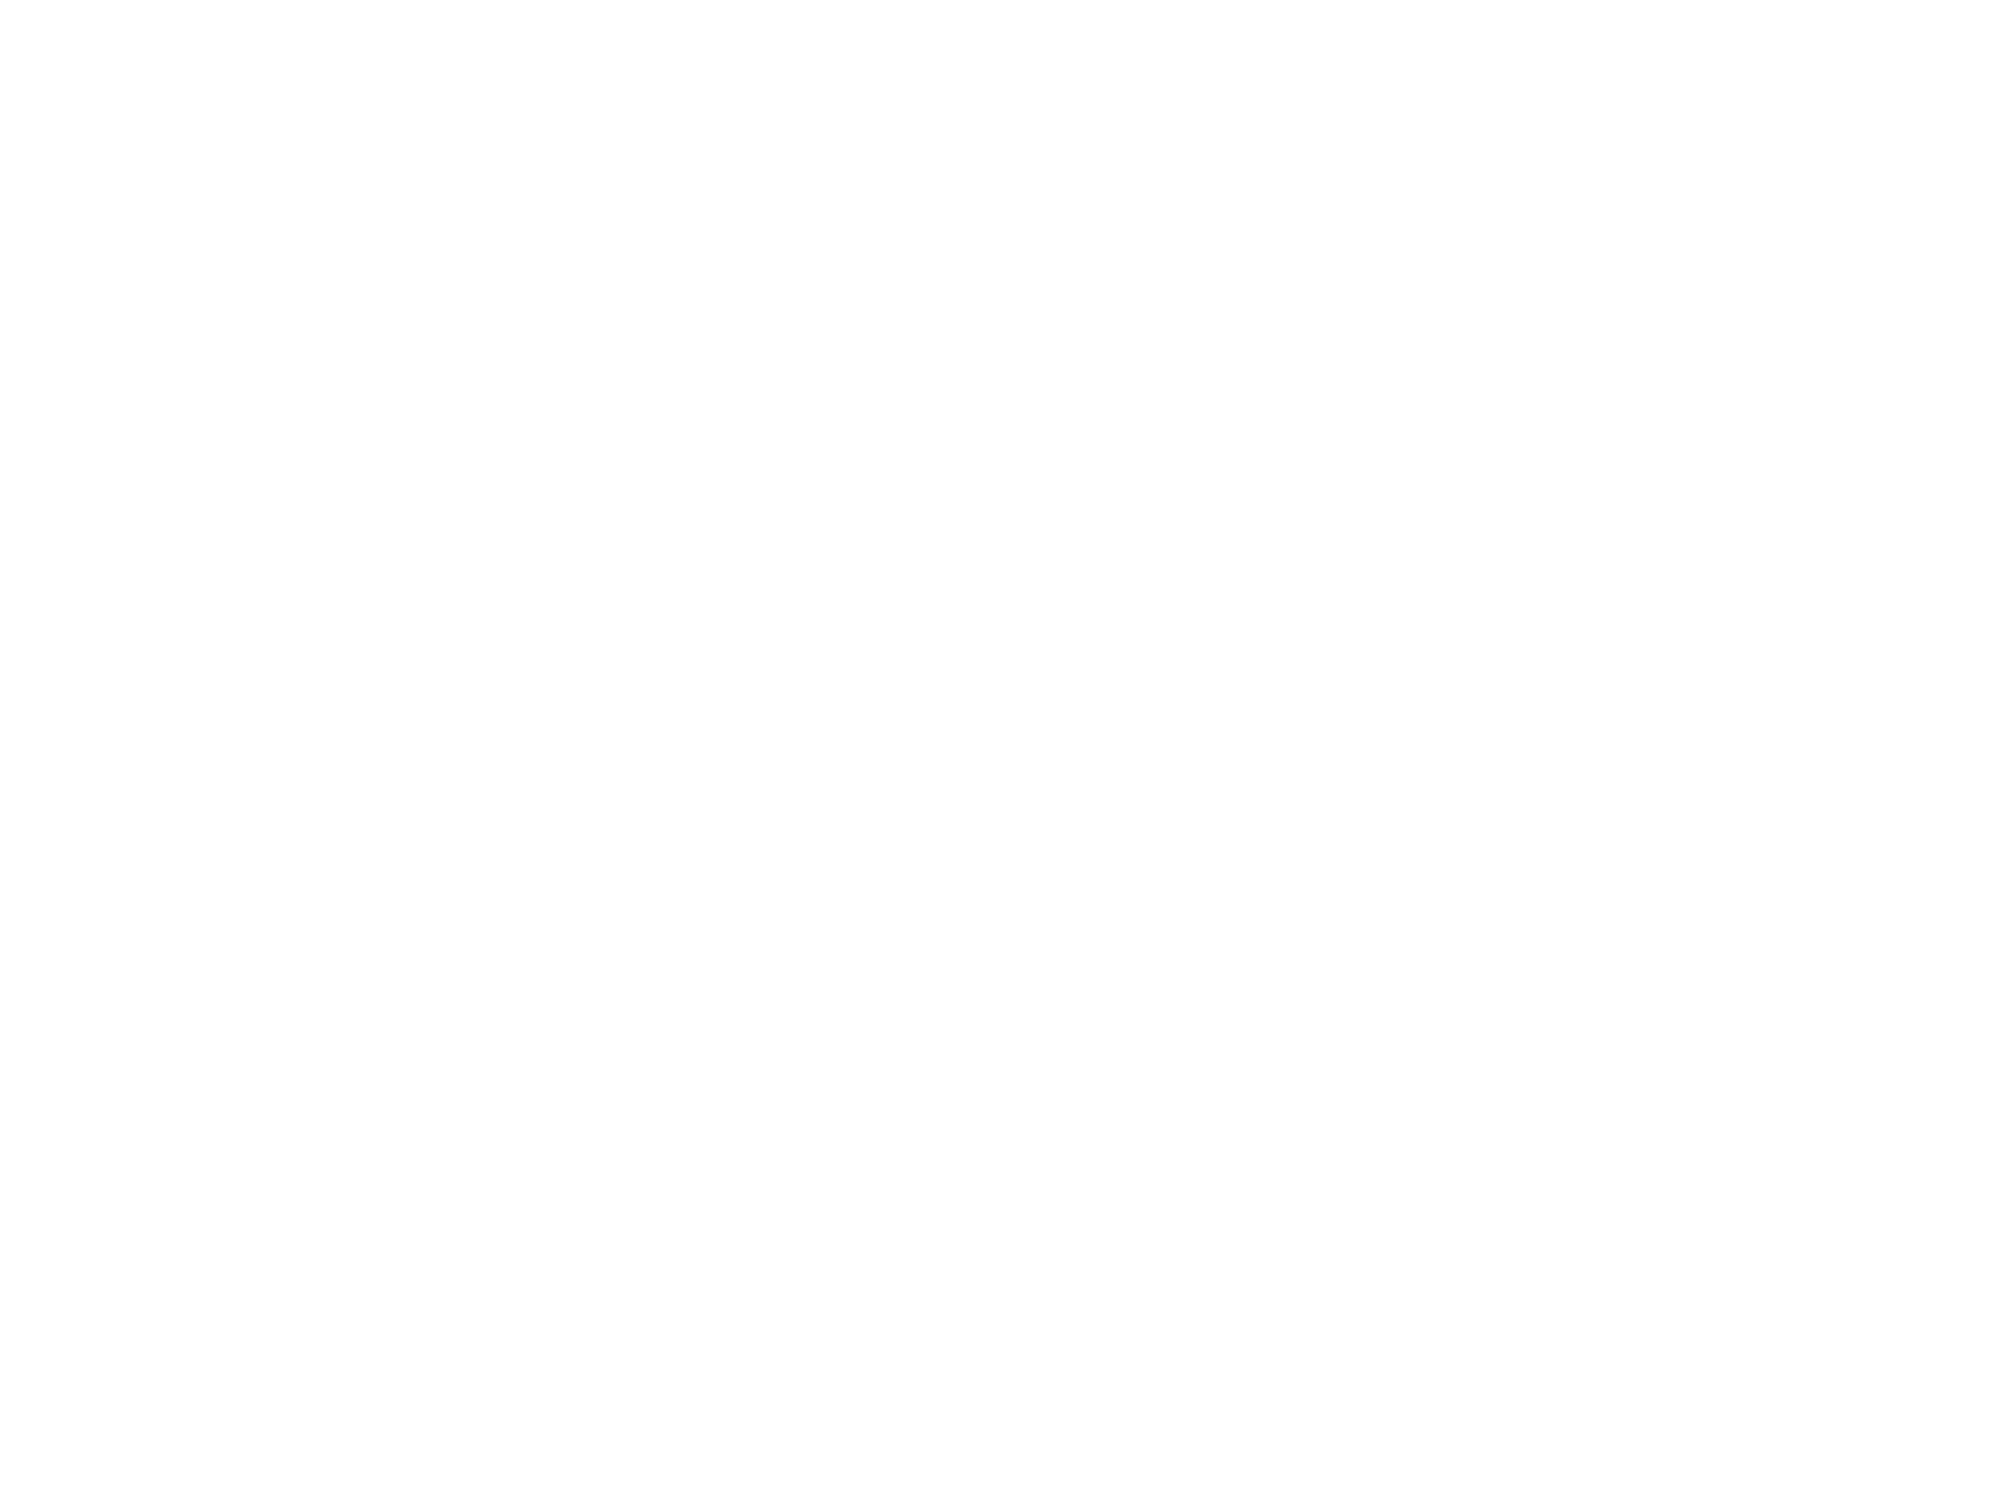

morph-tuning_Lm__JC083_20190517_FOV1_zoom2p0x_traces001_stats-traces001-corrected-dff-nstds-thr-10.00_thr-dff-0.03_111-of-133rois
... [JC084|20190525|FOV1_zoom2p0x] creating blobs object
... getting data paths - name: blobs
... renaming experiment to run name: combined_blobs_static
Getting stimulus info for: combined_blobs_static
... loading ROI stats: nstds
... [combined_blobs_static] Loading roi stats and cell list...
... loading data array
... offset: 289.08
... updating self
filtering responsive cells: nstds
... getting responsive cells (test: nstds, thr: 10.00')
Plotting 143 of 160 responsive cells.
N rois to plot: 143
(12, 12)


<IPython.core.display.Javascript object>


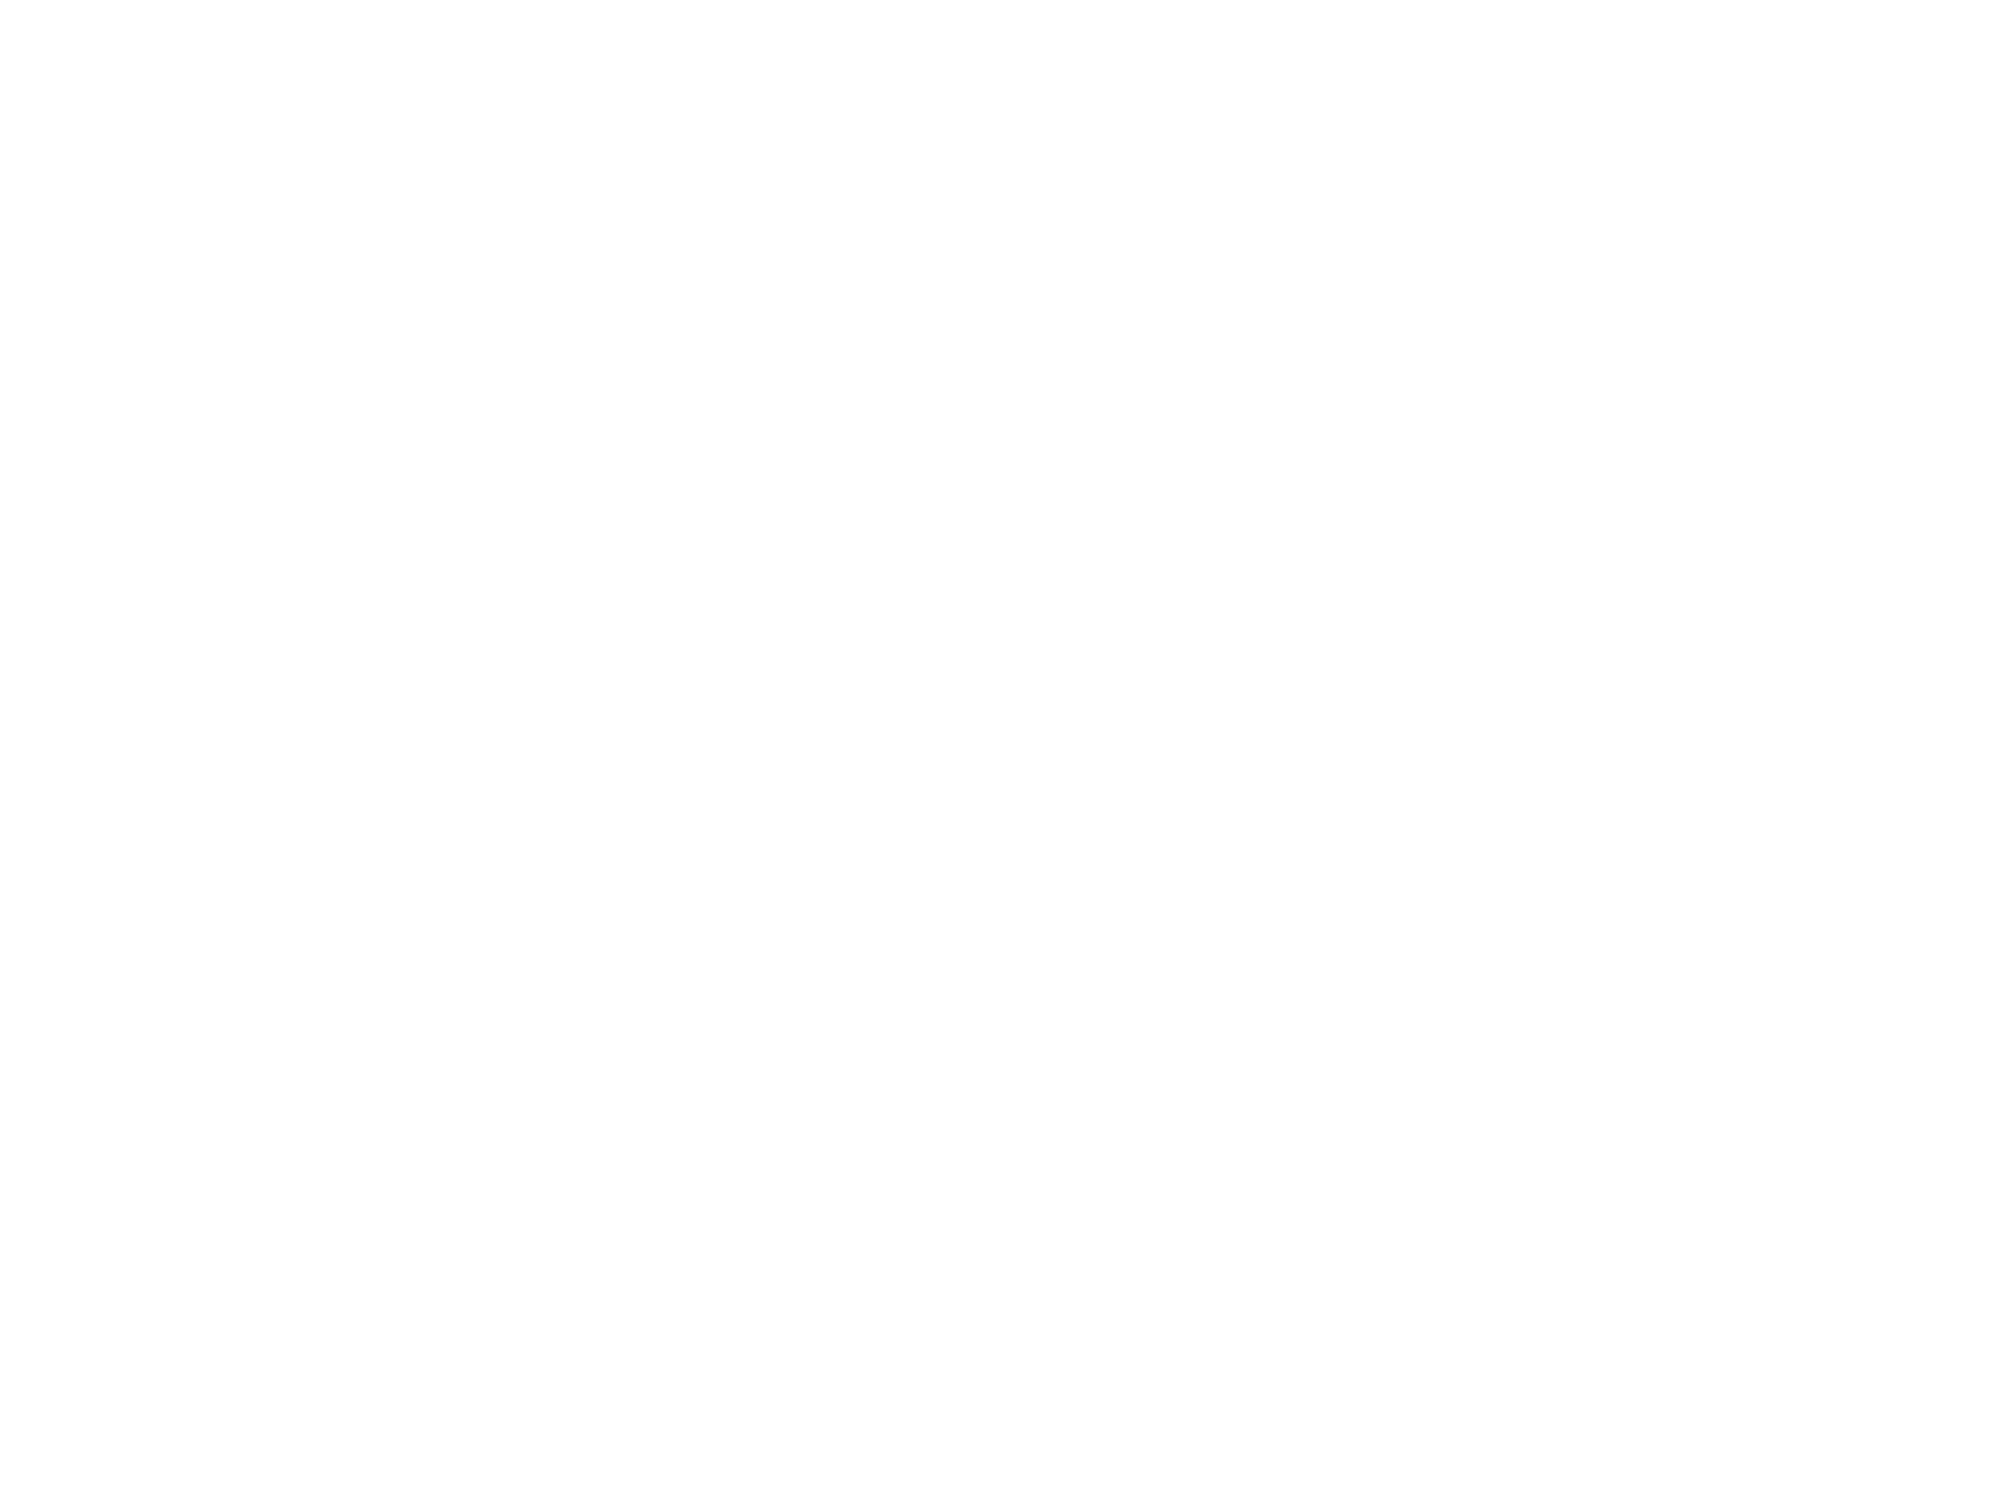

morph-tuning_Lm__JC084_20190525_FOV1_zoom2p0x_traces001_stats-traces001-corrected-dff-nstds-thr-10.00_thr-dff-0.03_143-of-160rois
... [JC091|20190627|FOV1_zoom2p0x] creating blobs object
... getting data paths - name: blobs
... renaming experiment to run name: combined_blobs_static
Getting stimulus info for: combined_blobs_static
... loading ROI stats: nstds
... [combined_blobs_static] Loading roi stats and cell list...
... loading data array
... offset: 363.42
... updating self
filtering responsive cells: nstds
... getting responsive cells (test: nstds, thr: 10.00')
Plotting 155 of 170 responsive cells.
N rois to plot: 155
(12, 13)


<IPython.core.display.Javascript object>


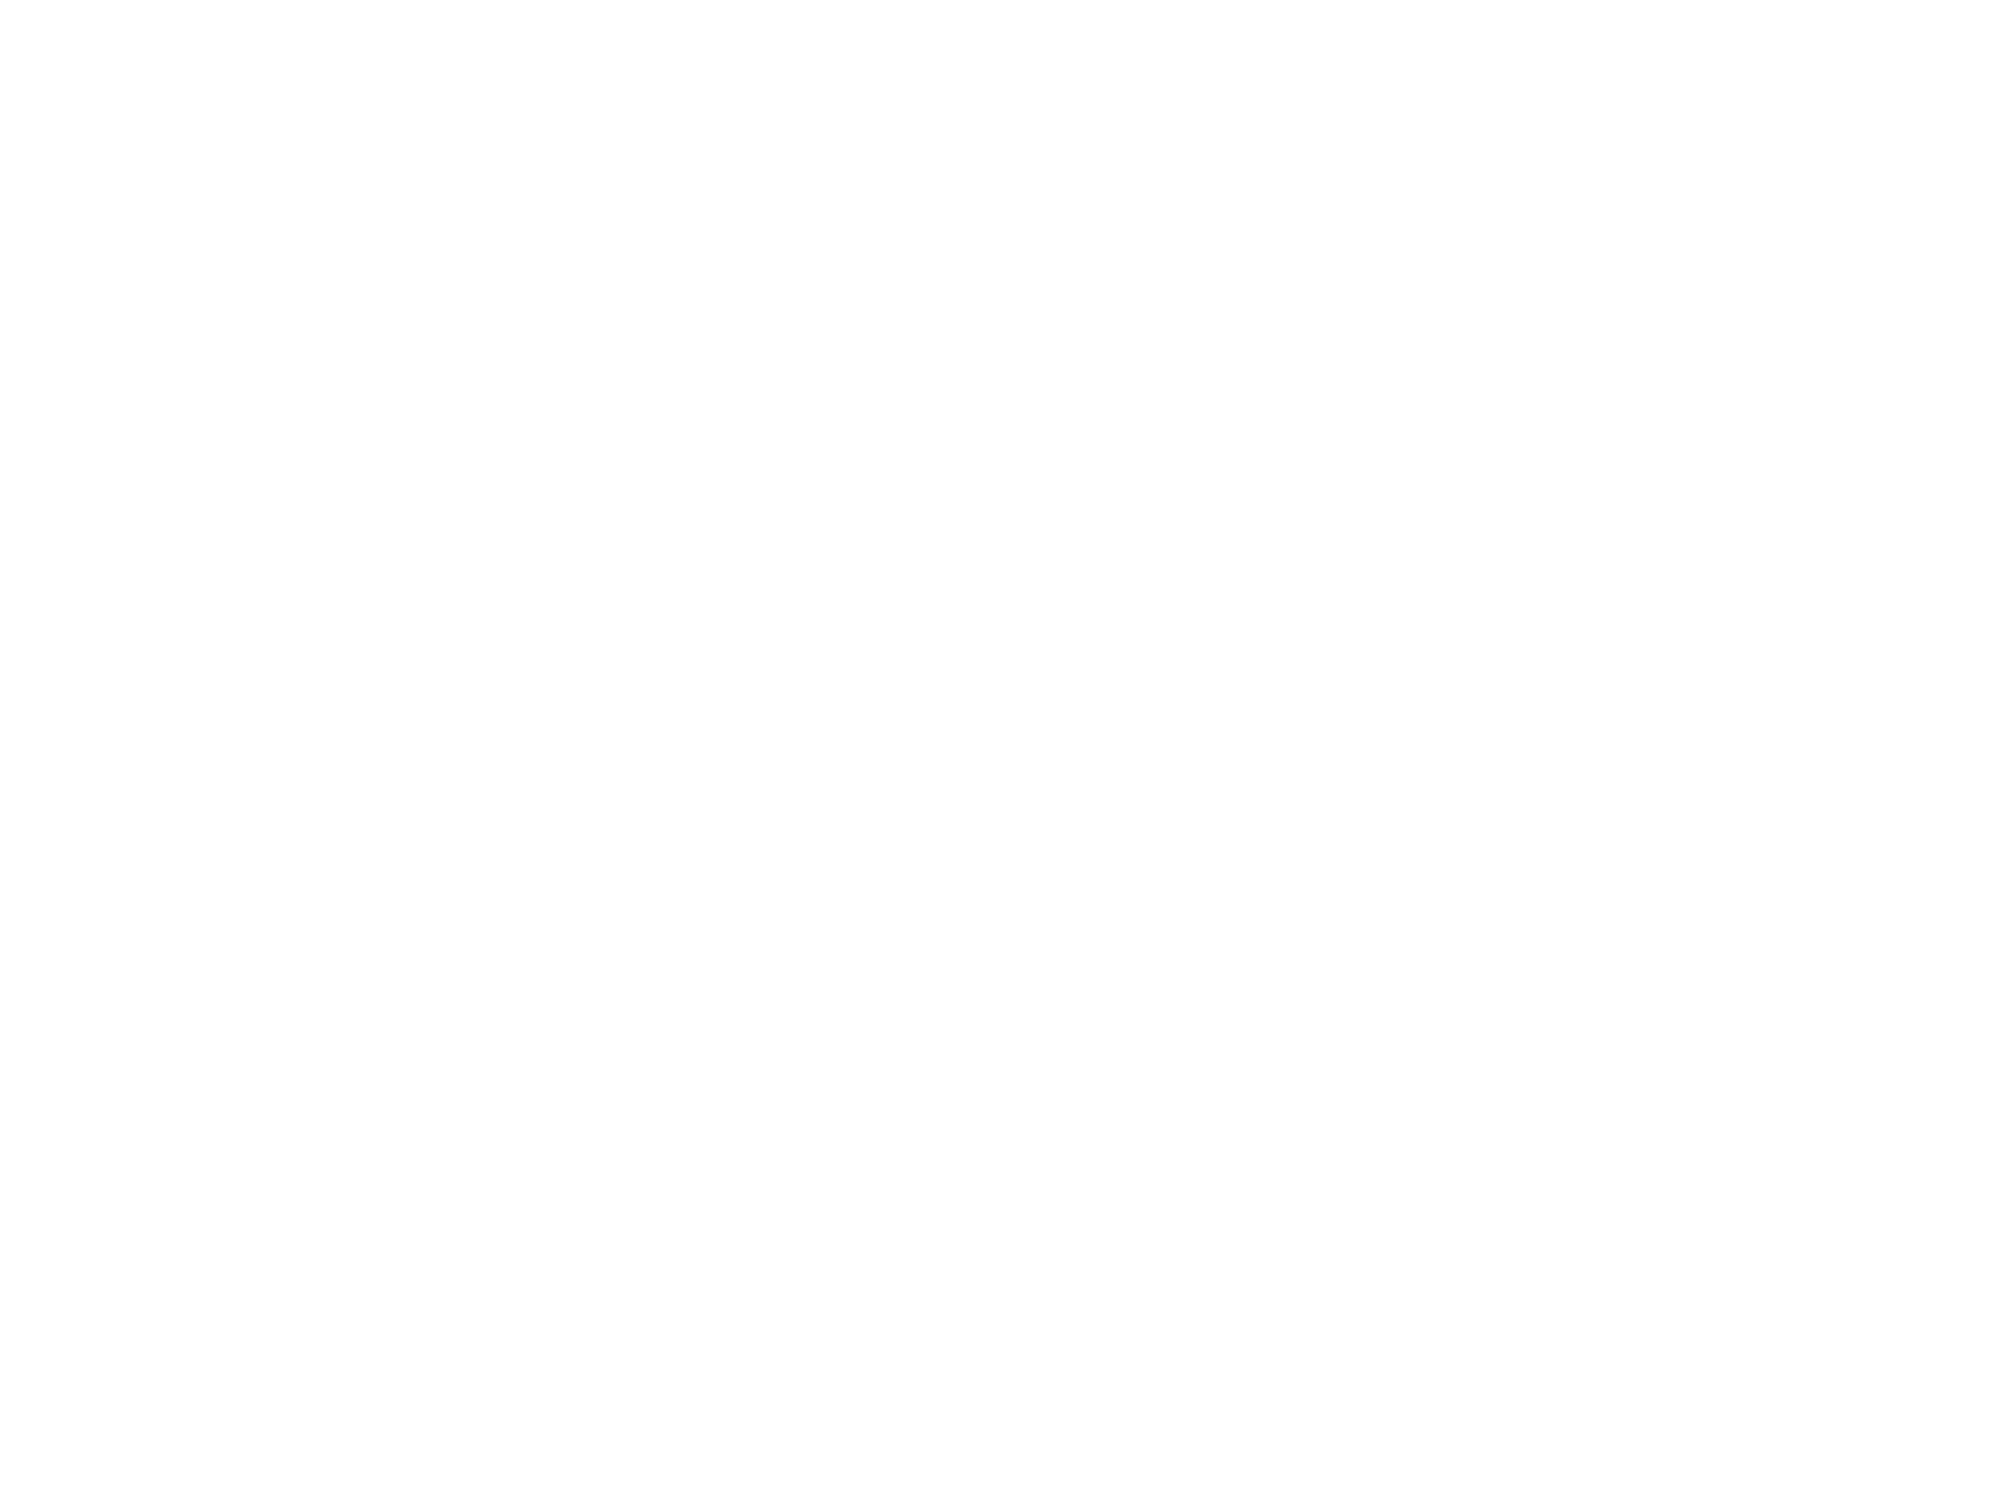

morph-tuning_Lm__JC091_20190627_FOV1_zoom2p0x_traces001_stats-traces001-corrected-dff-nstds-thr-10.00_thr-dff-0.03_155-of-170rois
... [JC076|20190420|FOV1_zoom2p0x] creating blobs object
... getting data paths - name: blobs
... renaming experiment to run name: combined_blobs_static
Getting stimulus info for: combined_blobs_static
... loading ROI stats: nstds
... [combined_blobs_static] Loading roi stats and cell list...
... loading data array
... offset: 253.29
... updating self
filtering responsive cells: nstds
... getting responsive cells (test: nstds, thr: 10.00')
Plotting 138 of 175 responsive cells.
N rois to plot: 138
(12, 12)


<IPython.core.display.Javascript object>


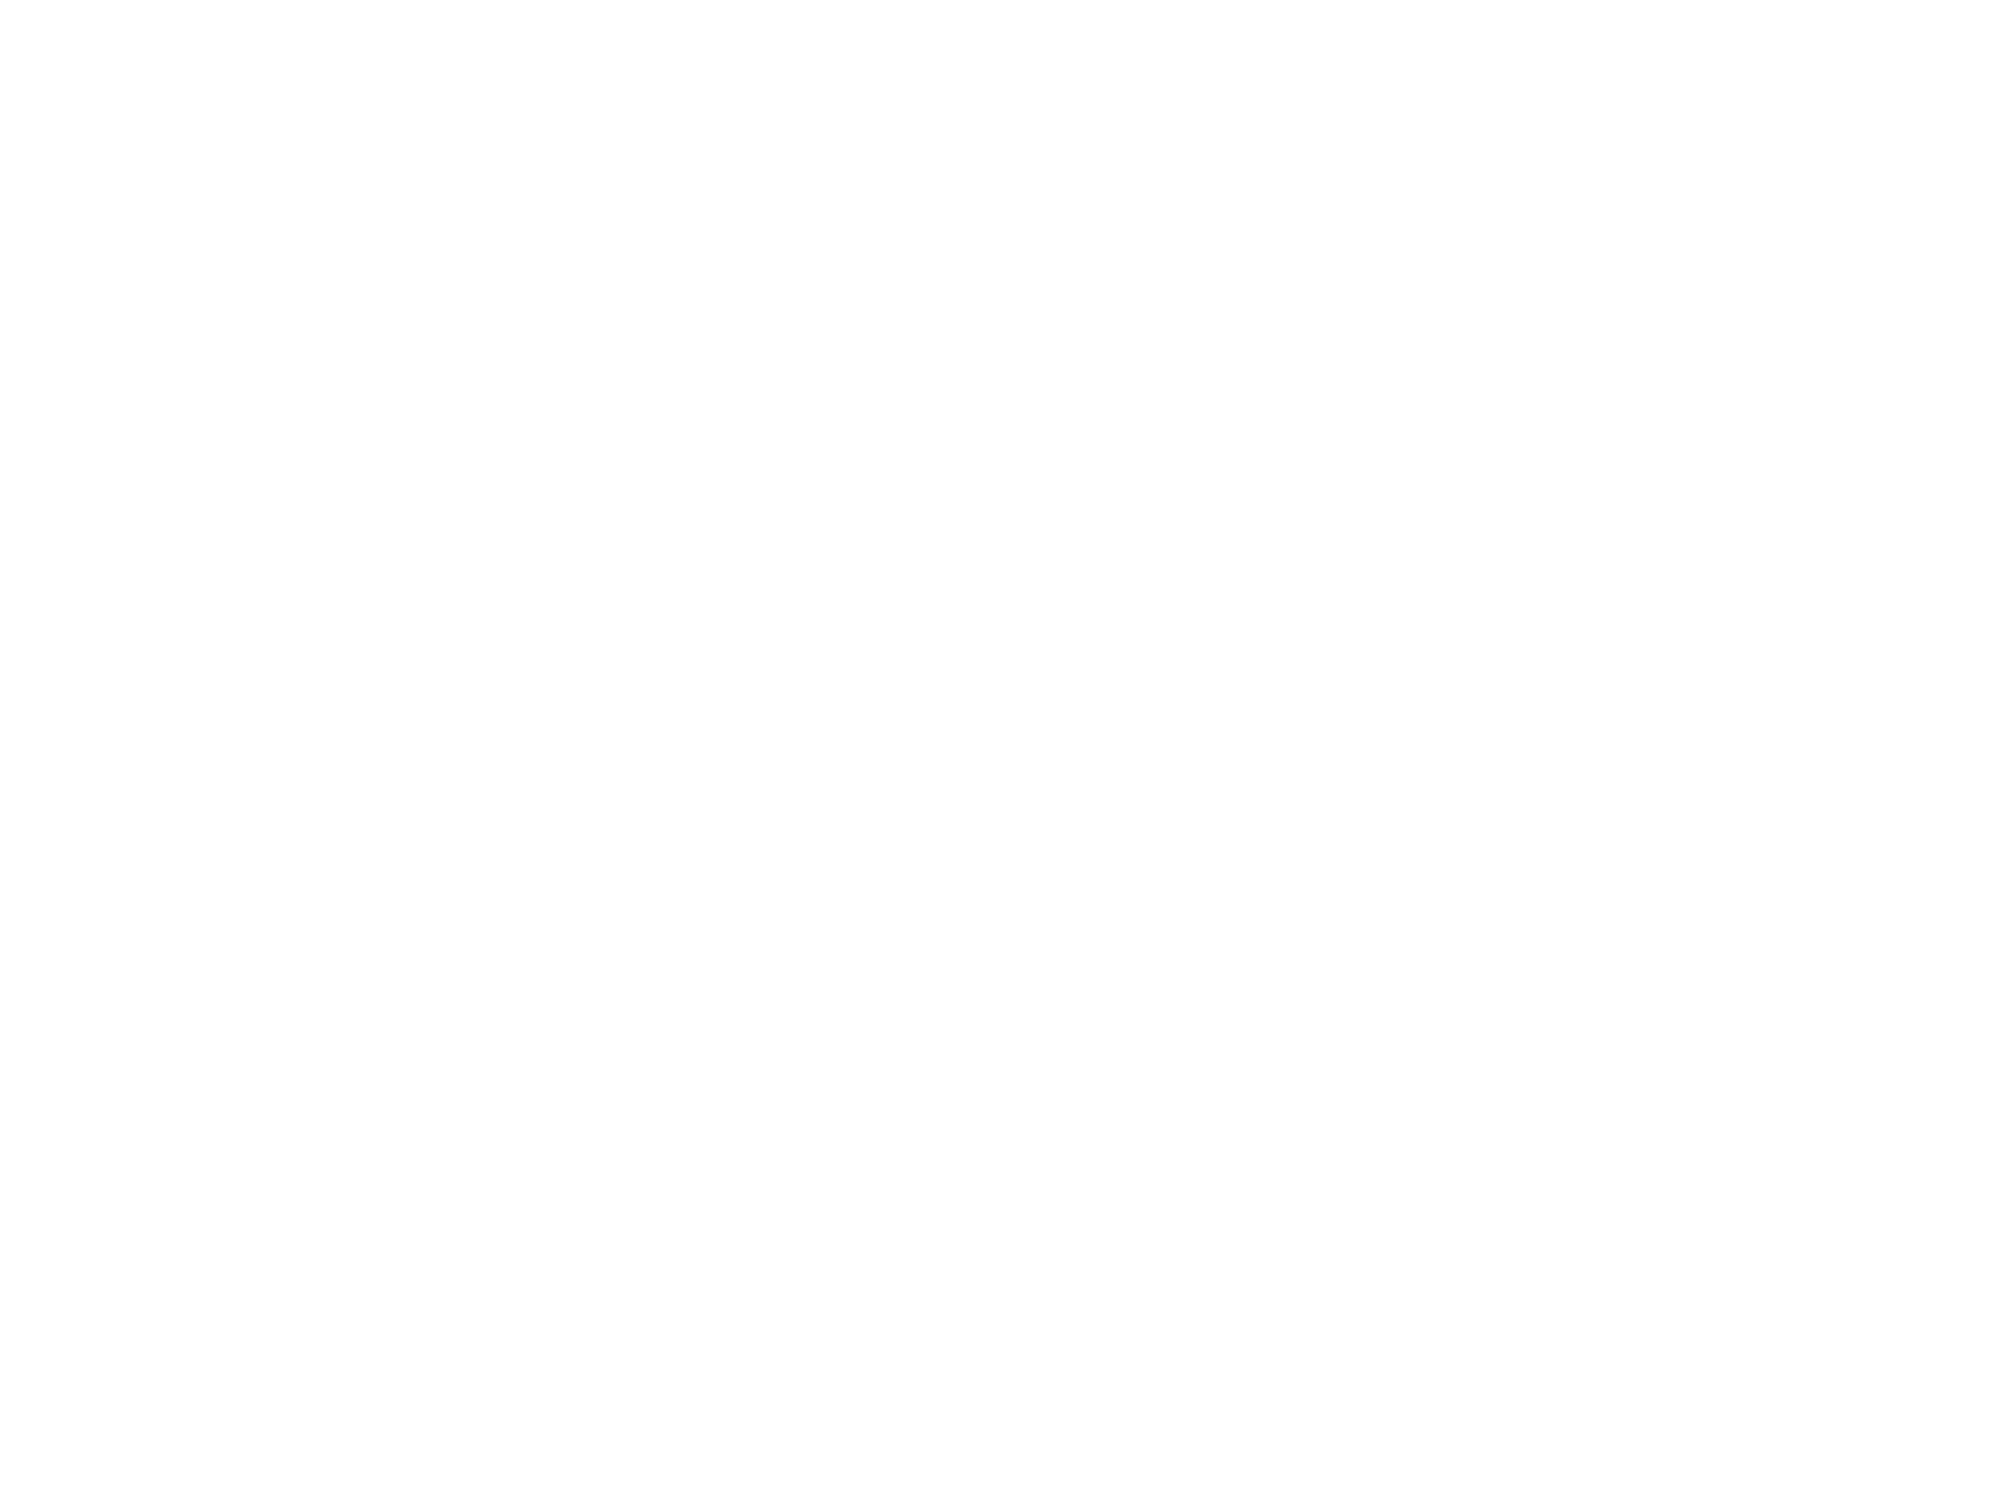

morph-tuning_V1__JC076_20190420_FOV1_zoom2p0x_traces001_stats-traces001-corrected-dff-nstds-thr-10.00_thr-dff-0.03_138-of-175rois
... [JC076|20190501|FOV1_zoom2p0x] creating blobs object
... getting data paths - name: blobs
... renaming experiment to run name: combined_blobs_static
Getting stimulus info for: combined_blobs_static
... loading ROI stats: nstds
... [combined_blobs_static] Loading roi stats and cell list...
... loading data array
... offset: 285.69
... updating self
filtering responsive cells: nstds
... getting responsive cells (test: nstds, thr: 10.00')
Plotting 156 of 189 responsive cells.
N rois to plot: 156
(12, 13)


<IPython.core.display.Javascript object>


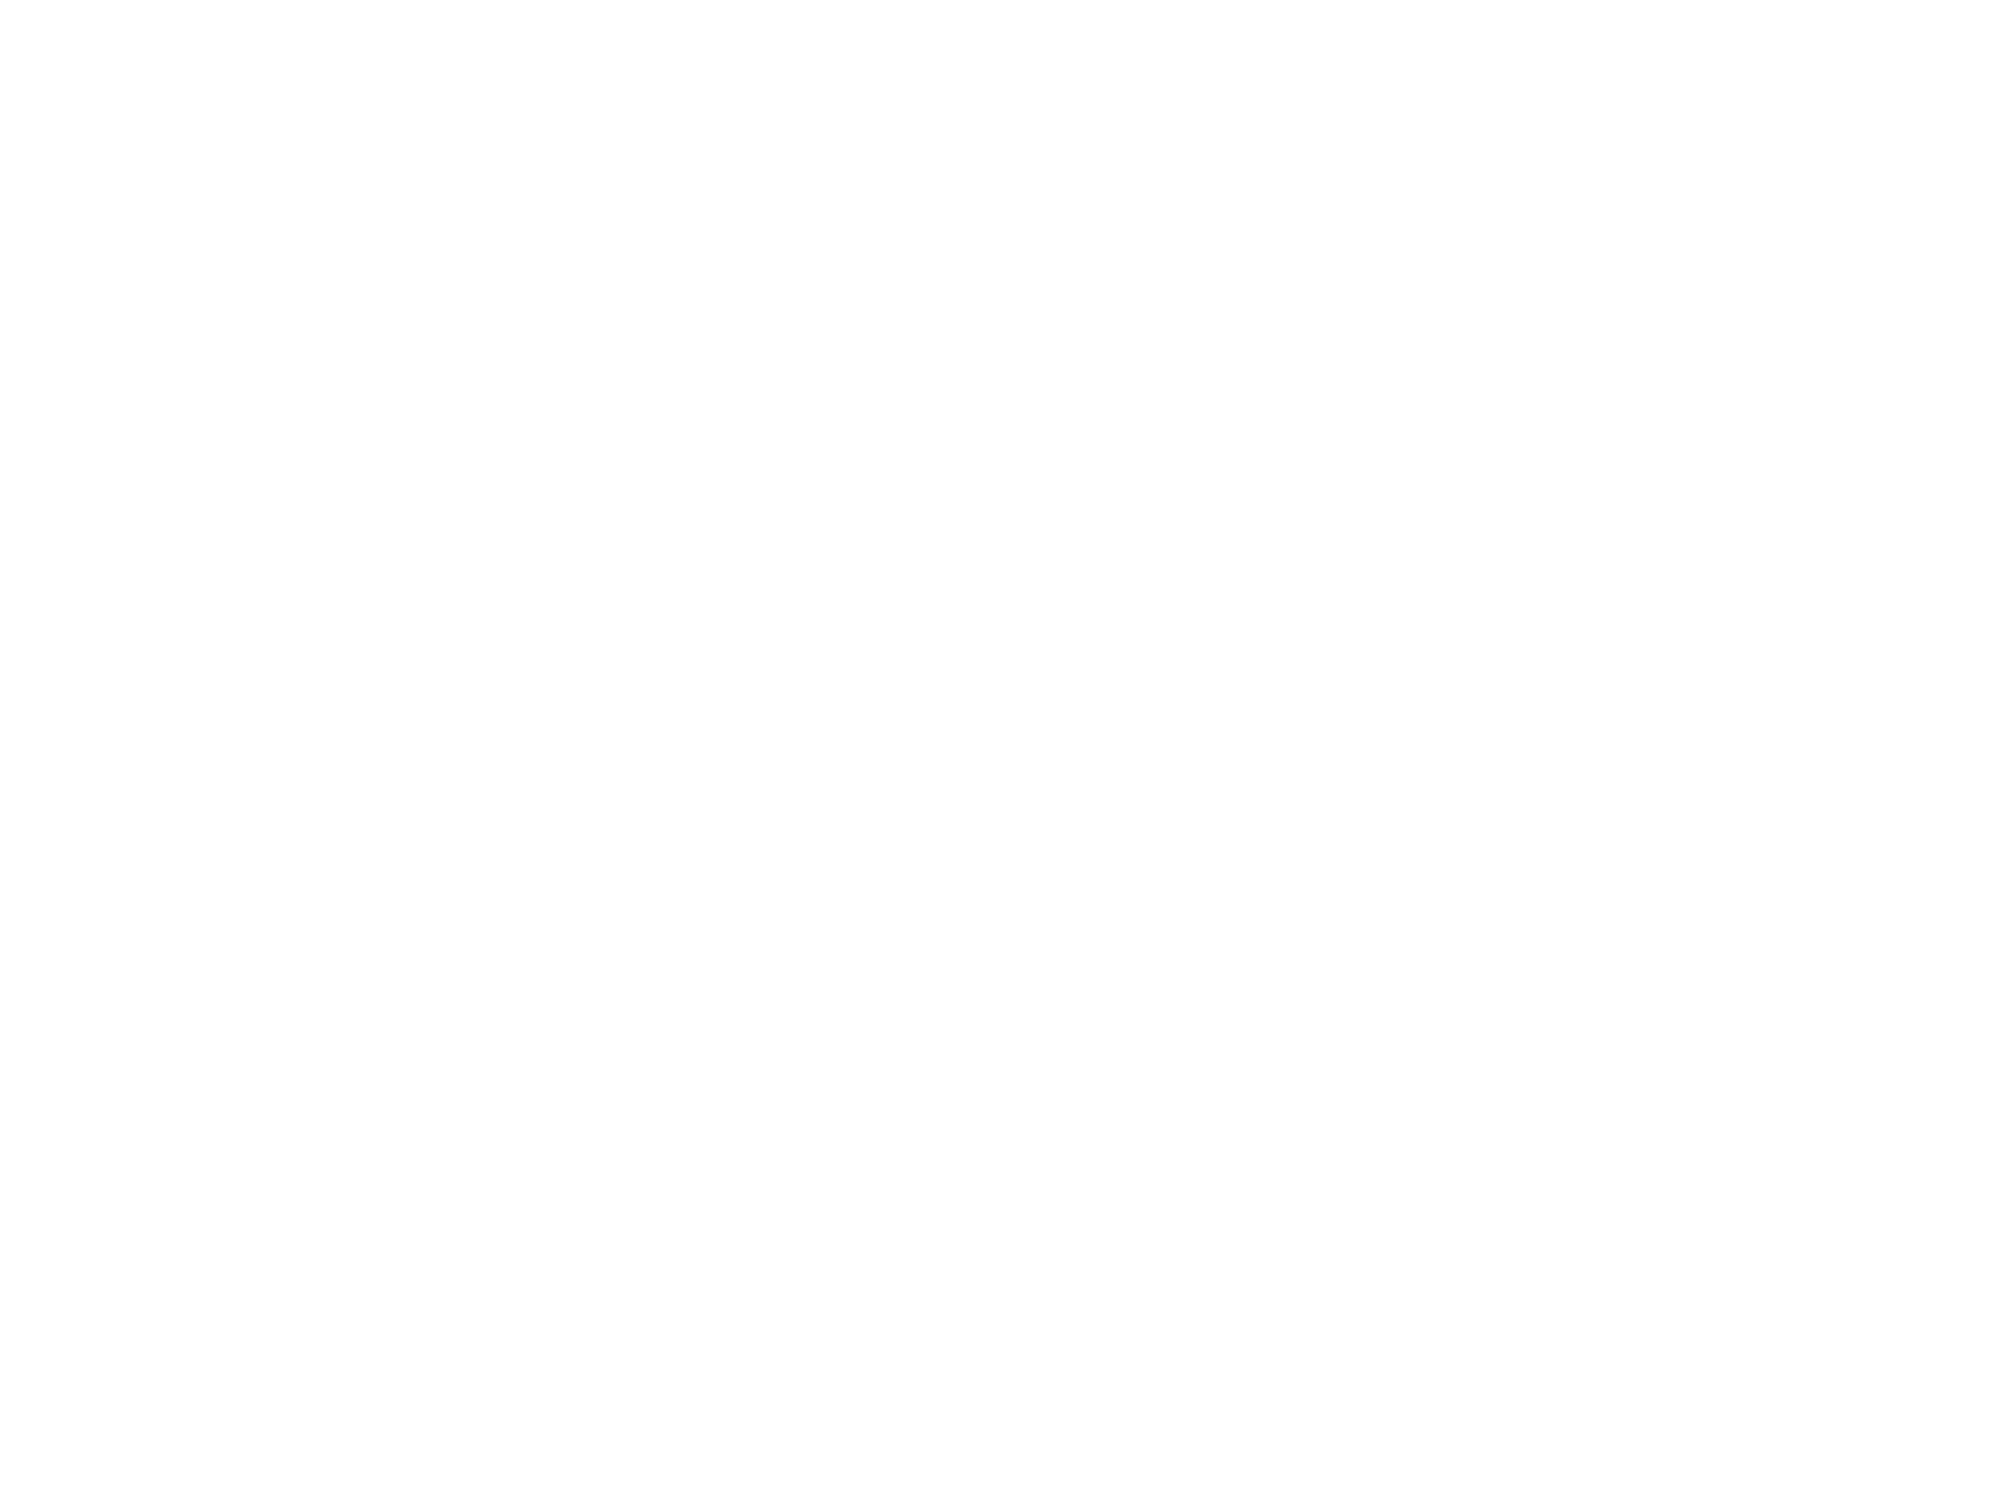

morph-tuning_V1__JC076_20190501_FOV1_zoom2p0x_traces001_stats-traces001-corrected-dff-nstds-thr-10.00_thr-dff-0.03_156-of-189rois
... [JC083|20190507|FOV1_zoom2p0x] creating blobs object
... getting data paths - name: blobs
... renaming experiment to run name: combined_blobs_static
Getting stimulus info for: combined_blobs_static
... loading ROI stats: nstds
... [combined_blobs_static] Loading roi stats and cell list...
... loading data array
... offset: 297.28
... updating self
filtering responsive cells: nstds
... getting responsive cells (test: nstds, thr: 10.00')
Plotting 119 of 132 responsive cells.
N rois to plot: 119
(11, 11)


<IPython.core.display.Javascript object>


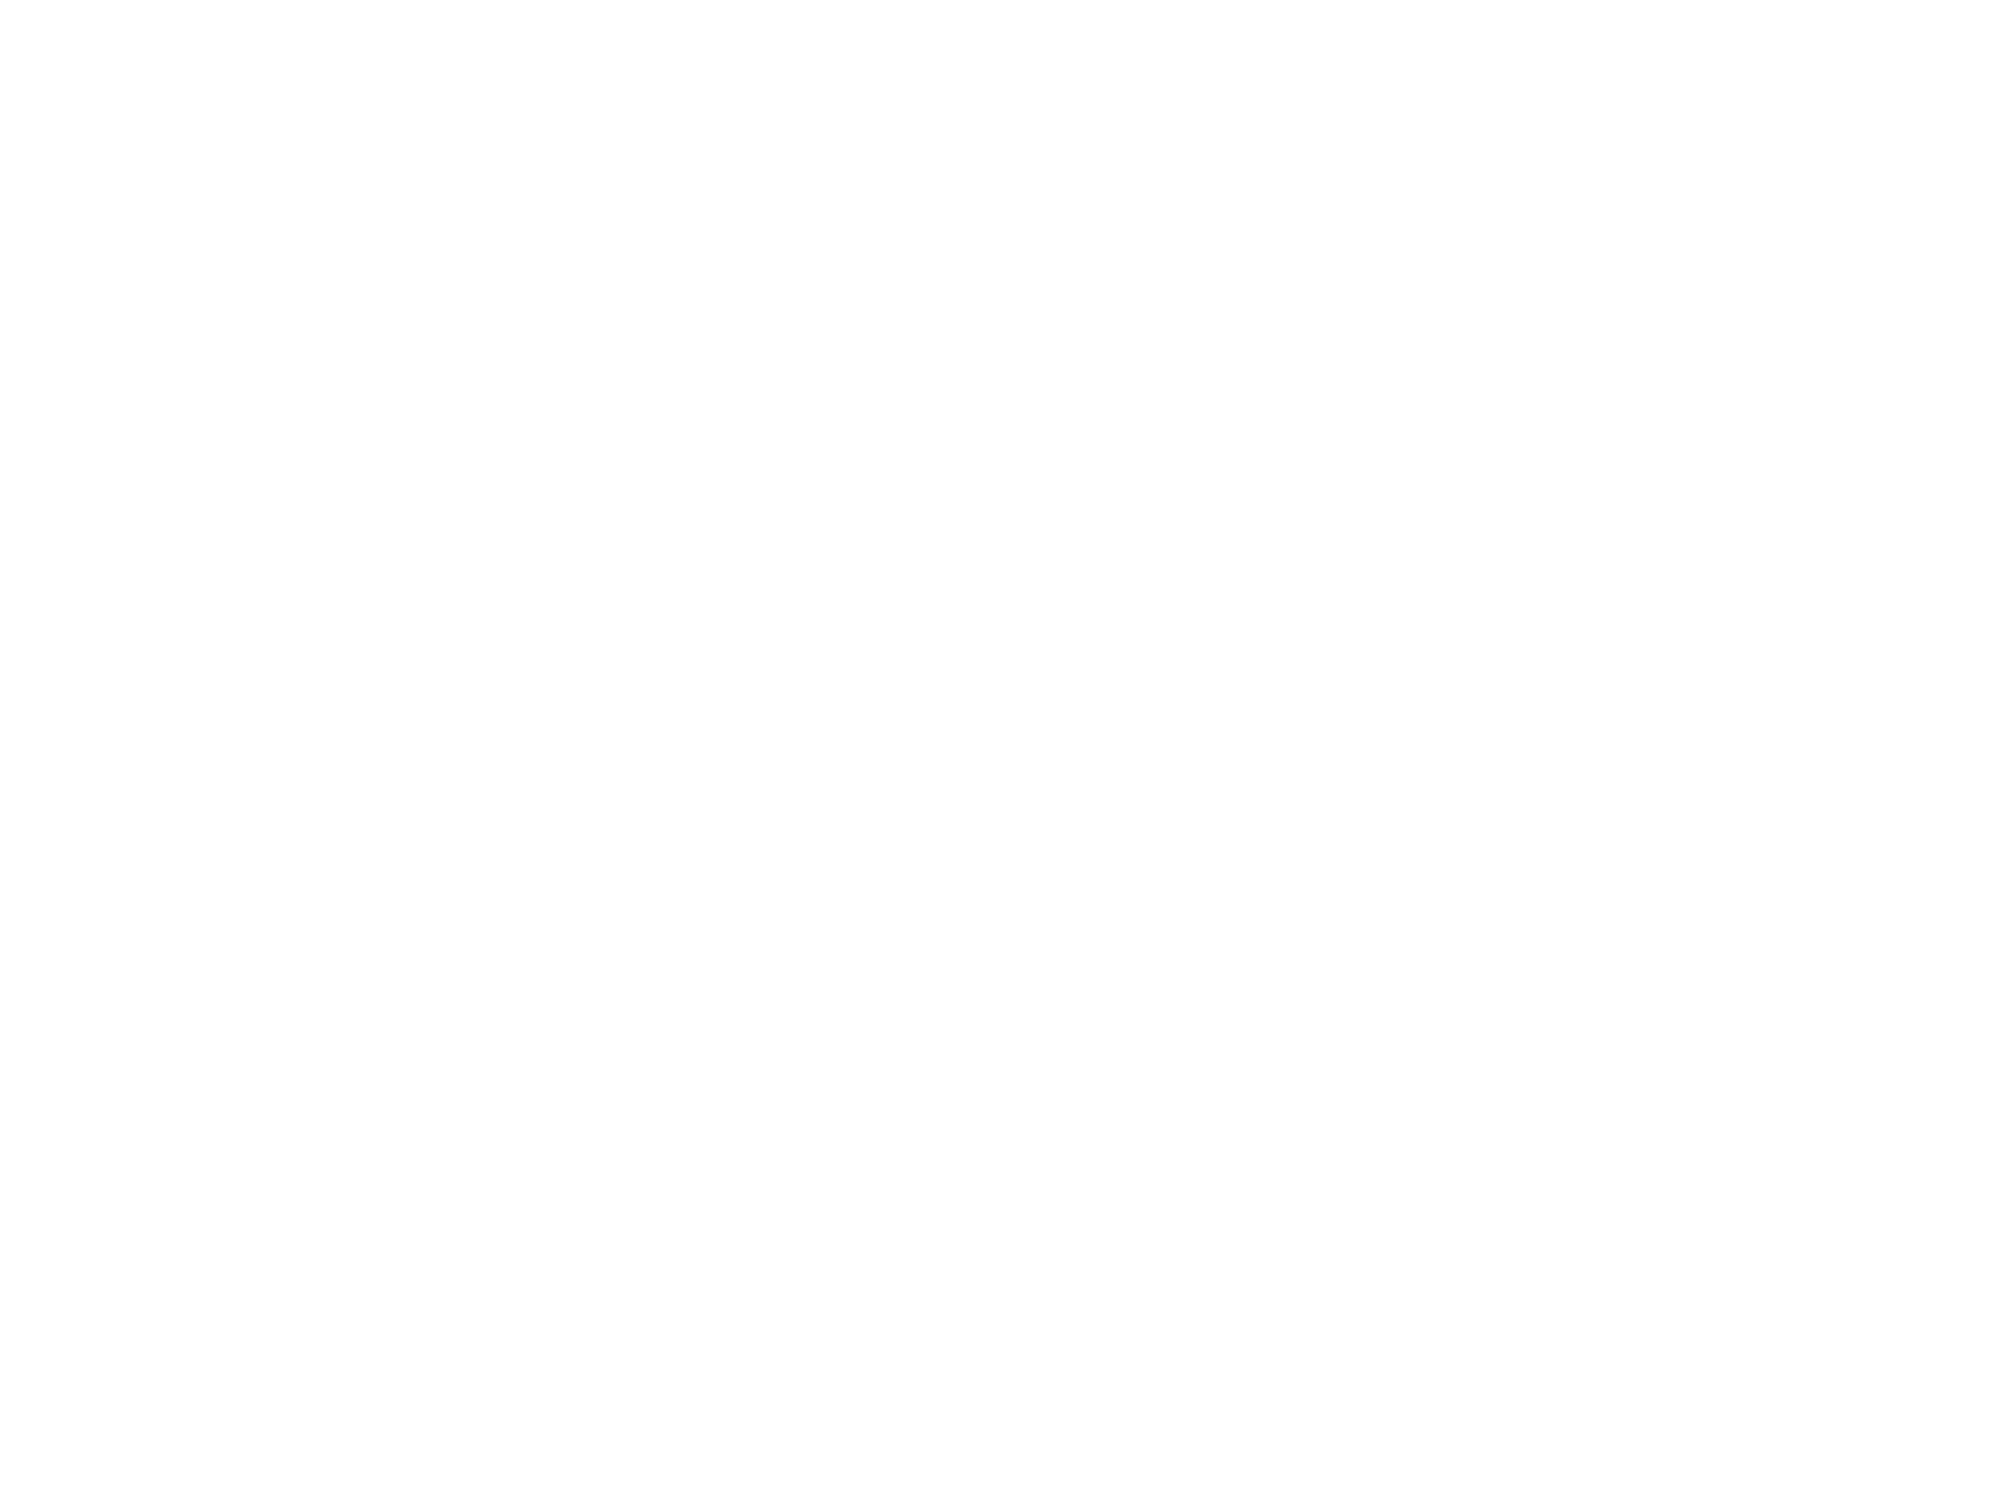

morph-tuning_V1__JC083_20190507_FOV1_zoom2p0x_traces001_stats-traces001-corrected-dff-nstds-thr-10.00_thr-dff-0.03_119-of-132rois
... [JC083|20190510|FOV1_zoom2p0x] creating blobs object
... getting data paths - name: blobs
... renaming experiment to run name: combined_blobs_static
Getting stimulus info for: combined_blobs_static
... loading ROI stats: nstds
... [combined_blobs_static] Loading roi stats and cell list...
... loading data array
... offset: 310.52
... updating self
filtering responsive cells: nstds
... getting responsive cells (test: nstds, thr: 10.00')
Plotting 100 of 121 responsive cells.
N rois to plot: 100
(10, 10)


<IPython.core.display.Javascript object>


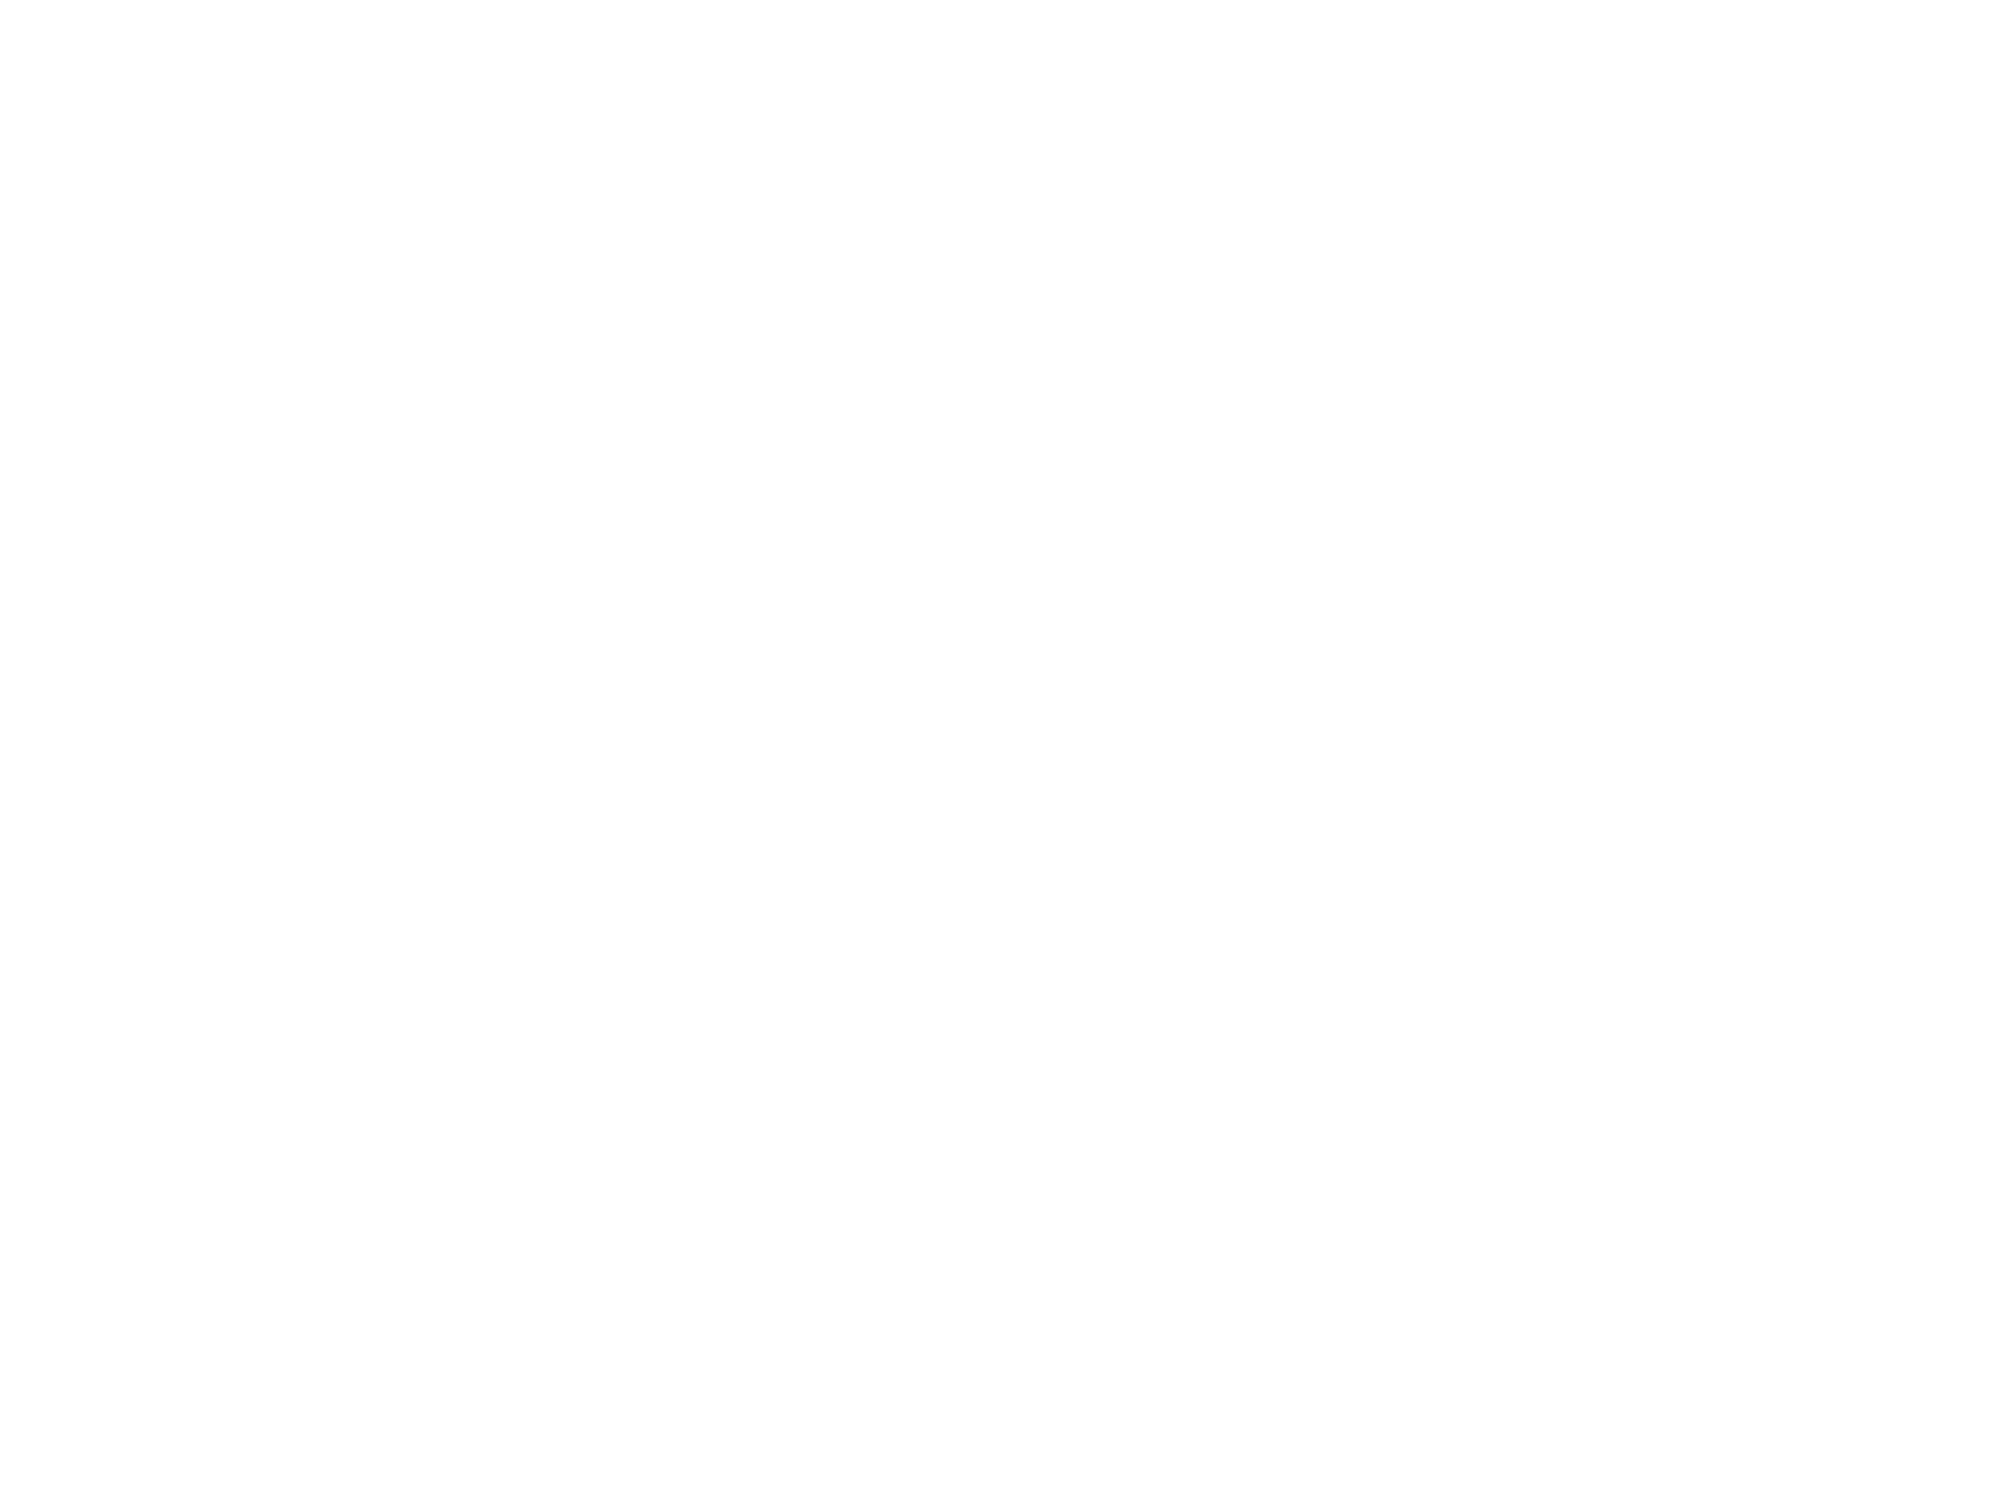

morph-tuning_V1__JC083_20190510_FOV1_zoom2p0x_traces001_stats-traces001-corrected-dff-nstds-thr-10.00_thr-dff-0.03_100-of-121rois
... [JC083|20190511|FOV1_zoom2p0x] creating blobs object
... getting data paths - name: blobs
... renaming experiment to run name: combined_blobs_static
Getting stimulus info for: combined_blobs_static
... loading ROI stats: nstds
... [combined_blobs_static] Loading roi stats and cell list...
... loading data array
... offset: 327.49
... updating self
filtering responsive cells: nstds
... getting responsive cells (test: nstds, thr: 10.00')
Plotting 120 of 126 responsive cells.
N rois to plot: 120
(11, 11)


<IPython.core.display.Javascript object>


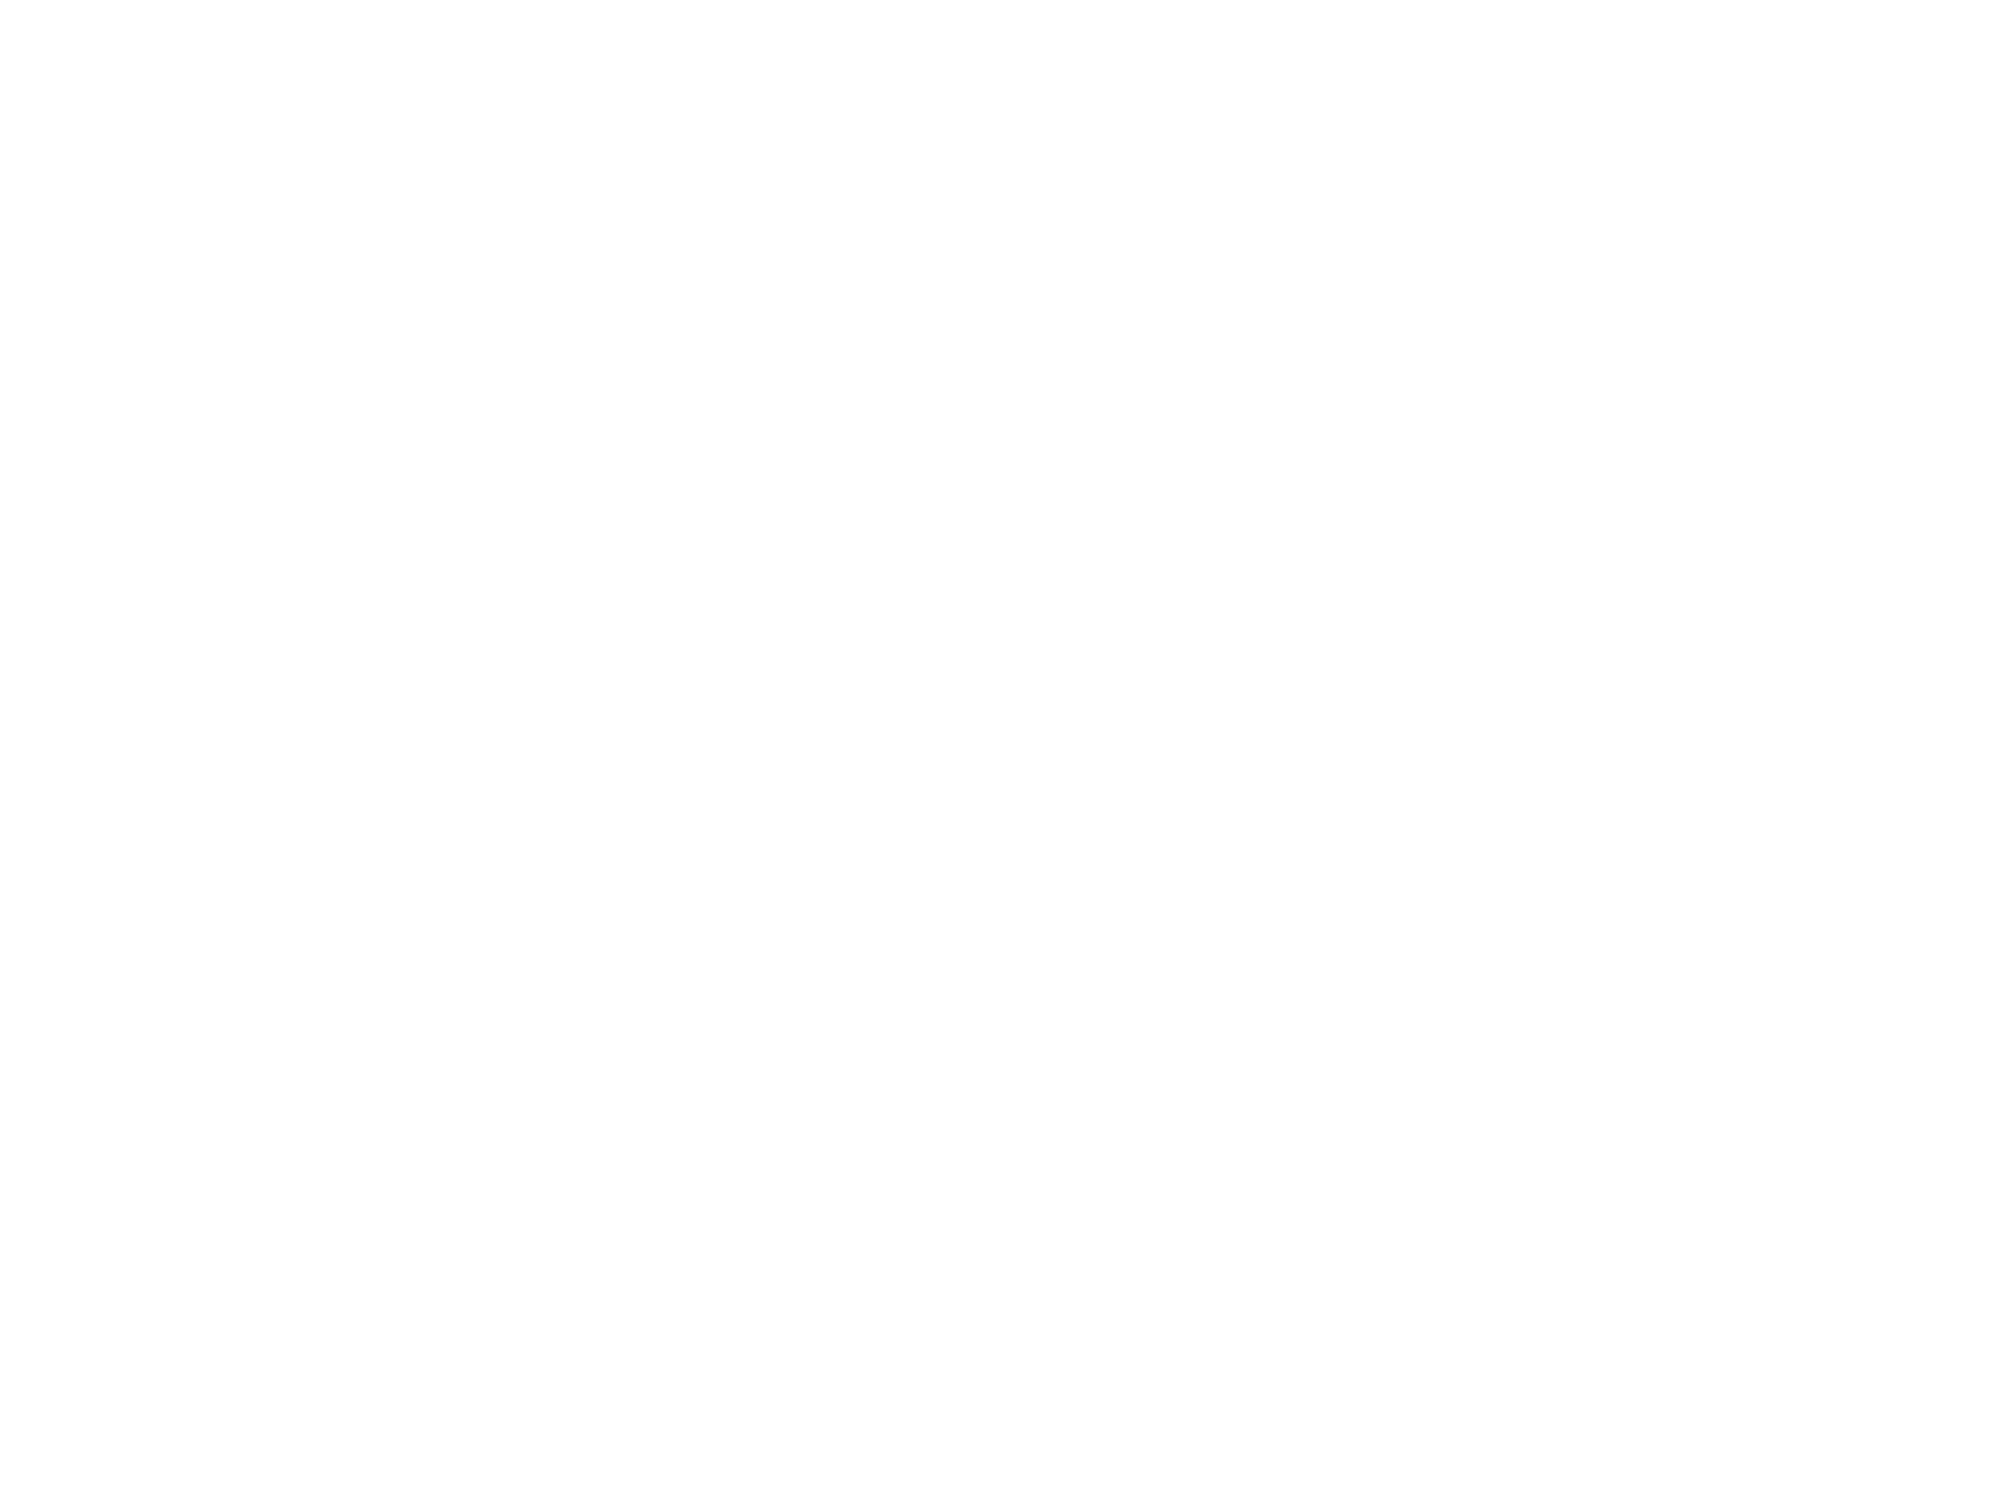

morph-tuning_V1__JC083_20190511_FOV1_zoom2p0x_traces001_stats-traces001-corrected-dff-nstds-thr-10.00_thr-dff-0.03_120-of-126rois
... [JC084|20190522|FOV1_zoom2p0x] creating blobs object
... getting data paths - name: blobs
... renaming experiment to run name: combined_blobs_static
Getting stimulus info for: combined_blobs_static
... loading ROI stats: nstds
... [combined_blobs_static] Loading roi stats and cell list...
... loading data array
... offset: 608.72
... updating self
filtering responsive cells: nstds
... getting responsive cells (test: nstds, thr: 10.00')
Plotting 128 of 180 responsive cells.
N rois to plot: 128
(11, 12)


<IPython.core.display.Javascript object>


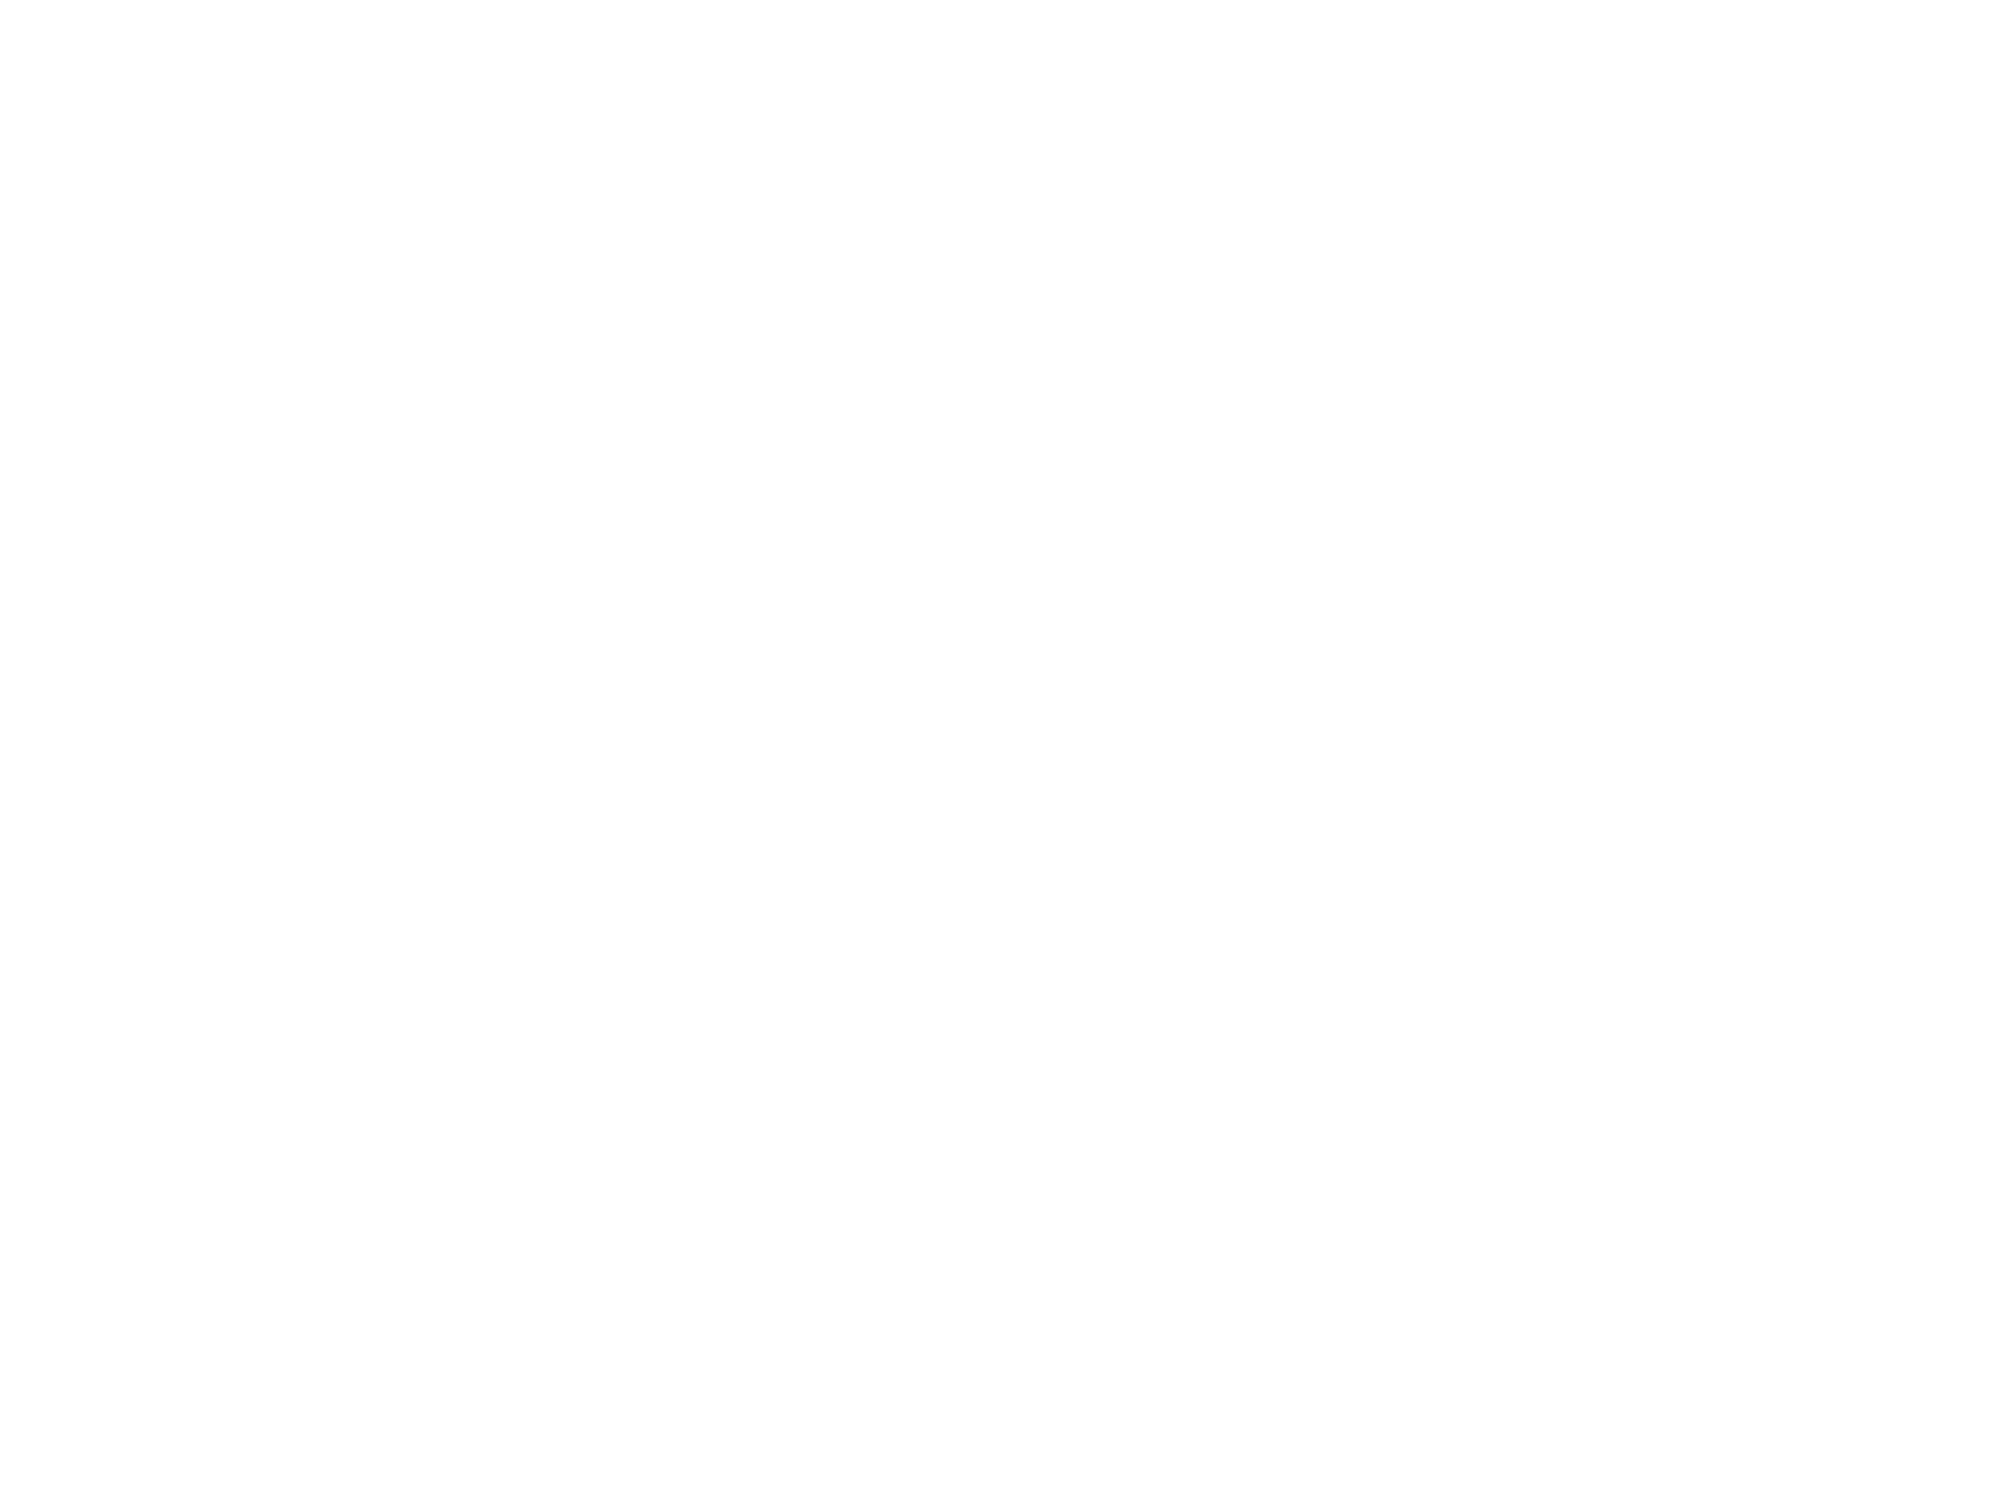

morph-tuning_V1__JC084_20190522_FOV1_zoom2p0x_traces001_stats-traces001-corrected-dff-nstds-thr-10.00_thr-dff-0.03_128-of-180rois
... [JC085|20190622|FOV1_zoom2p0x] creating blobs object
... getting data paths - name: blobs
... renaming experiment to run name: combined_blobs_static
Getting stimulus info for: combined_blobs_static
... loading ROI stats: nstds
... [combined_blobs_static] Loading roi stats and cell list...
... loading data array
... offset: 370.88
... updating self
filtering responsive cells: nstds
... getting responsive cells (test: nstds, thr: 10.00')
Plotting 185 of 202 responsive cells.
N rois to plot: 185
(14, 14)


<IPython.core.display.Javascript object>


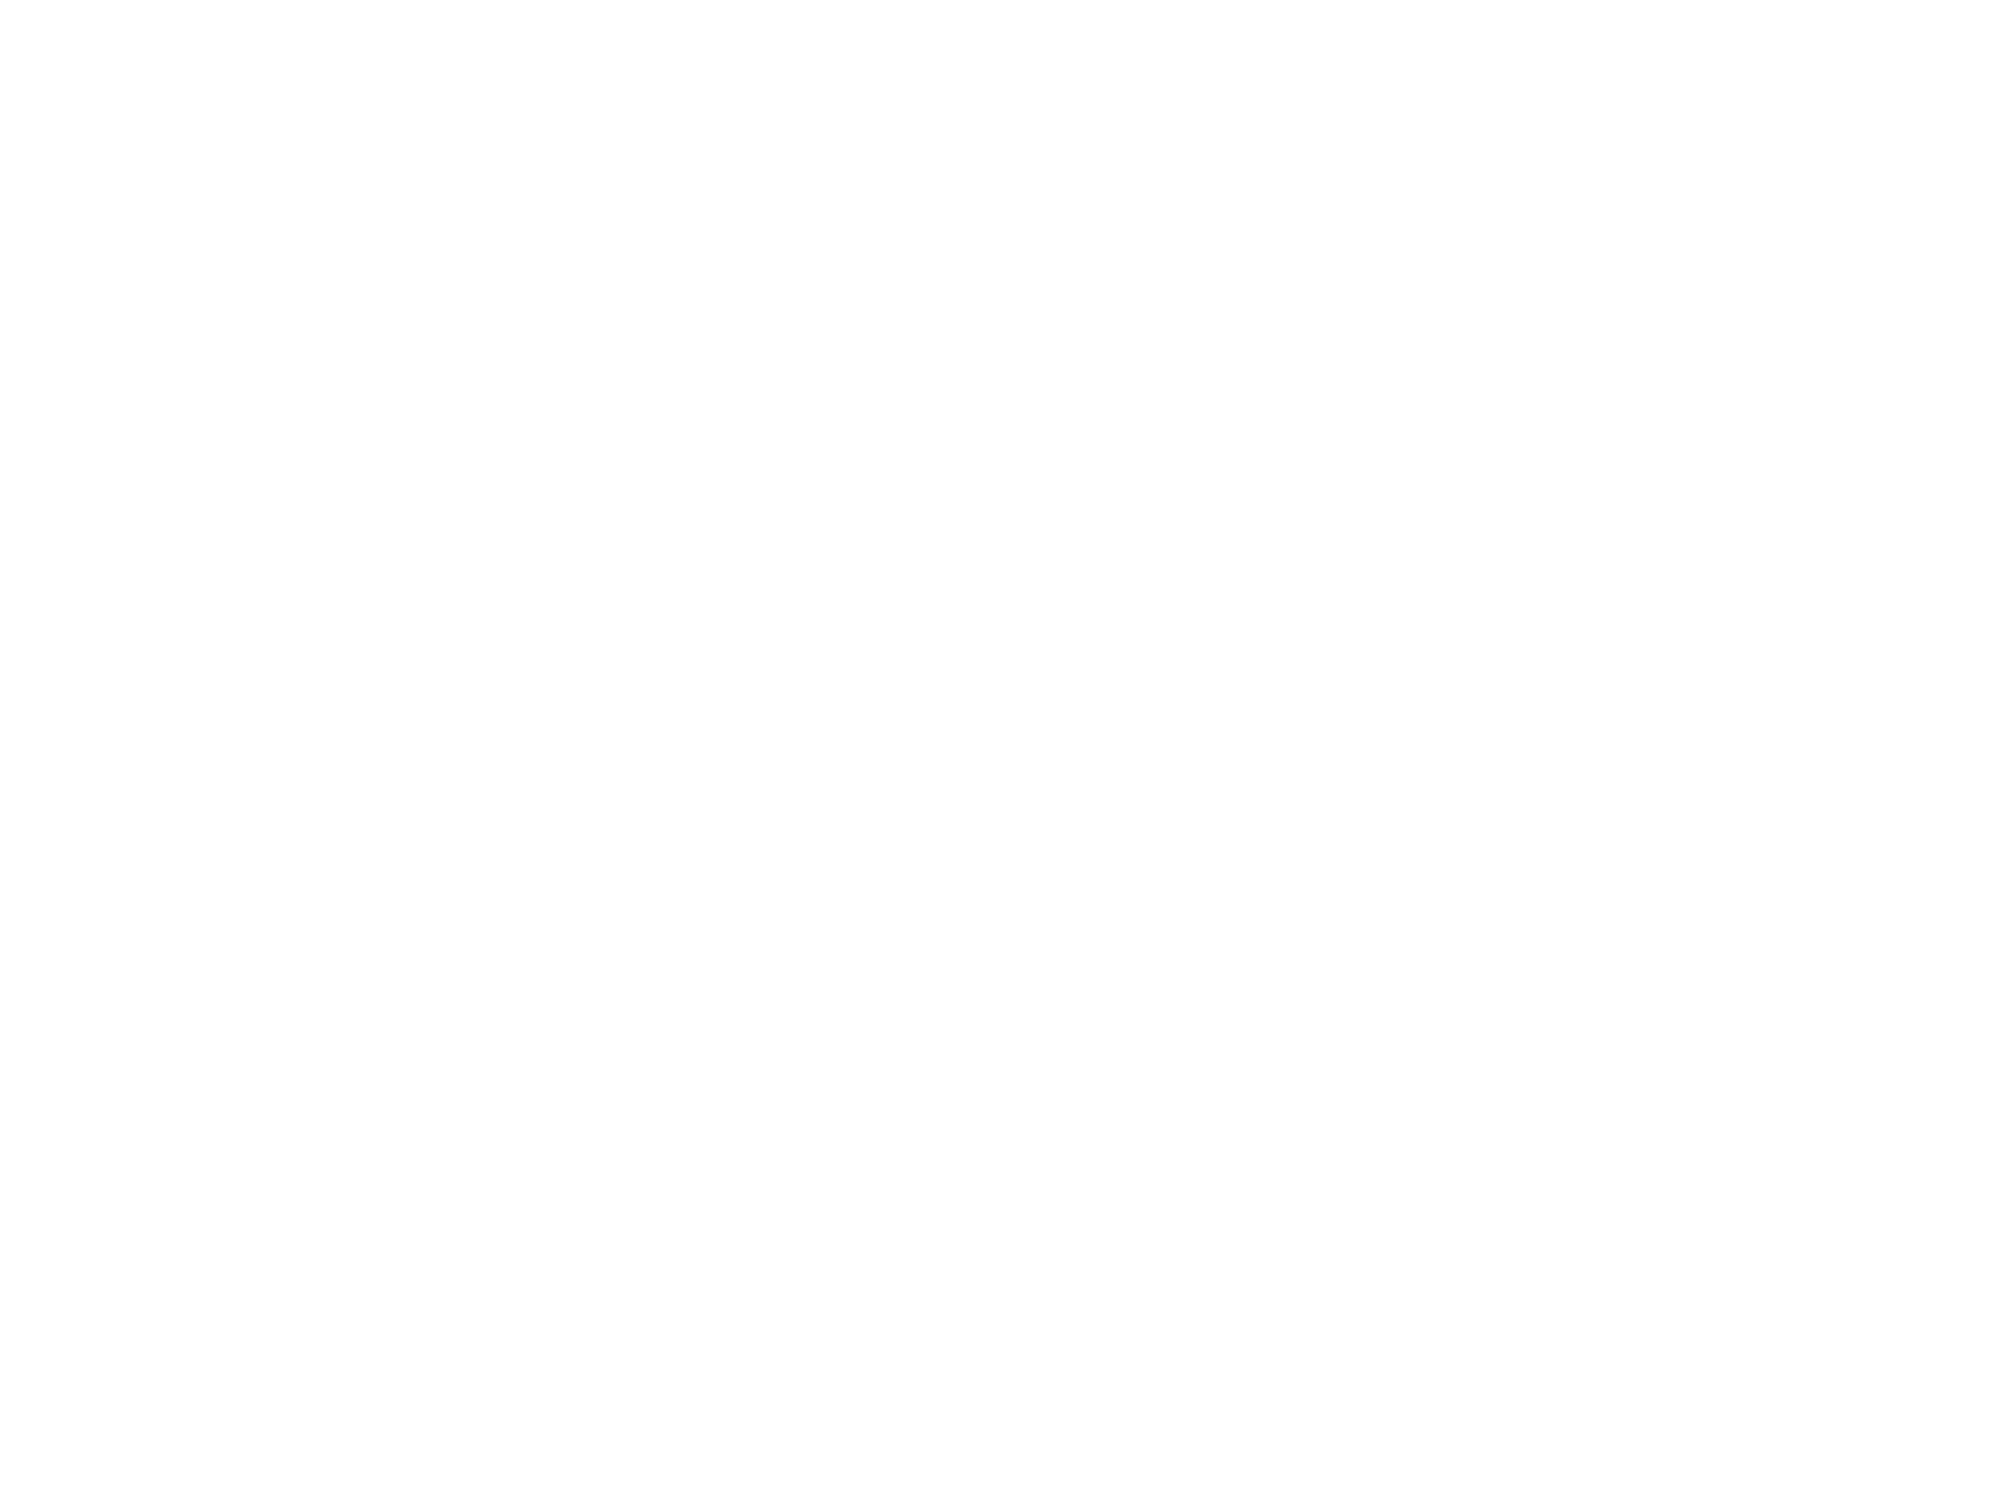

morph-tuning_V1__JC085_20190622_FOV1_zoom2p0x_traces001_stats-traces001-corrected-dff-nstds-thr-10.00_thr-dff-0.03_185-of-202rois
... [JC097|20190613|FOV1_zoom2p0x] creating blobs object
... getting data paths - name: blobs
... renaming experiment to run name: combined_blobs_static
Getting stimulus info for: combined_blobs_static
... loading ROI stats: nstds
... [combined_blobs_static] Loading roi stats and cell list...
... loading data array
... offset: 634.92
... updating self
filtering responsive cells: nstds
... getting responsive cells (test: nstds, thr: 10.00')
Plotting 125 of 166 responsive cells.
N rois to plot: 125
(11, 12)


<IPython.core.display.Javascript object>


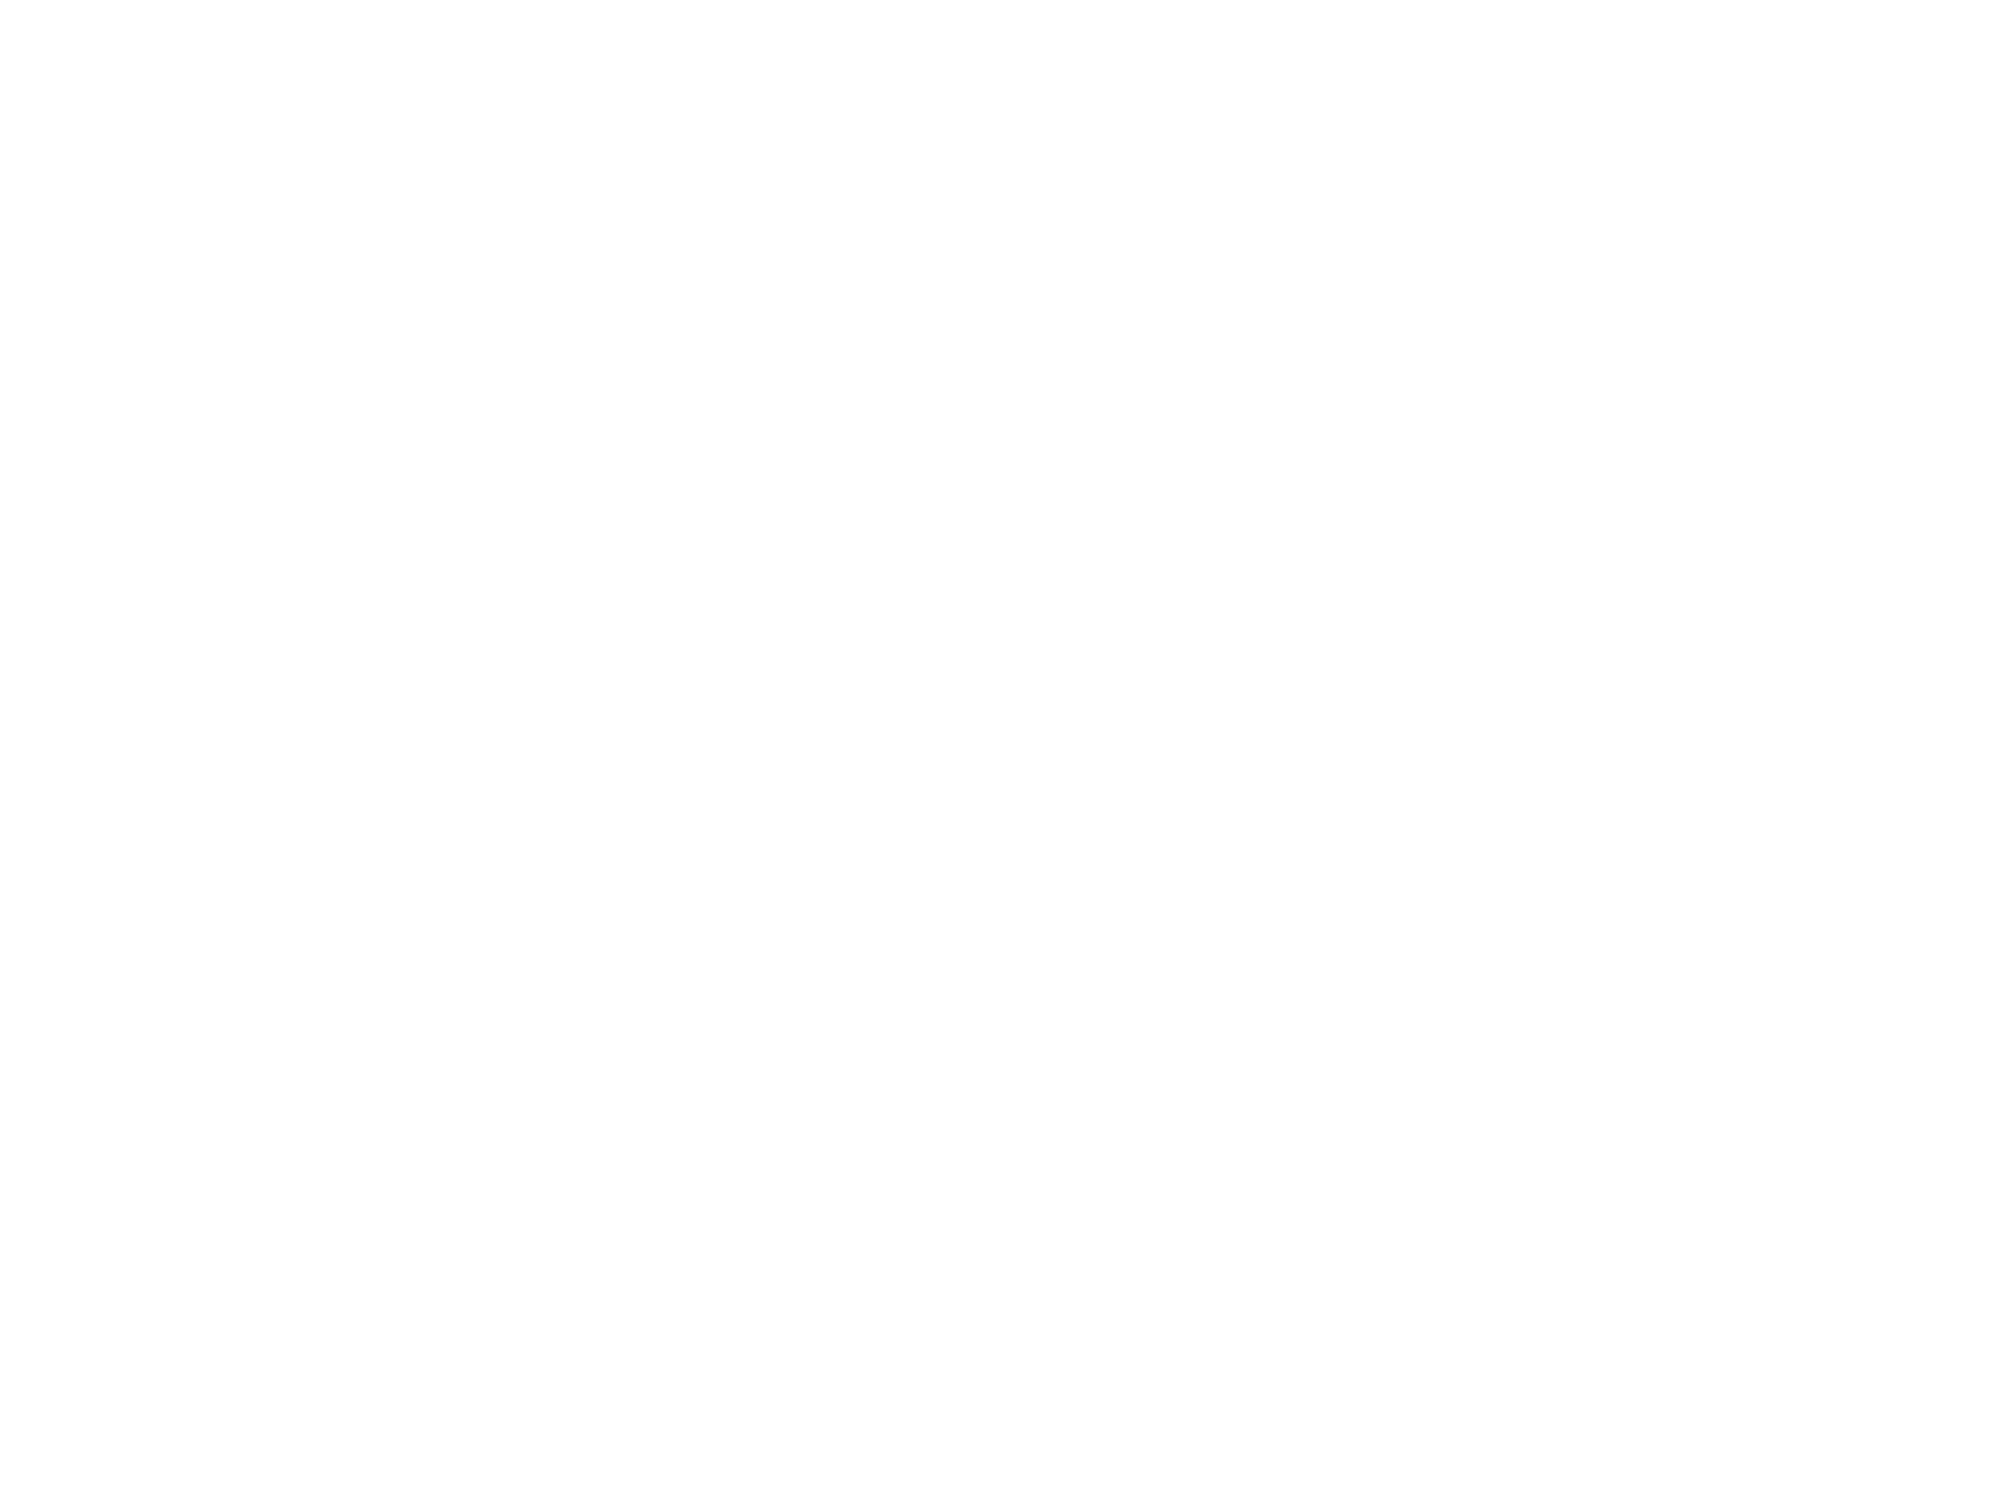

morph-tuning_V1__JC097_20190613_FOV1_zoom2p0x_traces001_stats-traces001-corrected-dff-nstds-thr-10.00_thr-dff-0.03_125-of-166rois
... [JC097|20190616|FOV1_zoom2p0x] creating blobs object
... getting data paths - name: blobs
... renaming experiment to run name: combined_blobs_static
Getting stimulus info for: combined_blobs_static
... loading ROI stats: nstds
... [combined_blobs_static] Loading roi stats and cell list...
... loading data array
... offset: 692.01
... updating self
filtering responsive cells: nstds
... getting responsive cells (test: nstds, thr: 10.00')
Plotting 237 of 298 responsive cells.
N rois to plot: 237
(15, 16)


<IPython.core.display.Javascript object>


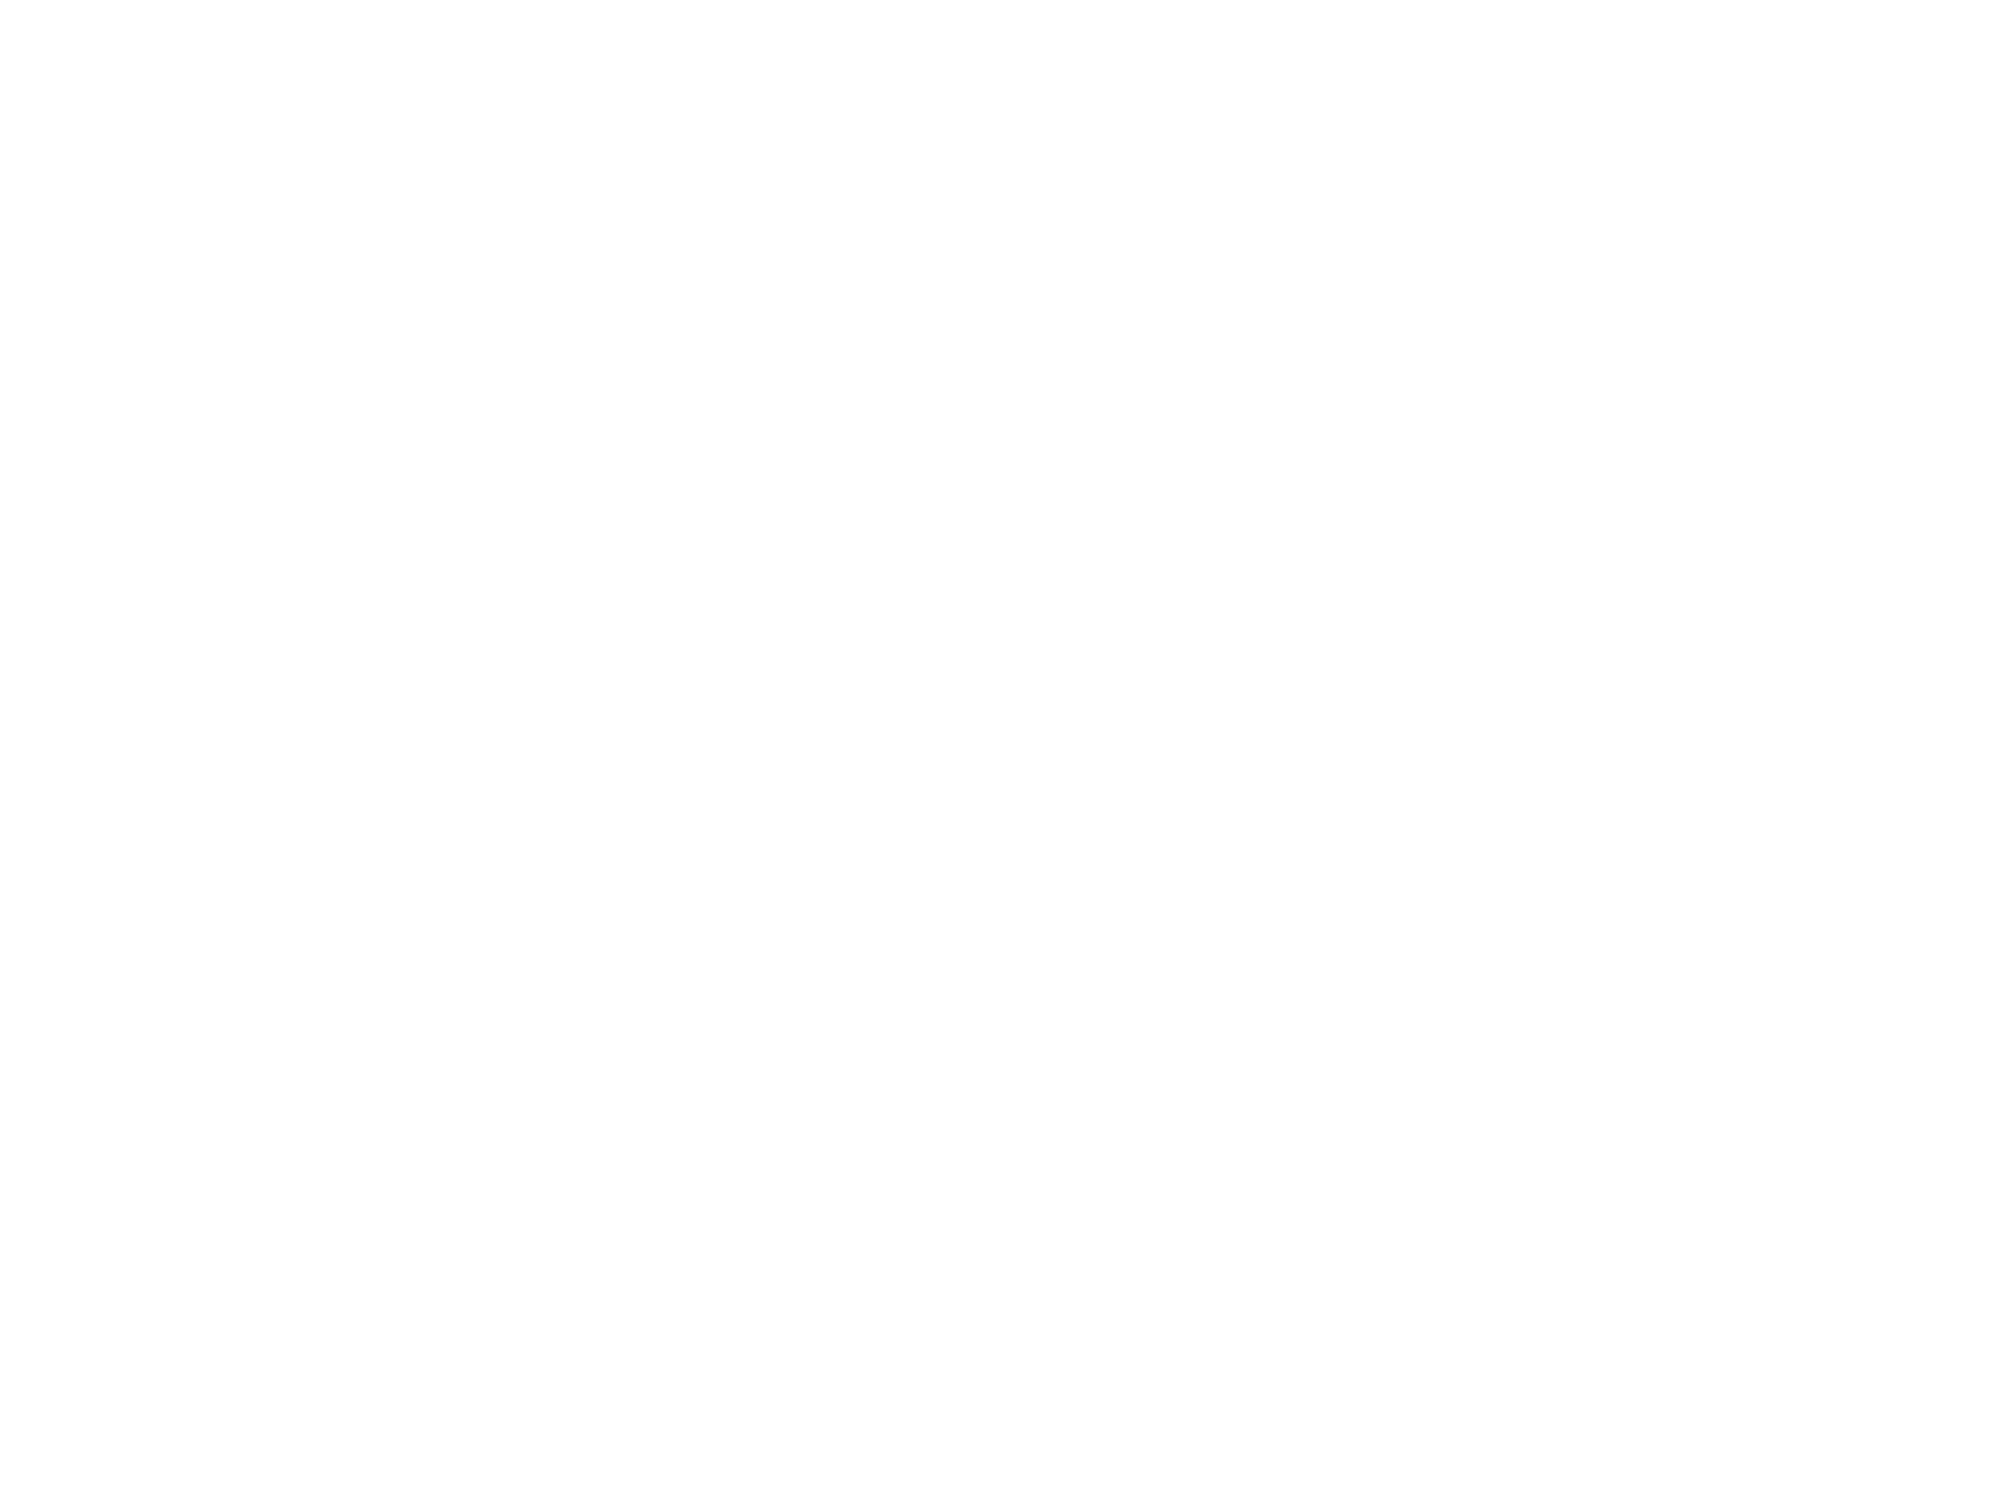

morph-tuning_V1__JC097_20190616_FOV1_zoom2p0x_traces001_stats-traces001-corrected-dff-nstds-thr-10.00_thr-dff-0.03_237-of-298rois
... [JC097|20190617|FOV1_zoom2p0x] creating blobs object
... getting data paths - name: blobs
... renaming experiment to run name: combined_blobs_static
Getting stimulus info for: combined_blobs_static
... loading ROI stats: nstds
... [combined_blobs_static] Loading roi stats and cell list...
... loading data array
... offset: 617.18
... adjusting for equal reps / condn...
... updating self
filtering responsive cells: nstds
... getting responsive cells (test: nstds, thr: 10.00')
Plotting 231 of 276 responsive cells.
N rois to plot: 231
(15, 16)


<IPython.core.display.Javascript object>


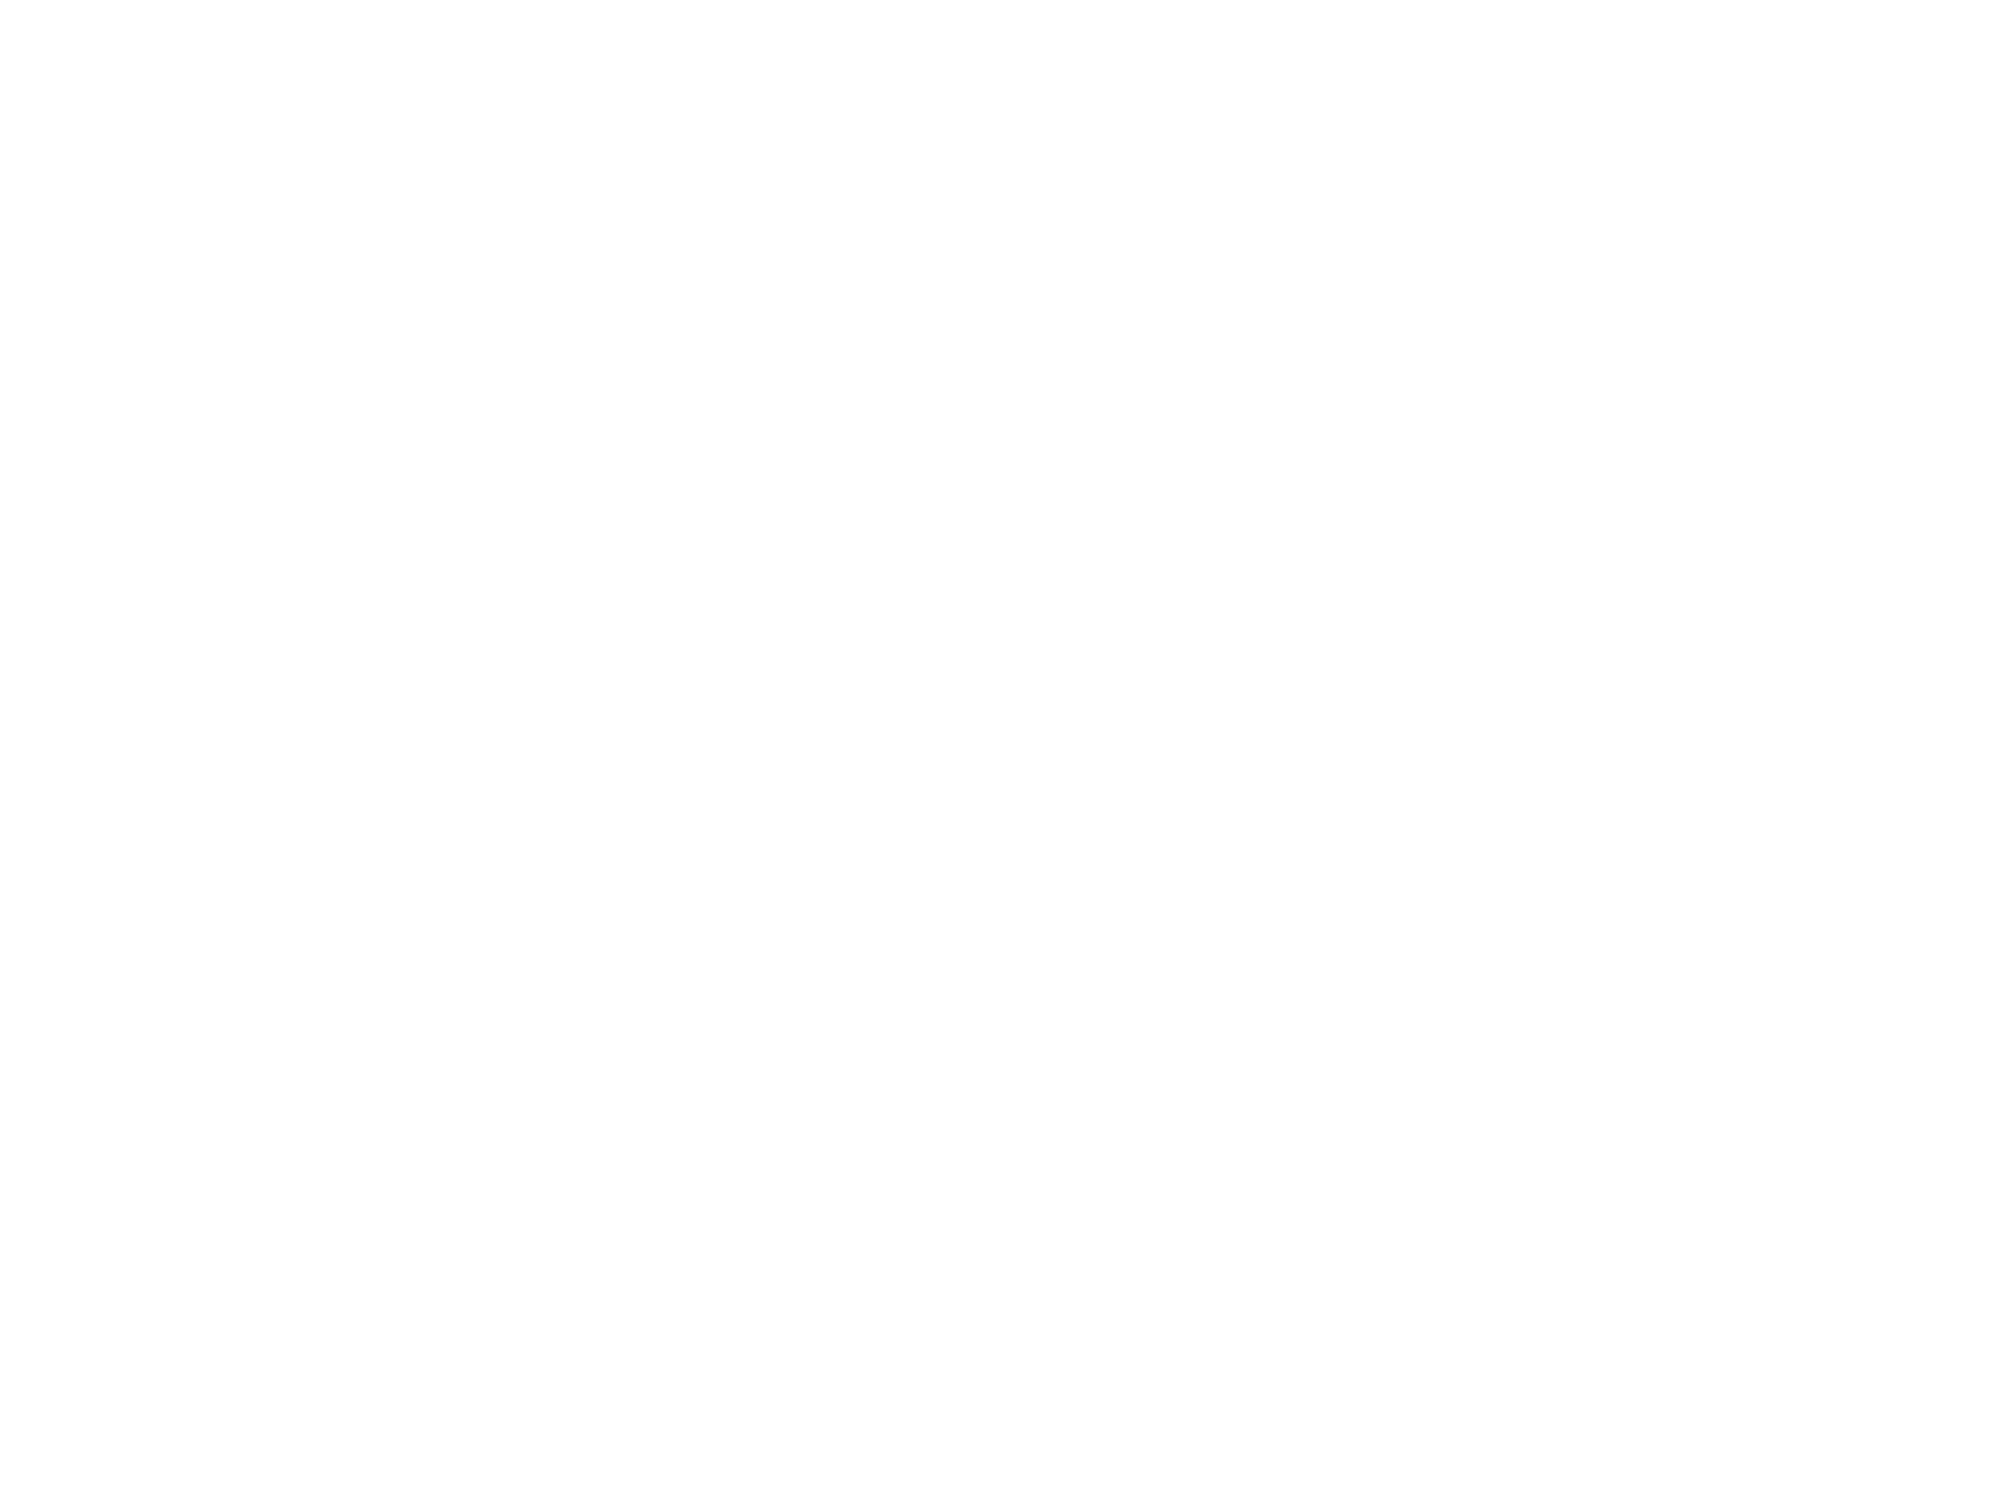

morph-tuning_V1__JC097_20190617_FOV1_zoom2p0x_traces001_stats-traces001-corrected-dff-nstds-thr-10.00_thr-dff-0.03_231-of-276rois


In [62]:
for (visual_area, animalid, session, fov), g in dsets.groupby(['visual_area', 'animalid', 'session', 'fov']):
    data_id = '|'.join([animalid, session, fov, traceid, stats_desc])

    skey = '-'.join([visual_area, animalid, session, fov])
    
    exp = util.Objects(animalid, session, fov, traceid=traceid, rootdir=rootdir)
    # Get stimulus conditions
    sdf = exp.get_stimuli()
    sdf = reformat_morph_values(sdf)
    sizes = np.array(sorted(sdf['size'].unique()))
    morphs = np.array(sorted(sdf['morphlevel'].unique()))

    n_sizes = len(sdf['size'].unique())
    n_morphs = len(sdf['morphlevel'].unique()) 
    if n_sizes != n_sz or n_morphs != n_mp:
        incorrect_nvalues.append(skey)
        continue
        
    figexists = len(glob.glob(os.path.join(outdir, 'sessions', 'morph-tuning_%s__%s*.png' % (visual_area, data_id.replace('|', '_')))))
    
    if figexists:
        continue
    

    rstats, rlist, _ = util.get_roi_stats(animalid, session, fov, exp_name=exp.name,
                                 response_type=response_type, responsive_test=responsive_test,
                                 responsive_thr=responsive_thr, n_stds=n_stds)
    rstats = rstats['nframes_above']
    

    # Get metrics for each condition
    estats = exp.get_stats(responsive_test=responsive_test, responsive_thr=responsive_thr, n_stds=n_stds)
    meanr = pd.concat([pd.Series(estats.gdf.get_group(roi).groupby(['config']).mean()['dff'], name=roi) \
                       for roi in estats.rois], axis=1).T
    assert len(np.where(np.isnan(meanr))[0])==0
    semr = pd.concat([pd.Series(estats.gdf.get_group(roi).groupby(['config']).sem()['dff'], name=roi) \
                       for roi in estats.rois], axis=1).T
    # Get ROI list
    if threshold_dff:
        rois_plot = meanr[(meanr.max(axis=1) > min_dff)].index.tolist()
    else:
        rois_plot = meanr.index.tolist()
    print("Plotting %i of %i responsive cells." % (len(rois_plot), len(meanr.index.tolist())))

    df_mean = meanr.loc[rois_plot]
    df_sem = semr.loc[rois_plot]

    hue_name = 'size' if tune_name=='morph' else 'morph'
    tune_values = morphs.copy() if tune_name=='morph' else sizes.copy()
    hue_values = sizes.copy() if tune_name=='morph' else morphs.copy()
    hcolors = sns.color_palette('gray_r', n_colors=n_sz) if tune_name=='morph' else sns.color_palette('gray_r', n_colors=n_mp) 


    fig = plot_roi_tuning(df_mean, df_sem=df_sem, tune_values=tune_values, tune_name=tune_name,
                         hue_values=hue_values, hue_name=hue_name, hue_colors=hcolors)
    if threshold_dff:
        figname = '%s-tuning_%s__%s_thr-dff-%.2f_%i-of-%irois' % (tune_name, visual_area, data_id.replace('|', '_'), min_dff, len(rois_plot), len(estats.rois))
    else:
        figname = '%s-tuning_%s__%s_all-resp_%i-of-%irois' % (tune_namevisual_area, data_id.replace('|', '_'), len(rois_plot), len(estats.rois))

    pl.savefig(os.path.join(outdir, 'sessions', '%s.png' % figname))
    print figname
    pl.close()
    
    del exp


# Look at counts across visual areas

In [154]:
incorrect_nconfigs = []
incorrect_nvalues = []
nresponsive = {}
ntotal = {}

In [155]:
for (visual_area, animalid, session, fov), g in dsets.groupby(['visual_area', 'animalid', 'session', 'fov']):
    exp = util.Objects(animalid, session, fov, traceid=traceid, rootdir=rootdir)
    skey = '%s-%s-%s' % (animalid, session, fov)

    sdf = exp.get_stimuli()
    if len(sdf.index.tolist()) != 50:
        incorrect_nconfigs.append(skey)
        continue

    control_ixs = sdf[sdf['morphlevel']==-1].index.tolist()
    sizevals = np.array([round(s, 1) for s in sdf['size'].unique() if s not in ['None', None] and not np.isnan(s)] )
    sdf.loc[sdf.morphlevel==-1, 'size'] = pd.Series(sizevals, index=control_ixs)
    sdf['size'] = [round(s, 1) for s in sdf['size'].values]
    n_sizes = len(sdf['size'].unique())
    n_morphs = len(sdf['morphlevel'].unique()) 
    if n_sizes != nr or n_morphs != nc:
        incorrect_nvalues.append(skey)
        continue

    if visual_area not in nresponsive.keys():
        nresponsive[visual_area] = {}
        ntotal[visual_area] = {}
    rstats, rlist, _ = util.get_roi_stats(animalid, session, fov, exp_name=exp.name,
                                 response_type=response_type, responsive_test=responsive_test,
                                 responsive_thr=responsive_thr, n_stds=n_stds)
    rstats = rstats['nframes_above']


    ncells_arr = np.empty((nr, nc), dtype=int)
    for ri, sz in enumerate(sizes):
        for mi, mp in enumerate(morphs):
            assert sz in sdf['size'].unique(), "wrong size: %i" % sz
            assert mp in sdf['morphlevel'].unique(), "wrong morph: %i" % mp
            ax = axes[ri, mi]
            cfg = sdf[( (sdf['size']==sz) & (sdf['morphlevel']==mp) )].index[0]
            ncells_resp = len(np.where(rstats.loc[cfg] >= responsive_thr)[0])
            ncells_arr[ri, mi] = ncells_resp

    nresponsive[visual_area].update({skey: ncells_arr})
    ntotal[visual_area].update({skey: len(rlist)})
    
    
        

... [JC076|20190422|FOV1_zoom2p0x] creating blobs object
... getting data paths - name: blobs
... renaming experiment to run name: combined_blobs_static
Getting stimulus info for: combined_blobs_static
... loading ROI stats: nstds
... [JC076|20190502|FOV1_zoom2p0x] creating blobs object
... getting data paths - name: blobs
... renaming experiment to run name: combined_blobs_static
Getting stimulus info for: combined_blobs_static
... loading ROI stats: nstds
... [JC090|20190605|FOV1_zoom2p0x] creating blobs object
... getting data paths - name: blobs
... renaming experiment to run name: combined_blobs_static
Getting stimulus info for: combined_blobs_static
... loading ROI stats: nstds
... [JC091|20190602|FOV1_zoom2p0x] creating blobs object
... getting data paths - name: blobs
... renaming experiment to run name: combined_blobs_static
Getting stimulus info for: combined_blobs_static
... loading ROI stats: nstds
... [JC091|20190606|FOV1_zoom2p0x] creating blobs object
... getting data pa

In [157]:
print incorrect_nvalues
print incorrect_nconfigs

[]
['JC078-20190426-FOV1_zoom2p0x']


In [192]:
data_identifier = '|'.join(['blobs', fov_type, traceid, stats_desc])
print(data_identifier)

blobs|zoom2p0x|traces001|stats-traces001-corrected-dff-nstds-thr-10.00


<IPython.core.display.Javascript object>


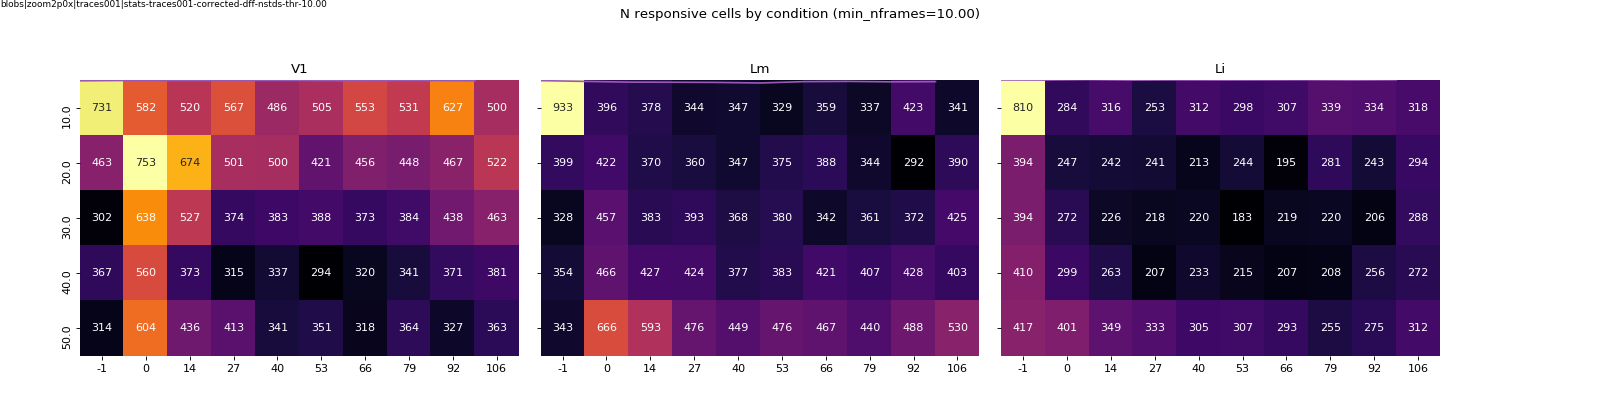

In [210]:
nr=5
nc=10
cmap = 'inferno'
normalize = False

fig, axes = pl.subplots(1,3, sharex=True, sharey=True, figsize=(20, 5))
fig.patch.set_alpha(1)
#vmin = 0
#vmax = 1
for ax, visual_area in zip(axes, ['V1', 'Lm', 'Li']):
    agg_arr = np.empty((nr, nc))
    sessionkeys = sorted(ntotal[visual_area].keys(), key=natural_keys)
    ncells_total = [ntotal[visual_area][k] for k in sessionkeys]
    resp_array = [nresponsive[visual_area][k] for k in sessionkeys]
    for ncells, r_arr in zip(ncells_total, resp_array):
        if normalize:
            agg_arr += (r_arr / float(ncells))
        else:
            agg_arr += r_arr
    
    if normalize:
        agg_arr = agg_arr / float(len(sessionkeys))
        sns.heatmap(agg_arr, ax=ax,cmap=cmap, #square=True, 
                    fmt='.2g', annot=True, cbar=0,
                    vmin=vmin, vmax=vmax)
    else:
        agg_arr = agg_arr.astype(int)
        sns.heatmap(agg_arr, ax=ax,cmap=cmap, #square=True, 
                    fmt='d', annot=True, cbar=0)
        
    ax.set_yticklabels(sizes)
    ax.set_xticklabels(morphs)    
    ax.set_title(visual_area)

if normalize:
    title = 'perc. of responsive cells by condition (min_nframes=%.2f)' % responsive_thr
    figname = 'ncells_responsive_by_condition-%s-thr-%.2f_normalized' % (responsive_test, responsive_thr)

else:
    title = 'N responsive cells by condition (min_nframes=%.2f)' % responsive_thr
    figname = 'ncells_responsive_by_condition-%s-thr-%.2f' % (responsive_test, responsive_thr)

fig.suptitle(title)

pl.subplots_adjust(wspace=0.05, left=0.05, top=0.8)
label_figure(fig, data_identifier)


pl.savefig(os.path.join(outdir, '%s.png' % figname ))


In [190]:
outdir

'/n/coxfs01/julianarhee/aggregate-visual-areas/blob-tuning/stats-traces001-corrected-dff-nstds-thr-10.00'

#### Look at num responsive for 1 session

In [ ]:
animalid = 'JC084'
session = '20190522'
fov = 'FOV1_zoom2p0x'


In [101]:
exp = util.Objects(animalid, session, fov, traceid=traceid, rootdir=rootdir)

rstats, _, _ = util.get_roi_stats(animalid, session, fov, exp_name=exp.name,
                                 response_type=response_type, responsive_test=responsive_test,
                                 responsive_thr=responsive_thr, n_stds=n_stds)
rstats = rstats['nframes_above']

... loading ROI stats: nstds


In [226]:
sdf = exp.get_stimuli()
sdf = reformat_morph_values(sdf)
sizes = sorted(sdf['size'].unique())
morphs = sorted(sdf['morphlevel'].unique())

Getting stimulus info for: combined_blobs_static


In [228]:

nr = len(sizes)
nc = len(morphs)

ncells_arr = np.empty((nr, nc), dtype=int)
#fig, axes = pl.subplots(nr, nc, sharex=True, sharey=True)
#cbar_ax = fig.add_axes([.91, .3, .03, .4])
#i  = 0
for ri, sz in enumerate(sizes):
    for mi, mp in enumerate(morphs):
        cfg = sdf[( (sdf['size']==sz) & (sdf['morphlevel']==mp) )].index[0]
        ncells_resp = len(np.where(rstats.loc[cfg] >= responsive_thr)[0])
        ncells_arr[ri, mi] = ncells_resp
        

<IPython.core.display.Javascript object>


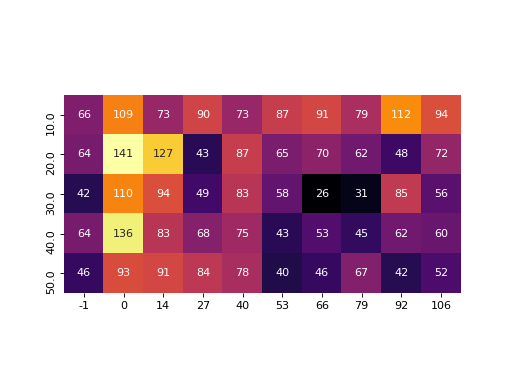

[Text(0.5,0,u'-1'),
 Text(1.5,0,u'0'),
 Text(2.5,0,u'14'),
 Text(3.5,0,u'27'),
 Text(4.5,0,u'40'),
 Text(5.5,0,u'53'),
 Text(6.5,0,u'66'),
 Text(7.5,0,u'79'),
 Text(8.5,0,u'92'),
 Text(9.5,0,u'106')]

In [229]:
fig, ax  = pl.subplots()
sns.heatmap(ncells_arr, ax=ax,cmap=cmap, square=True, fmt='d', annot=True, cbar=0)
ax.set_yticklabels(sizes)
ax.set_xticklabels(morphs)